In [91]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import warnings
warnings.filterwarnings("ignore")

In [93]:
scientistData = pd.read_csv('Top_scientists_2023.csv')
scientistData.head()
scientistData.shape

(217097, 47)

### Data Cleaning

In [96]:
#Cutting to (around) top 100k
sci100k_Data = scientistData[:-117097]
sci100k_Data.head(20)

authfull                                       inst_name  \
0       Graetzel, Michael        École Polytechnique Fédérale de Lausanne   
1         Wang, Zhong Lin                     Chinese Academy of Sciences   
2      Willett, Walter C.       Harvard T.H. Chan School of Public Health   
3           Kresse, Georg                                Universität Wien   
4      Kessler, Ronald C.                          Harvard Medical School   
5           Friston, Karl                       University College London   
6      Altman, Douglas G.  University of Oxford Medical Sciences Division   
7        McEwen, Bruce S.                          Rockefeller University   
8   Whitesides, George M.            Harvard Faculty of Arts and Sciences   
9          Witten, Edward                    Institute for Advanced Study   
10       Barnes, Peter J.               National Heart and Lung Institute   
11        Perdew, John P.                               Tulane University   
12       Halliwell, Barry                National University of Singapore   
13           Ridker, Paul                          Harvard Medical School   
14         Karin, Michael                 UC San Diego School of Medicine   
15        Bandura, Albert                             Stanford University   
16      Semenza, Gregg L.     Johns Hopkins University School of Medicine   
17           Yusuf, Salim                             McMaster University   
18           Libby, Peter                    Brigham and Women's Hospital   
19         Langer, Robert           Massachusetts Institute of Technology   

   cntry  np6023  firstyr  lastyr  rank (ns)  nc9623 (ns)  h23 (ns)  \
0    che    1760     1971    2024          1       365234       270   
1    chn    2644     1986    2025          2       279327       250   
2    usa    2416     1970    2024          3       346654       306   
3    aut     388     1992    2024          4       297085       109   
4    usa    1098     1975    2024          5       267255       237   
5    gbr    1270     1989    2024          6       188600       200   
6    gbr    1043     1972    2024          7       566794       254   
7    usa    1205     1959    2023          8       153846       190   
8    usa    1389     1962    2023          9       244615       223   
9    usa     319     1970    2024         10       101514       137   
10   gbr    1872     1974    2024         11       146952       186   
11   usa     351     1970    2024         12       300498        92   
12   sgp     724     1965    2024         13       113708       156   
13   usa    1189     1985    2024         14       214130       214   
14   usa     710     1979    2024         15       208736       226   
15   usa     193     1953    2024         16       111248        99   
16   usa     492     1984    2024         17       120758       167   
17   can    1584     1979    2024         18       254242       230   
18   usa     970     1972    2024         19       161034       197   
19   usa    1849     1974    2024         20       243723       240   

     hm23 (ns)  ...  nc9623_rw                       sm-subfield-1  \
0   117.269725  ...        125        Nanoscience & Nanotechnology   
1   129.899914  ...        162        Nanoscience & Nanotechnology   
2   122.561857  ...        174                        Epidemiology   
3    49.890597  ...         34                     Applied Physics   
4    86.248917  ...         69                          Psychiatry   
5   106.582984  ...         45            Neurology & Neurosurgery   
6   106.984801  ...        318         General & Internal Medicine   
7   111.878948  ...         45            Neurology & Neurosurgery   
8   113.458896  ...         68                   General Chemistry   
9   108.916667  ...         20          Nuclear & Particle Physics   
10  116.225982  ...        201                  Respiratory System   
11   48.185786  ...         72                     Applied Physics 

In [98]:
sci100k_Data.columns

Index(['authfull', 'inst_name', 'cntry', 'np6023', 'firstyr', 'lastyr',
       'rank (ns)', 'nc9623 (ns)', 'h23 (ns)', 'hm23 (ns)', 'nps (ns)',
       'ncs (ns)', 'cpsf (ns)', 'ncsf (ns)', 'npsfl (ns)', 'ncsfl (ns)',
       'c (ns)', 'npciting (ns)', 'cprat (ns)', 'np6023 cited9623 (ns)',
       'self%', 'rank', 'nc9623', 'h23', 'hm23', 'nps', 'ncs', 'cpsf', 'ncsf',
       'npsfl', 'ncsfl', 'c', 'npciting', 'cprat', 'np6023 cited9623',
       'np6023_rw', 'nc9623_to_rw', 'nc9623_rw', 'sm-subfield-1',
       'sm-subfield-1-frac', 'sm-subfield-2', 'sm-subfield-2-frac', 'sm-field',
       'sm-field-frac', 'rank sm-subfield-1', 'rank sm-subfield-1 (ns)',
       'sm-subfield-1 count'],
      dtype='object')

##### We will be working with data regarding "all citations". As such, we are removing those columns representing the variables that "exclude self-citations". As columns (variables) with only non-numeric entries/data (i.e. strings) do not help with our analysis, we are removing them as well.

In [101]:
#restrict to "all-citations"
sci100k = sci100k_Data.drop(['authfull', 'inst_name', 'cntry', 'rank (ns)', 'nc9623 (ns)', 'h23 (ns)', 'hm23 (ns)', 'nps (ns)',
       'ncs (ns)', 'cpsf (ns)', 'ncsf (ns)', 'npsfl (ns)', 'ncsfl (ns)', 'c (ns)', 'npciting (ns)', 'cprat (ns)', 'np6023 cited9623 (ns)', 'sm-subfield-1', 'sm-subfield-2','sm-subfield-1 count','rank sm-subfield-1','rank sm-subfield-1 (ns)'], axis = 1)
sci100k.head(20)

np6023  firstyr  lastyr   self%  rank  nc9623  h23        hm23  nps  \
0     1760     1971    2024  0.0692     2  392395  281  120.981965   59   
1     2644     1986    2025  0.1475     1  327659  275  140.601151  115   
2     2416     1970    2024  0.0917     3  381657  320  127.503846  123   
3      388     1992    2024  0.0203     4  303251  117   51.704883    6   
4     1098     1975    2024  0.0613     6  284705  249   89.943757   39   
5     1270     1989    2024  0.1035     5  210372  215  114.742940  100   
6     1043     1972    2024  0.0271     9  582575  258  108.470949   77   
7     1205     1959    2023  0.0803     7  167287  197  115.902036  131   
8     1389     1962    2023  0.0520    10  258023  229  117.547785   41   
9      319     1970    2024  0.0125    11  102804  139  110.750000  155   
10    1872     1974    2024  0.1055     8  164276  198  122.940230  380   
11     351     1970    2024  0.0178    12  305935   96   52.044517   20   
12     724     1965    2024  0.0448    14  119040  161  103.560022  135   
13    1189     1985    2024  0.1123    13  241223  227   85.178819  101   
14     710     1979    2024  0.0446    17  218486  233   94.660958   34   
15     193     1953    2024  0.0095    21  112310  100   73.677871  105   
16     492     1984    2024  0.0698    18  129826  173   94.598641  113   
17    1584     1979    2024  0.0856    15  278028  240   67.885919   60   
18     970     1972    2024  0.0768    19  174438  207   92.534459   86   
19    1849     1974    2024  0.0825    20  265647  254  114.978725   73   

      ncs  ...  npciting     cprat  np6023 cited9623  np6023_rw  nc9623_to_rw  \
0   30508  ...    142509  2.753475              1688          1             8   
1   22775  ...    128016  2.559516              2461          0             0   
2   12742  ...    220721  1.729138              2253          0             0   
3   60117  ...    135764  2.233663               379          0             0   
4    7088  ...    181084  1.572226              1067          0             0   
5   20296  ...    105494  1.994161              1179          0             0   
6    5099  ...    428127  1.360753               970          0             0   
7   28290  ...     89602  1.867001              1145          0             0   
8   10005  ...    148677  1.735460              1324          0             0   
9   57996  ...     61574  1.669601               304          0             0   
10  27361  ...     92352  1.778803              1677          3           400   
11  21591  ...    224872  1.360485               337          0             0   
12  30784  ...     88857  1.339681               676          0             0   
13   9698  ...    145762  1.654910              1125          0             0   
14  10261  ...    142093  1.537627               679          1           159   
15  84852  ...     84780  1.324723               178          0             0   
16  36364  ...     67359  1.927374               459         11          3606   
17  12775  ...    181948  1.528063              1413          0             0   
18  19431  ...    109429  1.594075               899          1            67   
19   6541  ...    163970  1.620095              1644          0             0   

    nc9623_rw  sm-subfield-1-frac  sm-subfield-2-frac  \
0         125            0.200796            0.123436   
1         162            0.576952            0.101971   
2         174            0.189627            0.164315   
3          34            0.420103            0.252577   
4          69            0.595628            0.053734   
5          45            0.513428            0.113744   
6         318            0.361804            0.049904   
7          45            0.482008            0.155649   
8          68            0.209689            0.128706   
9          20            0.677316            0.105431   
10        201            0.371245            0.166309   
11         72            0.328571         

In [103]:
sci100k.shape

(100000, 25)

In [105]:
sci100k.columns

Index(['np6023', 'firstyr', 'lastyr', 'self%', 'rank', 'nc9623', 'h23', 'hm23',
       'nps', 'ncs', 'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'c', 'npciting',
       'cprat', 'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw',
       'sm-subfield-1-frac', 'sm-subfield-2-frac', 'sm-field',
       'sm-field-frac'],
      dtype='object')

In [107]:
##add in a feature actyr to reflect active years of research
sci100k['actyr'] = sci100k['lastyr'] - sci100k['firstyr']

##add in features npf (number of first authored papers) and ncf (total cites to first authored papers). 
#this is to create more features for us to analyse their correlation to rank
sci100k['npf'] = sci100k['cpsf'] - sci100k['nps']
sci100k['ncf'] = sci100k['ncsf'] - sci100k['ncs']

##we can also remove firstyr and lastyr since we have created actyr
sci100k = sci100k.drop(['firstyr', 'lastyr'], axis = 1)

In [109]:
sci100k.columns

Index(['np6023', 'self%', 'rank', 'nc9623', 'h23', 'hm23', 'nps', 'ncs',
       'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'c', 'npciting', 'cprat',
       'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw',
       'sm-subfield-1-frac', 'sm-subfield-2-frac', 'sm-field', 'sm-field-frac',
       'actyr', 'npf', 'ncf'],
      dtype='object')

For easier visualisation, we split the dataset into 4 parts prior to creating correlation heatmaps!
We will look for features that have a correlation of at least 0.3 as the more important features.

Text(0.5, 1.0, 'Correlation Heatmap of Selected Fields (1)')

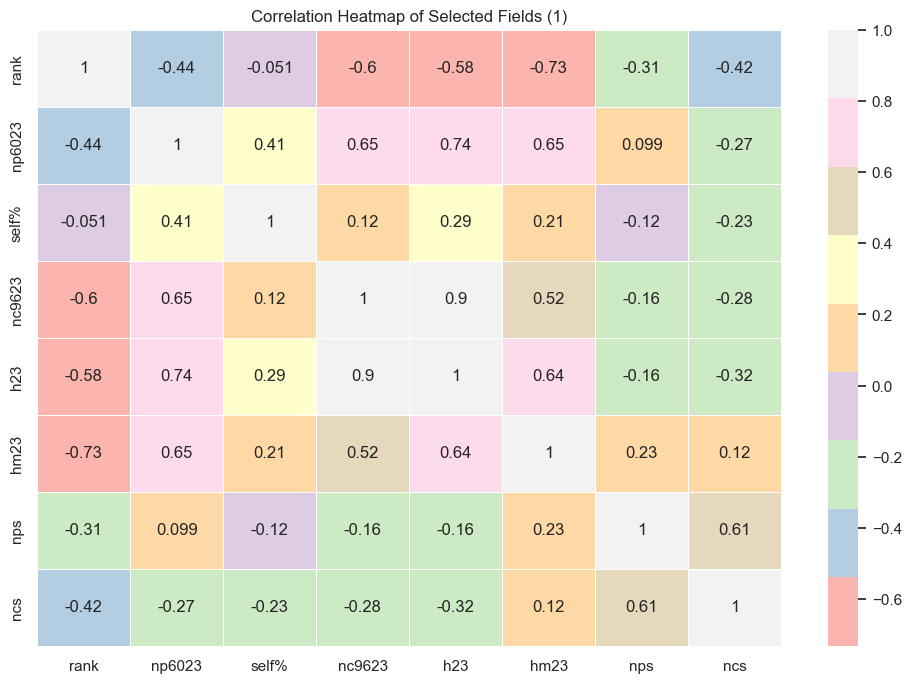

In [112]:
sci100k_1 = pd.DataFrame(sci100k[['rank','np6023', 'self%', 'nc9623', 'h23', 'hm23', 'nps', 'ncs']])
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_1.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields (1)')

Text(0.5, 1.0, 'Correlation Heatmap of Selected Fields (2)')

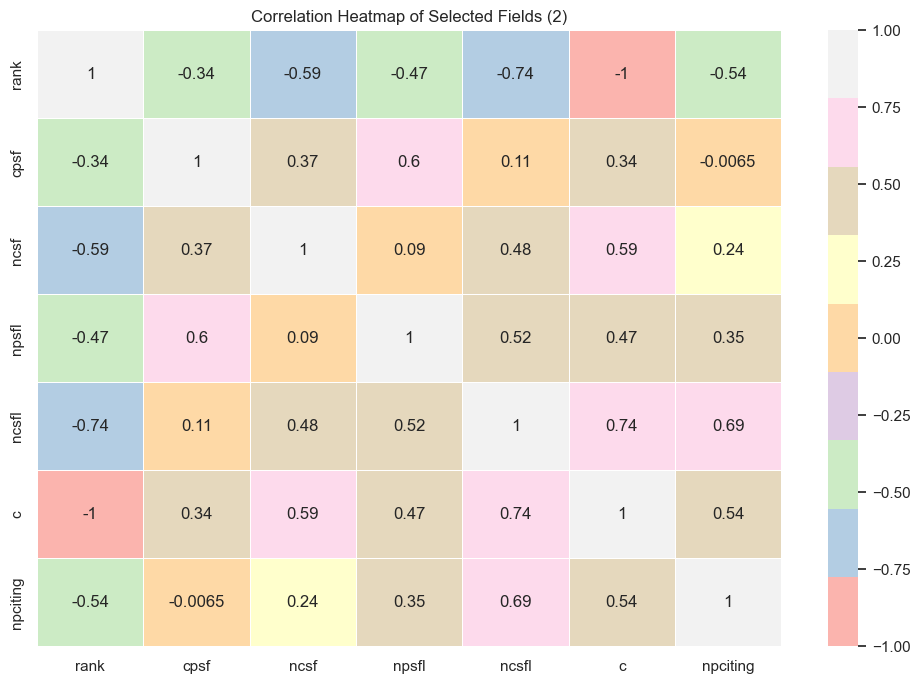

In [114]:
sci100k_2 = pd.DataFrame(sci100k[['rank', 'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'c', 'npciting',]])
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_2.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields (2)')

Note: we are trying to create a feature that has a higher correlation score than c

Text(0.5, 1.0, 'Correlation Heatmap of Selected Fields')

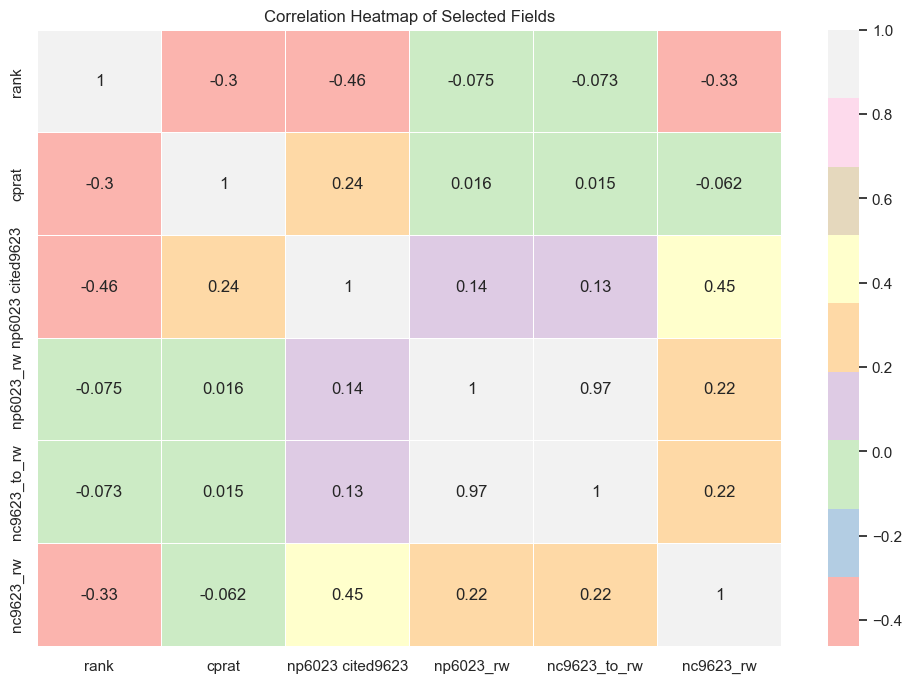

In [117]:
sci100k_3 = pd.DataFrame(sci100k[['rank', 'cprat', 'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw']])
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_3.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields')

Text(0.5, 1.0, 'Correlation Heatmap of Selected Fields (4)')

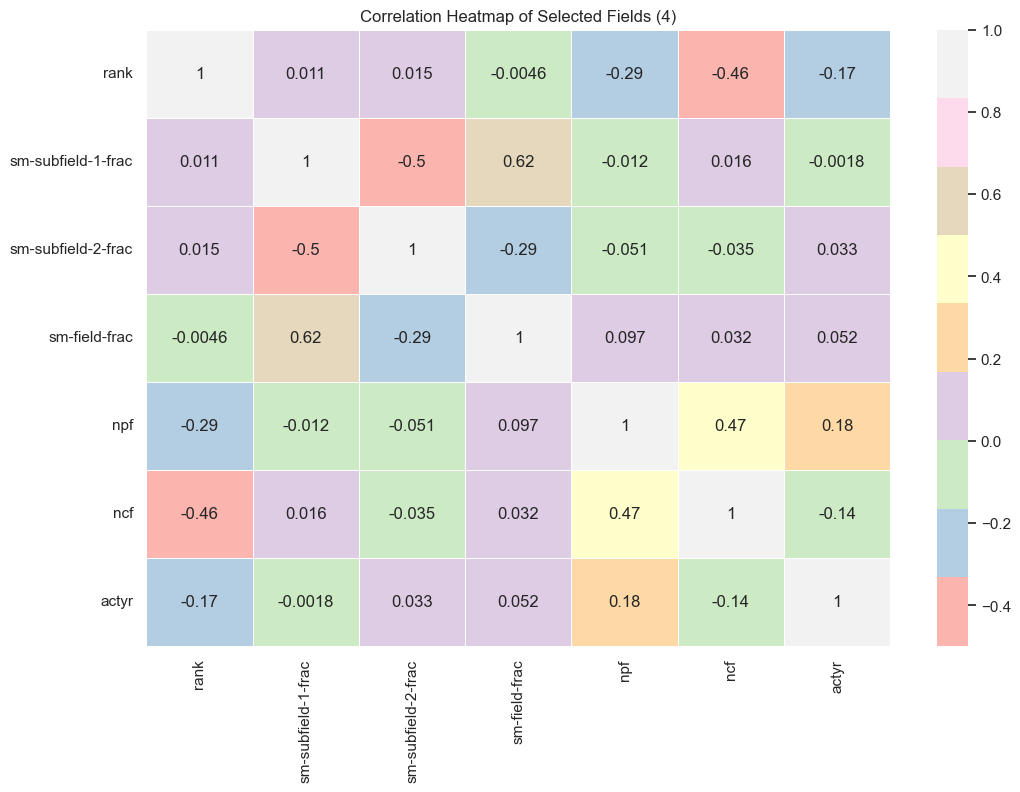

In [119]:
sci100k_4 = pd.DataFrame(sci100k[['rank', 'sm-subfield-1-frac', 'sm-subfield-2-frac', 'sm-field-frac', 'npf', 'ncf', 'actyr']])
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_4.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields (4)')

From analysing the 4 heatmaps above, here is a DataFrame solely consisting of features having a correlation of at least 0.3. We have removed 'ncf' as it is derived off 'ncsf', but has a lower correlation score.

In [122]:
sci100k_impt = pd.DataFrame(sci100k[['rank', 'np6023', 'nc9623', 'h23', 'hm23', 'ncsf', 'npsfl', 'ncsfl', 'npciting', 'np6023 cited9623']])

In [124]:
sci100k_impt.head()

rank  np6023  nc9623  h23        hm23    ncsf  npsfl   ncsfl  npciting  \
0     2    1760  392395  281  120.981965   32280    943  252230    142509   
1     1    2644  327659  275  140.601151   41009   1966  264116    128016   
2     3    2416  381657  320  127.503846   37917    826  142359    220721   
3     4     388  303251  117   51.704883  260685    194  279757    135764   
4     6    1098  284705  249   89.943757  131235    572  204328    181084   

   np6023 cited9623  
0              1688  
1              2461  
2              2253  
3               379  
4              1067

Text(0.5, 1.0, 'Correlation Heatmap of Features with Corr < -0.3')

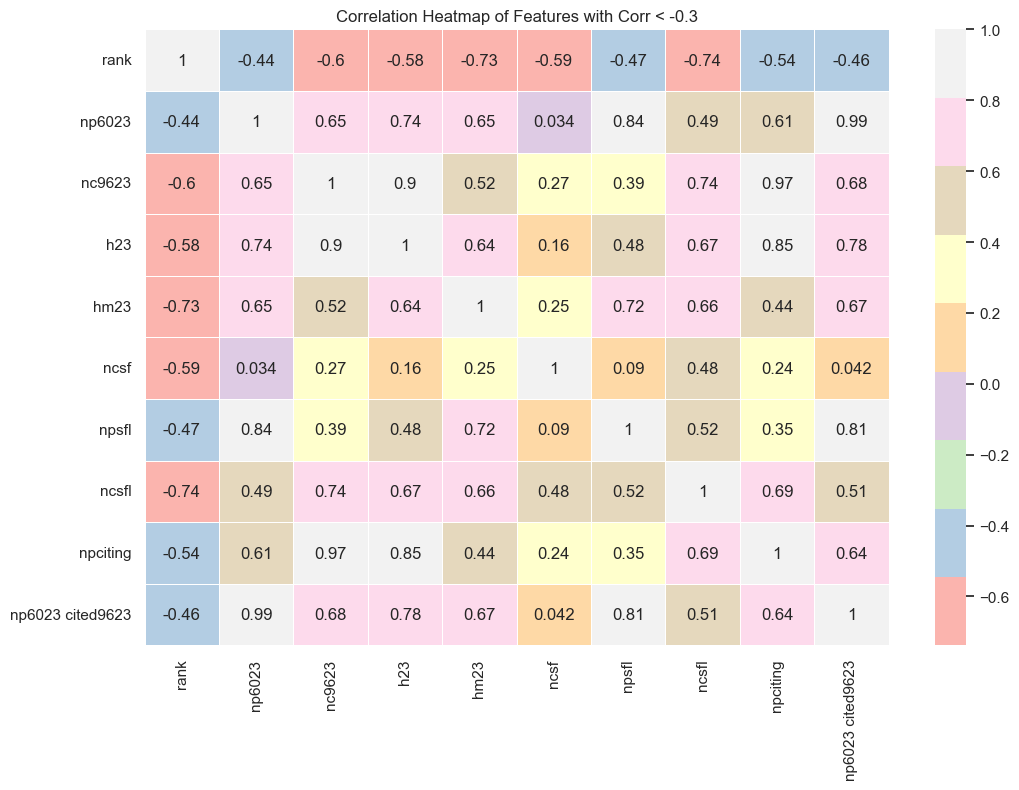

In [126]:
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_impt.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Features with Corr < -0.3')

Text(0.5, 1.0, 'Correlation Heatmap of Features with Corr < -0.3')

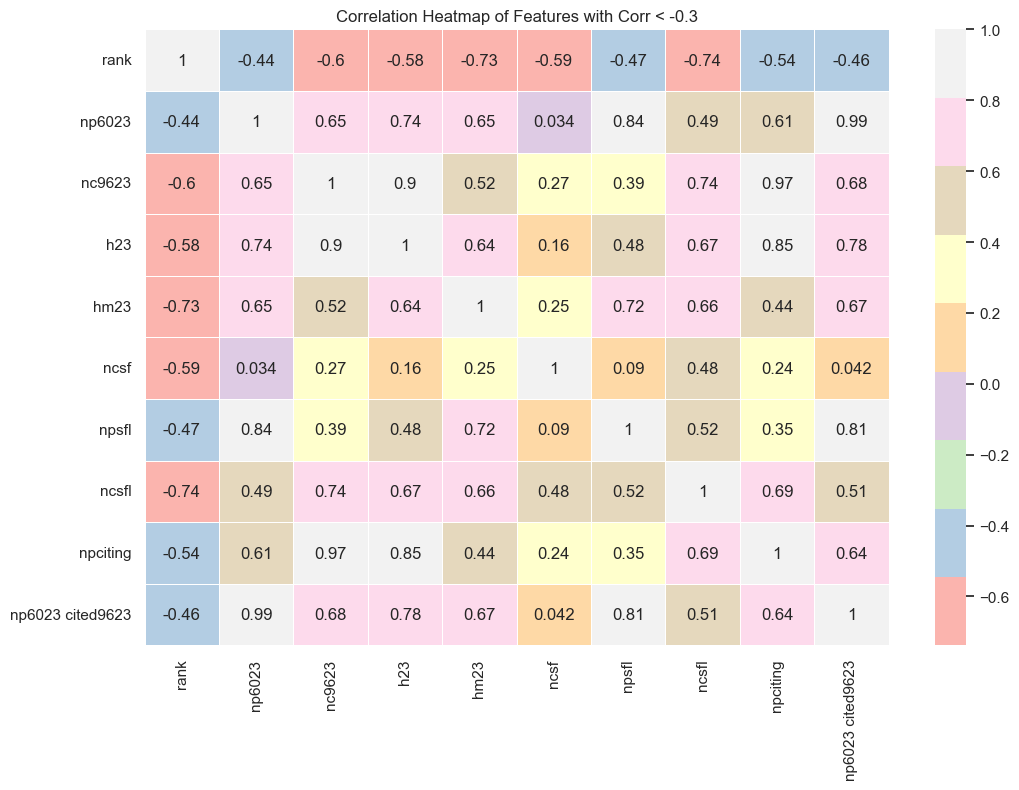

In [128]:
##other corr methods:
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_impt.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Features with Corr < -0.3')

# Attempting to take reciprocals to find corr

In [131]:
scireci = pd.DataFrame(sci100k_impt['rank'])
scireci['renp6023'] = 1/sci100k_impt['np6023']
scireci['rehm23'] = 1/sci100k_impt['hm23']
scireci['renc9623'] = 1/sci100k_impt['nc9623']
scireci['rencsf'] = 1/sci100k_impt['ncsf']
scireci['renpsfl'] = 1/sci100k_impt['npsfl']
scireci['rencsfl'] = 1/sci100k_impt['ncsfl']
scireci['renpciting'] = 1/sci100k_impt['npciting']
scireci['renp6023 cited9623'] = 1/sci100k_impt['np6023 cited9623']

Text(0.5, 1.0, 'Correlation Heatmap of Reciprocal Features')

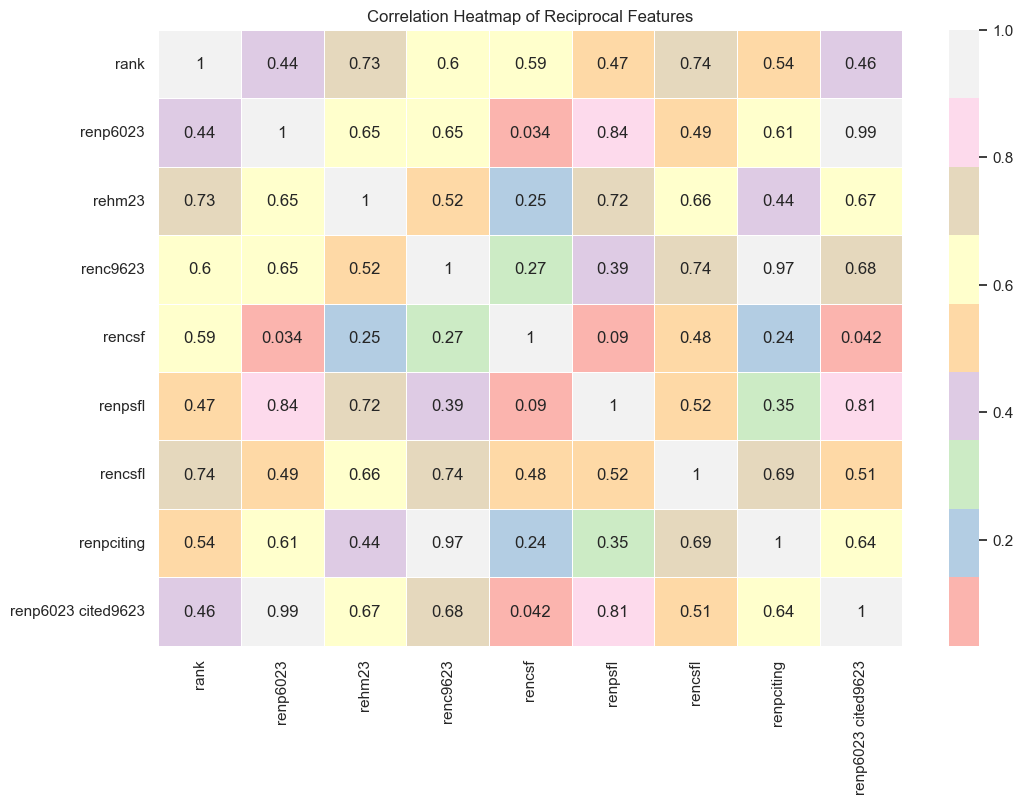

In [133]:
plt.figure(figsize=(12, 8))
sb.heatmap(scireci.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Reciprocal Features')

# Attempting to square root to find corr

In [136]:
scisqr = pd.DataFrame(sci100k_impt['rank'])
scisqr['sqnp6023'] = sci100k_impt['np6023'] **0.5
scisqr['sqhm23'] = sci100k_impt['hm23'] **0.5
scisqr['sqh23'] = sci100k_impt['h23'] **0.5

scisqr['sqnc9623'] = sci100k_impt['nc9623'] ** 0.5
scisqr['sqncsf'] = sci100k_impt['ncsf'] **0.5
scisqr['sqnpsfl'] = sci100k_impt['npsfl'] **0.5
scisqr['sqncsfl'] = sci100k_impt['ncsfl'] **0.5
scisqr['sqnpciting'] = sci100k_impt['npciting'] **0.5 
scisqr['sqnp6023 cited9623'] = sci100k_impt['np6023 cited9623']**0.5

Text(0.5, 1.0, 'Correlation Heatmap of Squared Features')

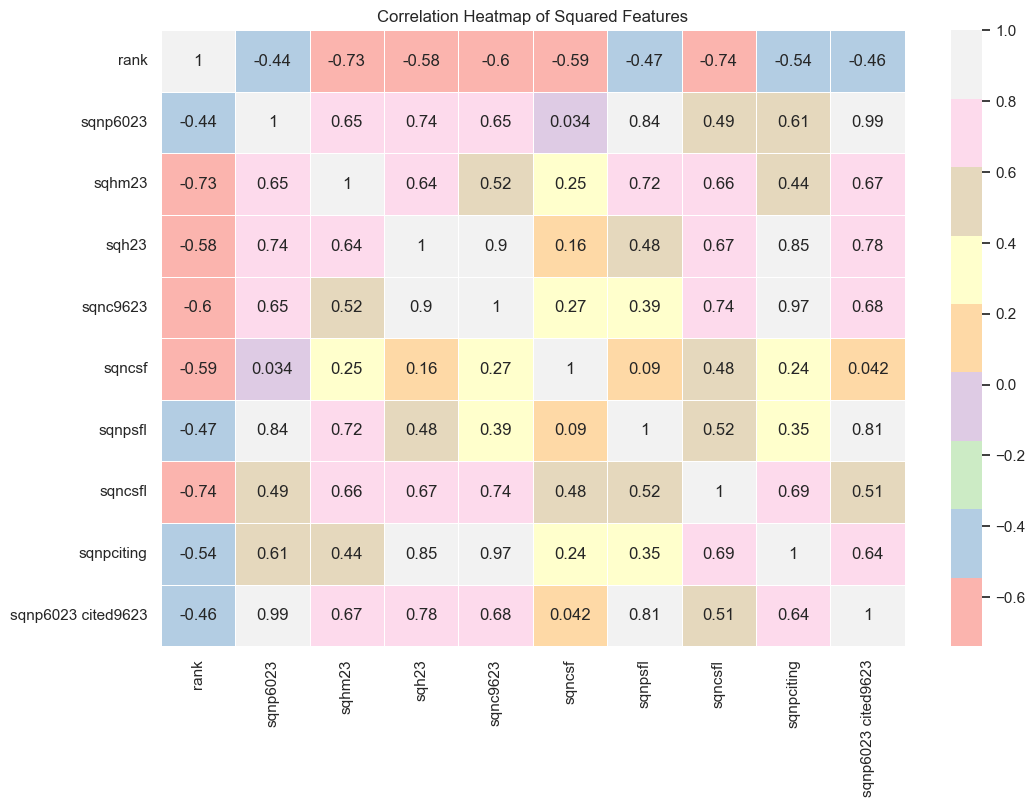

In [138]:
plt.figure(figsize=(12, 8))
sb.heatmap(scisqr.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Squared Features')

## How about log10?

In [141]:
scilog = pd.DataFrame(sci100k_impt['rank'])
scilog['lognp6023'] = np.log10(sci100k_impt['np6023'])
scilog['loghm23'] = np.log10(sci100k_impt['hm23'])
scilog['logh23'] = np.log10(sci100k_impt['h23'])
scilog['lognc9623'] = np.log10(sci100k_impt['nc9623'])
scilog['logncsf'] = np.log10(sci100k_impt['ncsf'])
scilog['lognpsfl'] = np.log10(sci100k_impt['npsfl'])
scilog['logncsfl'] = np.log10(sci100k_impt['ncsfl'])
scilog['lognpciting'] = np.log10(sci100k_impt['npciting'])
scilog['lognp6023 cited9623'] = np.log10(sci100k_impt['np6023 cited9623'])

Text(0.5, 1.0, 'Correlation Heatmap of Log10 Features')

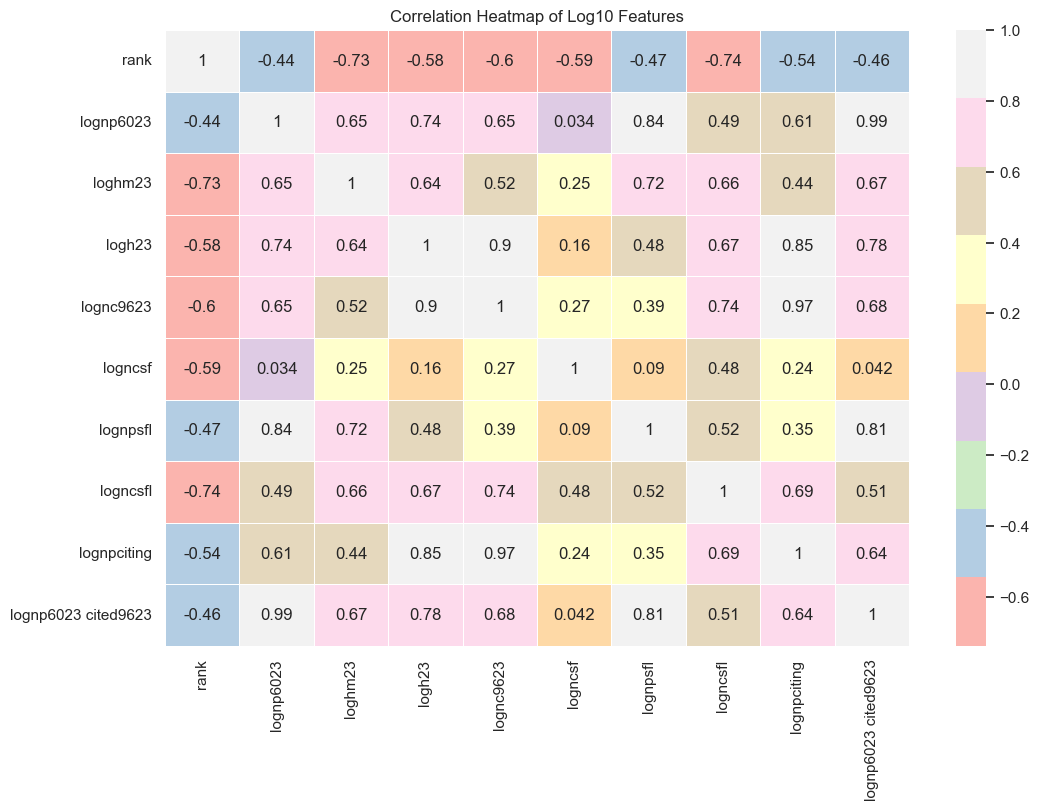

In [143]:
plt.figure(figsize=(12, 8))
sb.heatmap(scilog.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Log10 Features')

It seems that univariate "manipulation" does nothing for Spearman coefficient. Let's try multiplying stuff instead

# Multiply hm23 to everything

In [147]:
sci1 = pd.DataFrame(sci100k_impt['rank'])
sci1['anp6023'] = sci100k_impt['np6023'] * sci100k_impt['hm23']
sci1['ahm23'] = sci100k_impt['hm23']* sci100k_impt['hm23']
sci1['ah23'] = sci100k_impt['h23']* sci100k_impt['h23']
sci1['anc9623'] = sci100k_impt['nc9623']* sci100k_impt['hm23']
sci1['ancsf'] = sci100k_impt['ncsf'] * sci100k_impt['hm23']
sci1['anpsfl'] = sci100k_impt['npsfl']*  sci100k_impt['hm23']
sci1['ancsfl'] = sci100k_impt['ncsfl'] * sci100k_impt['hm23']
sci1['anpciting'] = sci100k_impt['npciting']* sci100k_impt['hm23']
sci1['anp6023 cited9623'] = sci100k_impt['np6023 cited9623']* sci100k_impt['hm23']

Text(0.5, 1.0, 'Correlation Heatmap of Added Features')

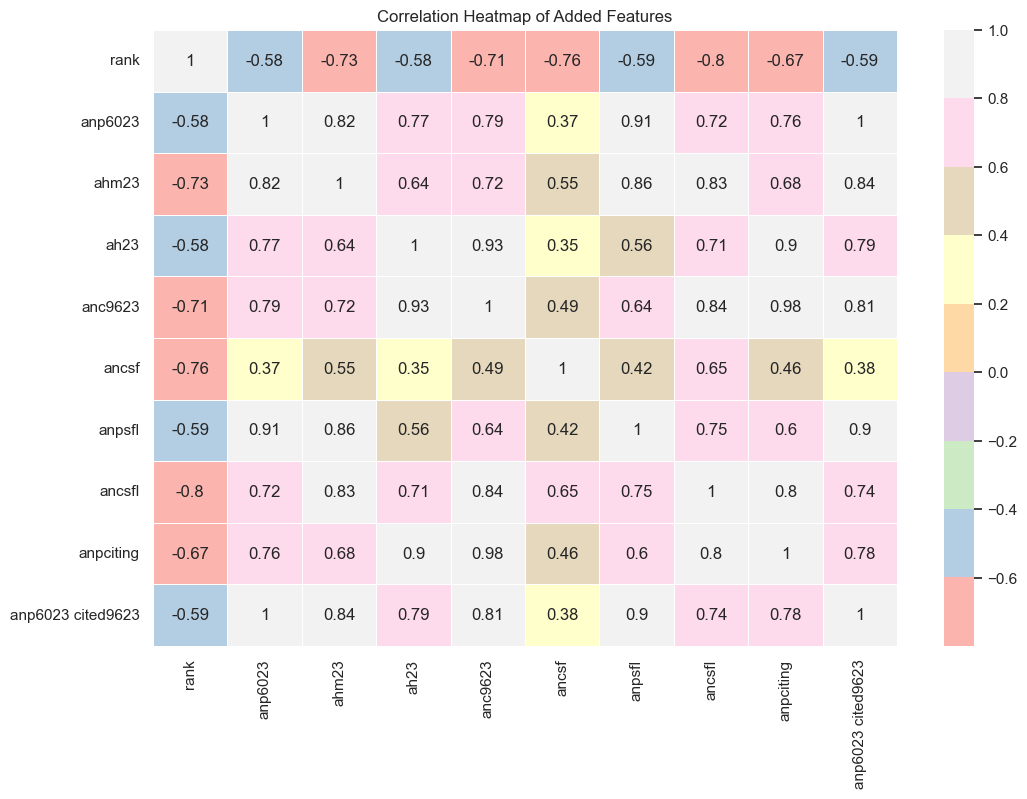

In [149]:
plt.figure(figsize=(12, 8))
sb.heatmap(sci1.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Added Features')

# Multiply hm23 to everything

In [152]:
sci2 = pd.DataFrame(sci100k_impt['rank'])
sci2['anp6023'] = sci100k_impt['np6023'] * sci100k_impt['h23']
sci2['ahm23'] = sci100k_impt['hm23']* sci100k_impt['h23']
sci2['ah23'] = sci100k_impt['h23']* sci100k_impt['h23']
sci2['anc9623'] = sci100k_impt['nc9623']* sci100k_impt['h23']
sci2['ancsf'] = sci100k_impt['ncsf'] * sci100k_impt['h23']
sci2['anpsfl'] = sci100k_impt['npsfl']*  sci100k_impt['h23']
sci2['ancsfl'] = sci100k_impt['ncsfl'] * sci100k_impt['h23']
sci2['anpciting'] = sci100k_impt['npciting']* sci100k_impt['h23']
sci2['anp6023 cited9623'] = sci100k_impt['np6023 cited9623']* sci100k_impt['h23']

Text(0.5, 1.0, 'Correlation Heatmap of Added Features')

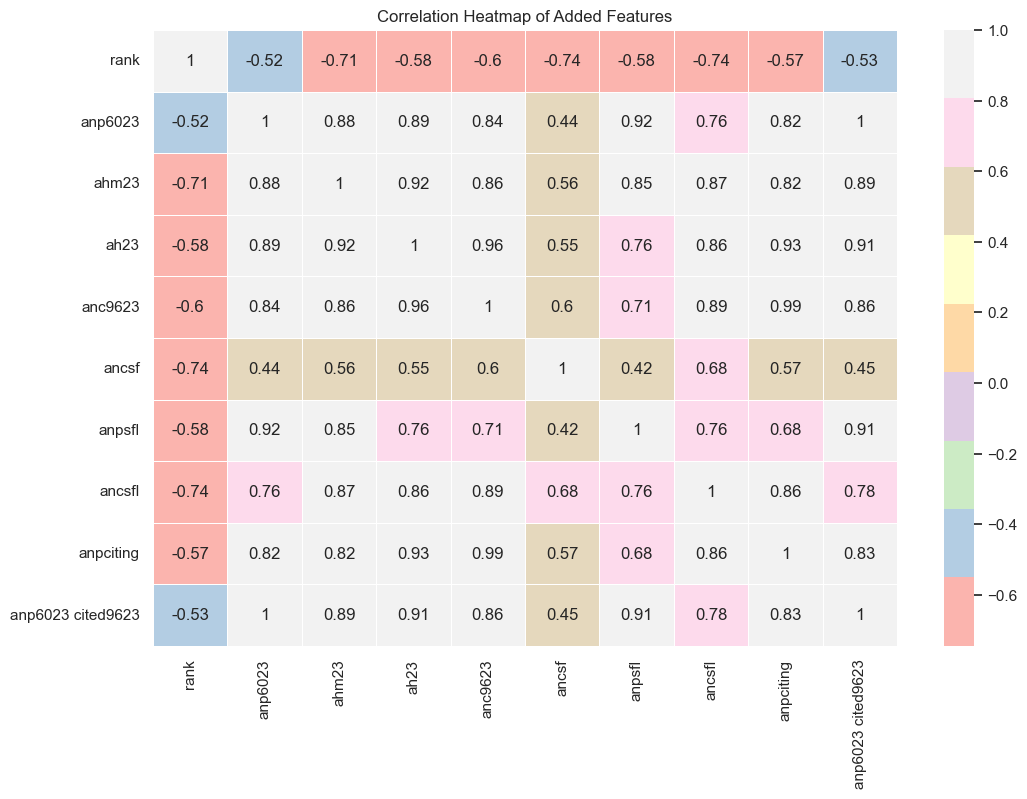

In [154]:
plt.figure(figsize=(12, 8))
sb.heatmap(sci2.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Added Features')

Let's create a new composite index, hcomp23, which is the product of h23 and hm23.

In [157]:
sci100k_impt['hcomp23'] = (sci100k_impt['hm23'] * sci100k_impt['h23'])

In [159]:
sci3 = pd.DataFrame(sci100k_impt['rank'])
sci3['hnp6023'] = sci100k_impt['np6023'] * sci100k_impt['hcomp23']
sci3['hhm23'] = sci100k_impt['hm23']* sci100k_impt['hcomp23']
sci3['hnc9623'] = sci100k_impt['nc9623']* sci100k_impt['hcomp23']
sci3['hncsf'] = sci100k_impt['ncsf'] * sci100k_impt['hcomp23']
sci3['hnpsfl'] = sci100k_impt['npsfl']* sci100k_impt['hcomp23']
sci3['hncsfl'] = sci100k_impt['ncsfl'] * sci100k_impt['hcomp23']
sci3['hnpciting'] = sci100k_impt['npciting'] * sci100k_impt['hcomp23']
sci3['hnp6023 cited9623'] = sci100k_impt['np6023 cited9623']* sci100k_impt['hcomp23']

Text(0.5, 1.0, "Correlation Heatmap of Comp'd Features")

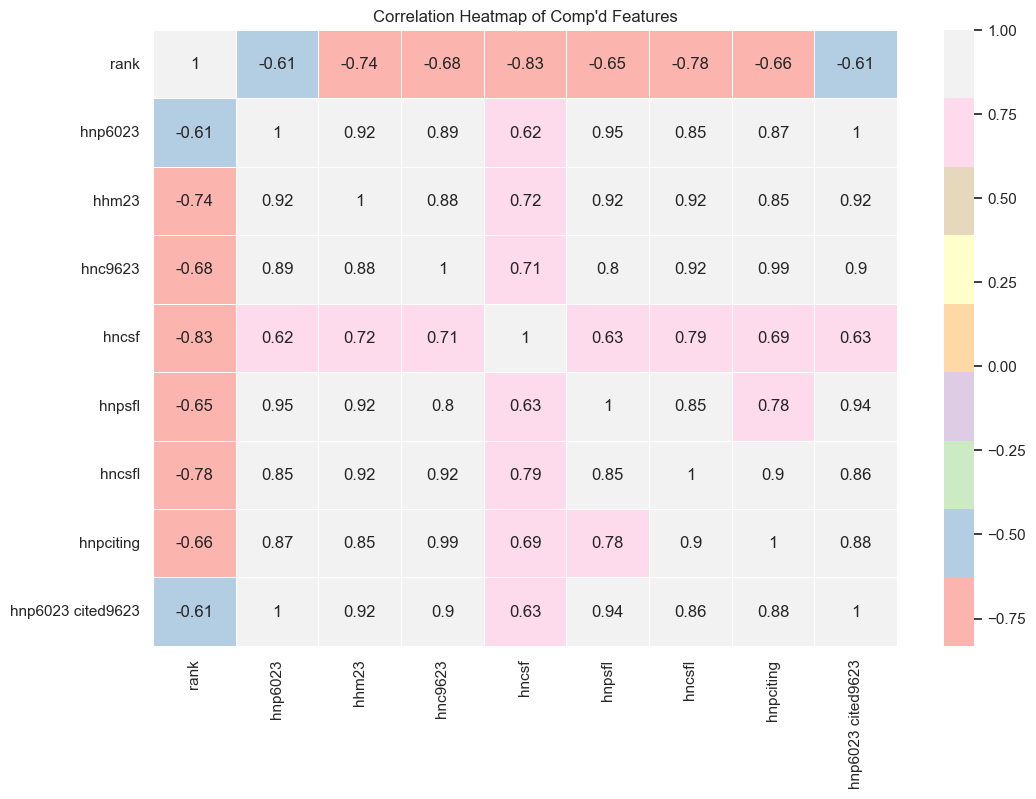

In [161]:
plt.figure(figsize=(12, 8))
sb.heatmap(sci3.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title("Correlation Heatmap of Comp'd Features")

Seems that we're getting closer

In [164]:
# contents above are borrowed from Lloyd's code

## Bi-Variate KMeans Clustering (using Within Cluster Sum of Squares)

In [167]:
sci3.describe()

rank       hnp6023         hhm23       hnc9623         hncsf  \
count  100000.000000  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
mean    50789.747990  6.011202e+05  5.157971e+04  4.552306e+07  7.378743e+06   
std     30041.900996  1.490498e+06  9.183725e+04  1.811331e+08  2.935351e+07   
min         1.000000  6.600000e+01  2.177778e+01  1.486688e+05  5.718133e+04   
25%     25005.750000  1.131649e+05  1.599544e+04  5.648797e+06  1.365766e+06   
50%     50051.500000  2.527654e+05  2.835585e+04  1.327233e+07  2.553993e+06   
75%     75494.250000  5.800912e+05  5.445632e+04  3.499551e+07  5.703036e+06   
max    121807.000000  1.022311e+08  5.436388e+06  1.630366e+10  2.939138e+09   

             hnpsfl        hncsfl     hnpciting  hnp6023 cited9623  
count  1.000000e+05  1.000000e+05  1.000000e+05       1.000000e+05  
mean   3.337621e+05  2.241312e+07  3.011553e+07       5.430615e+05  
std    8.290926e+05  9.716880e+07  1.120899e+08       1.368557e+06  
min    3.733333e+01  1.485562e+05  1.483688e+05       0.000000e+00  
25%    6.895420e+04  3.205600e+06  4.013968e+06       1.016339e+05  
50%    1.440421e+05  6.642612e+06  9.292323e+06       2.268735e+05  
75%    3.189130e+05  1.632234e+07  2.403893e+07       5.209284e+05  
max    7.601601e+07  1.021213e+10  1.198135e+10       9.515534e+07

In [204]:
def Bivariate_KMeans_WithinSS(a):
    # Import KMeans from sklearn.cluster
    from sklearn.cluster import KMeans
    
    # Extract the Features from our Data
    X = pd.DataFrame(sci3[['rank', a]])
    
    # Vary the Number of Clusters
    min_clust = 1
    max_clust = 30

    # Compute Within Cluster Sum of Squares
    within_ss = []
    for num_clust in range(min_clust, max_clust+1):
        kmeans = KMeans(n_clusters = num_clust)
        kmeans.fit(X)
        within_ss.append(kmeans.inertia_)

    # Plot Within SS vs Number of Clusters
    f, axes = plt.subplots(1, 1, figsize=(16,4))
    plt.plot(range(min_clust, max_clust+1), within_ss)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within Cluster Sum of Squares')
    plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
    plt.grid(which='major', axis='y')
    plt.show()

    
def Bivariate_KMeans_optimal(a, b):
    # Import KMeans from sklearn.cluster
    from sklearn.cluster import KMeans

    # Extract the Features from our Data
    X = pd.DataFrame(sci3[['rank', a]])
    
    # Create Clustering Model using KMeans
    kmeans = KMeans(n_clusters = num_clust)

    # Fit the Clustering Model on the Data
    kmeans.fit(X)

    # Print the Cluster Centers
    print("Features", b, "\trank")
    print()

    for i, center in enumerate(kmeans.cluster_centers_):
        print("Cluster", i, end=":\t")
        for coord in center:
            print(round(coord, 2), end="\t")
        print()
    print()

    # Print the Within Cluster Sum of Squares
    print("Within Cluster Sum of Squares :", kmeans.inertia_)
    print()
        
    # Predict the Cluster Labels
    labels = kmeans.predict(X)

    # Append Labels to the Data
    X_labeled = X.copy()
    X_labeled["Cluster"] = pd.Categorical(labels)

    # Summary of the Cluster Labels
    sb.countplot(X_labeled["Cluster"])
    
    # Visualize the Clusters in the Data
    f, axes = plt.subplots(1, 1, figsize=(16,8))
    plt.xlabel(a)
    plt.ylabel('rank')
    plt.scatter(x = a, y = "rank", c = "Cluster", cmap = 'viridis', data = X_labeled)
    
    # Boxplots for the Features against the Clusters
    f, axes = plt.subplots(2, 1, figsize=(16,8))
    sb.boxplot(x = a, y = 'Cluster', data = X_labeled, ax = axes[0])
    sb.boxplot(x = 'rank', y = 'Cluster', data = X_labeled, ax = axes[1])
    
    # Average Behaviour of each Cluster
    cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
    cluster_data.plot.bar(figsize = (16,6))

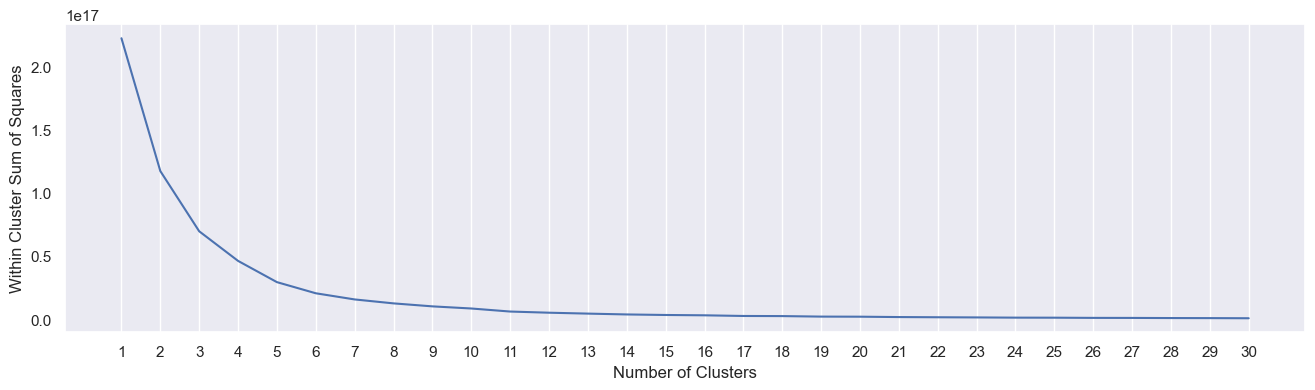

In [206]:
Bivariate_KMeans_WithinSS('hnp6023')

Features 	hnp6023 	rank

Cluster 0:	13253.7	3076507.76	
Cluster 1:	6004.6	7069378.08	
Cluster 2:	27657.53	1139395.9	
Cluster 3:	1299.43	33427903.78	
Cluster 4:	2330.48	15356485.12	
Cluster 5:	58073.3	228425.66	
Cluster 6:	40.25	88200702.87	

Within Cluster Sum of Squares : 1.6744628420445442e+16



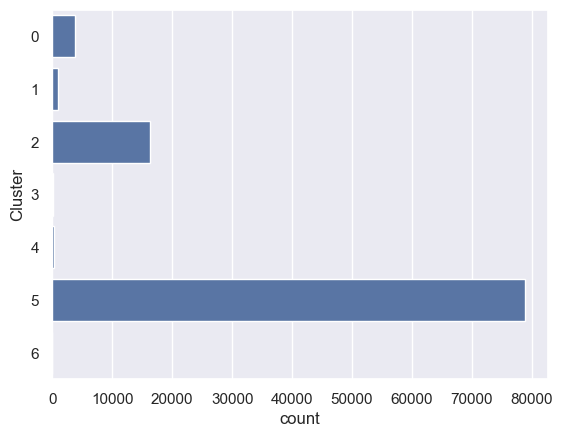

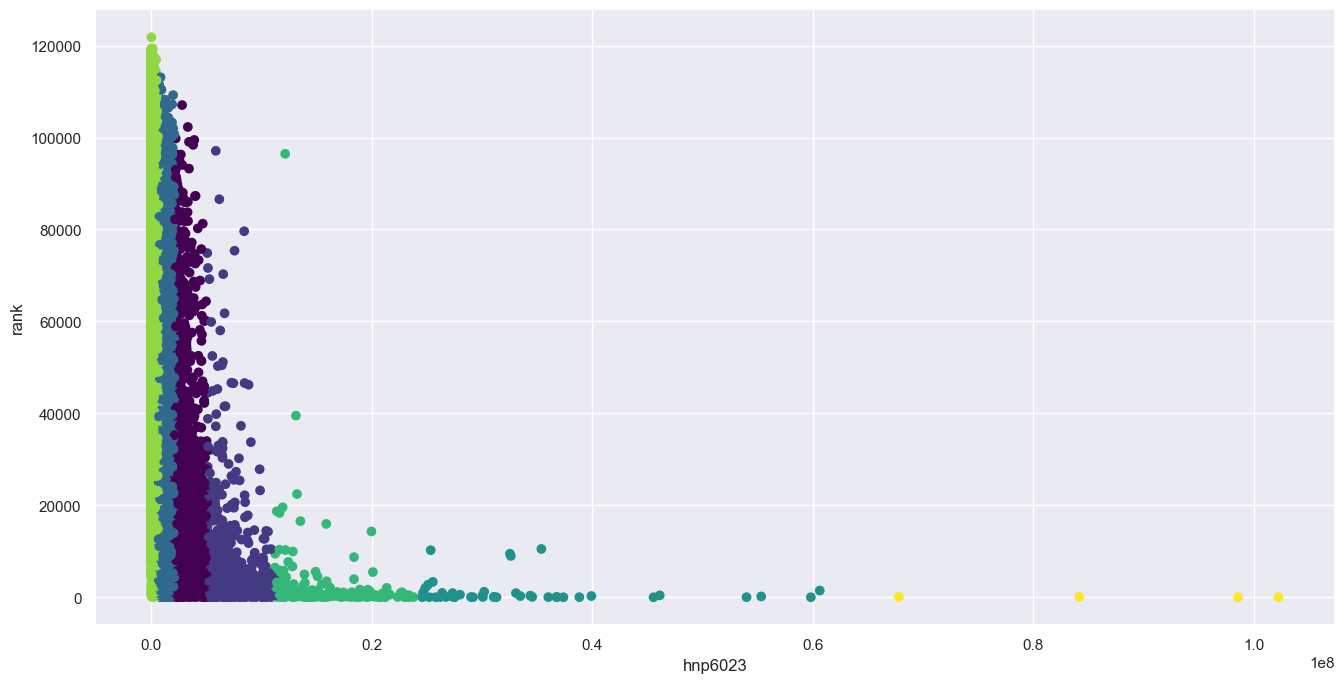

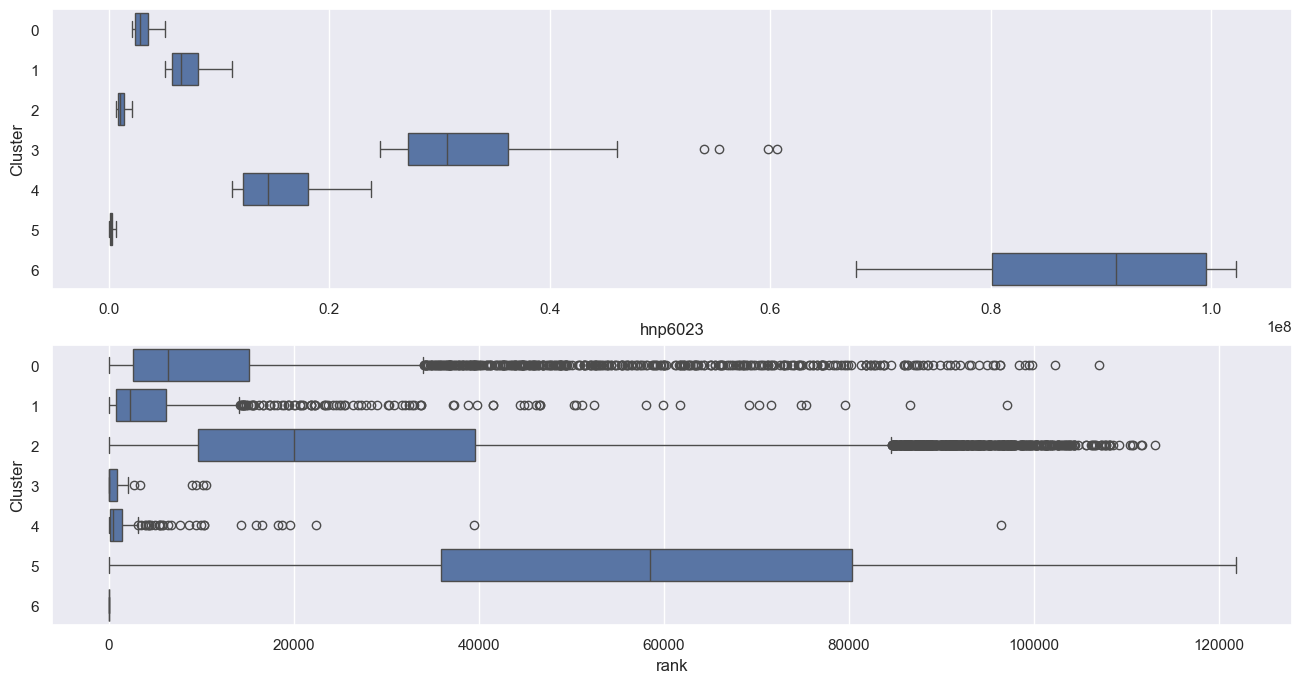

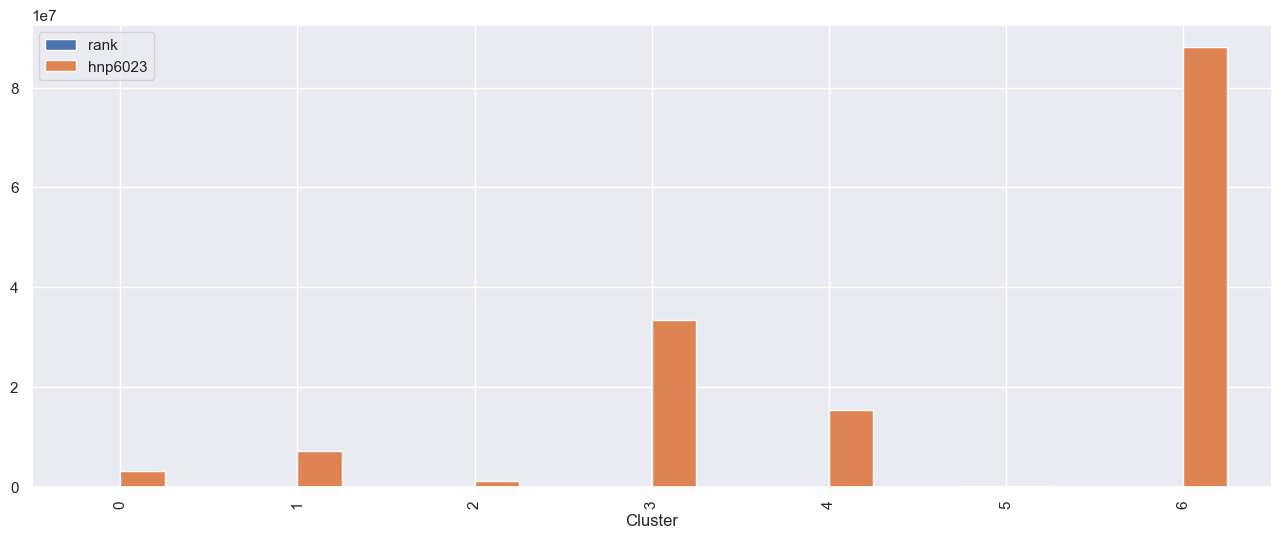

In [214]:
# Set "optimal" Number of Clusters
num_clust = 7

Bivariate_KMeans_optimal('hnp6023', '\thnp6023')

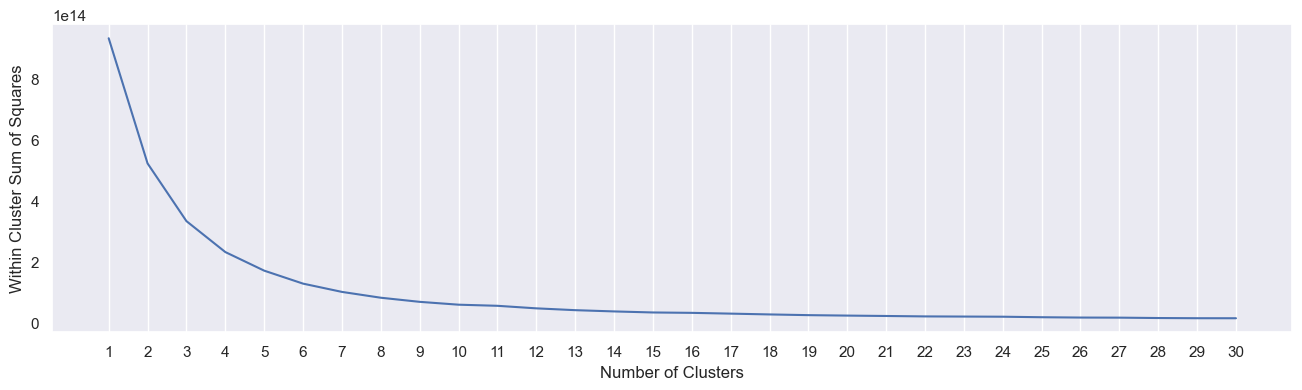

In [216]:
Bivariate_KMeans_WithinSS('hhm23')

Features 	hhm23 	rank

Cluster 0:	80001.25	17918.06	
Cluster 1:	2536.19	519529.23	
Cluster 2:	35631.51	37093.18	
Cluster 3:	531.75	1151029.9	
Cluster 4:	7206.3	243093.76	
Cluster 5:	17610.11	104828.91	
Cluster 6:	40.82	2764749.15	

Within Cluster Sum of Squares : 99985670039912.4



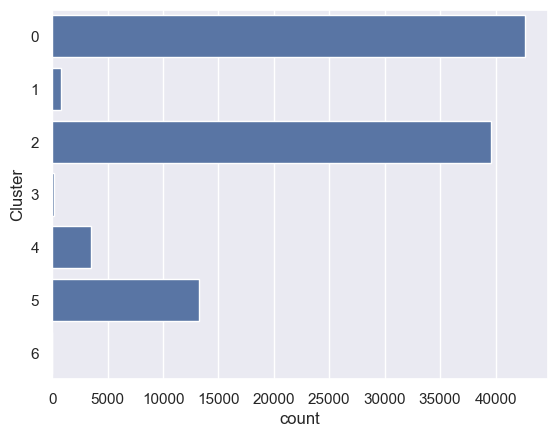

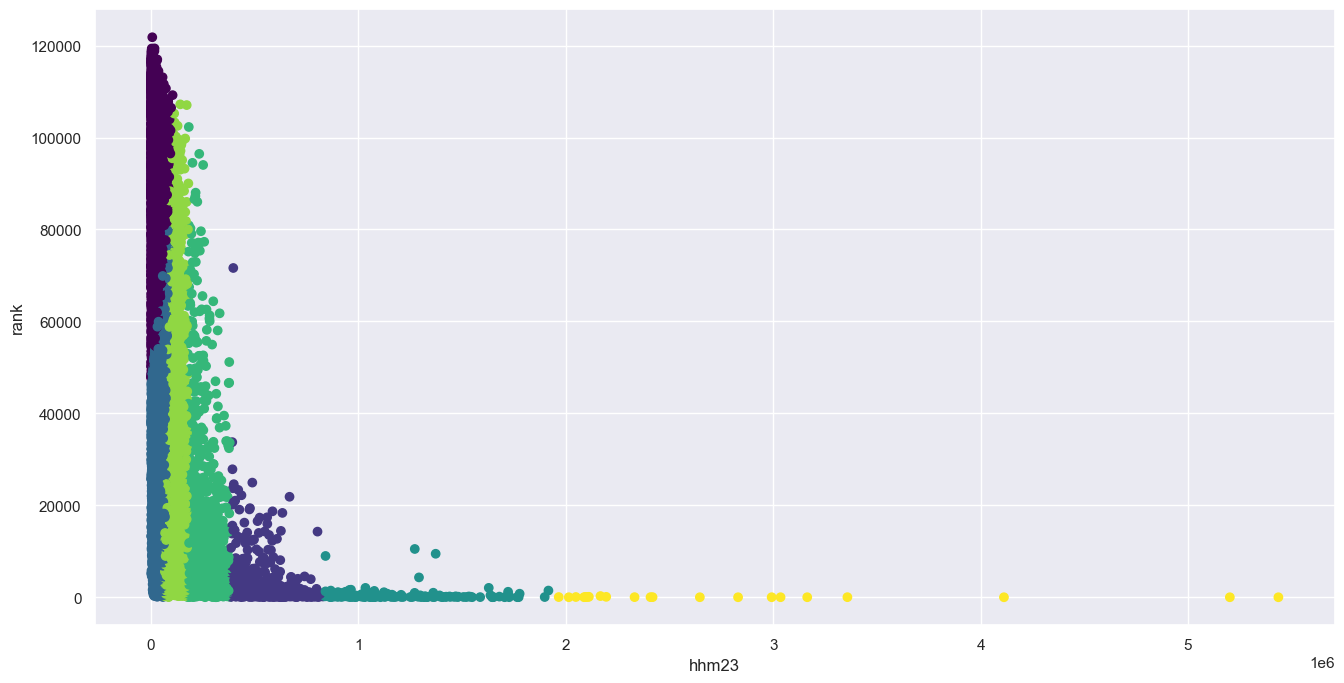

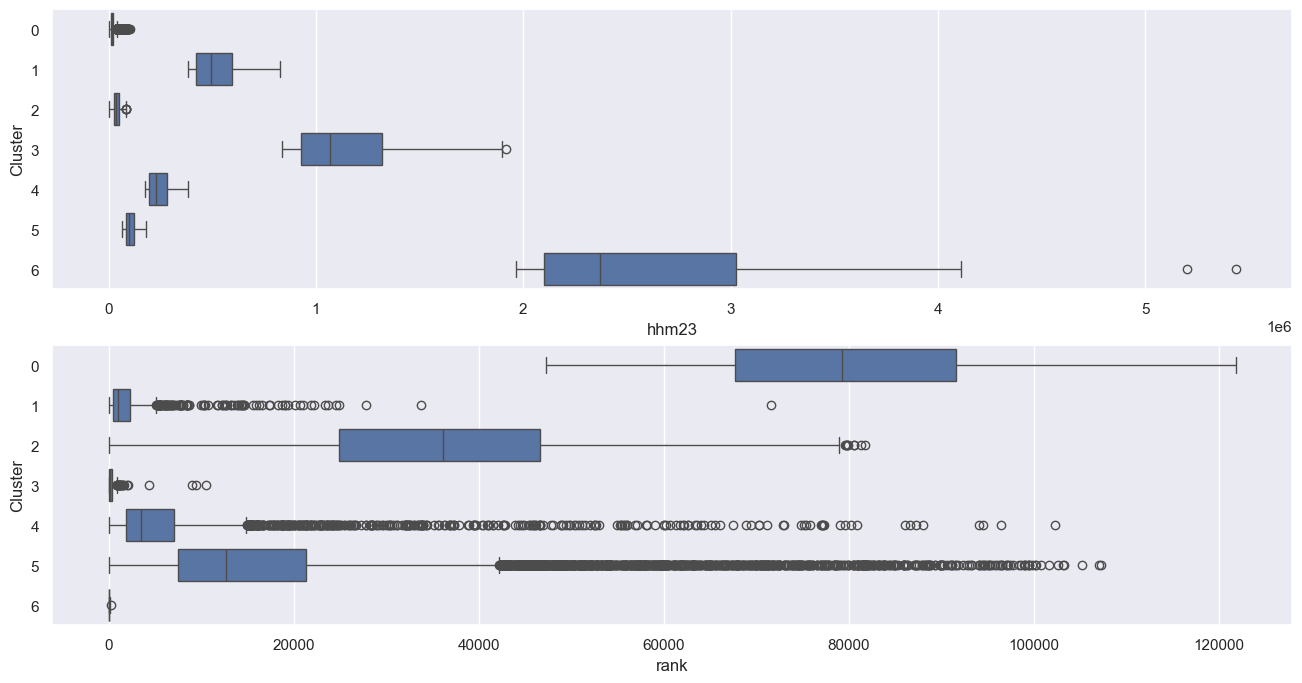

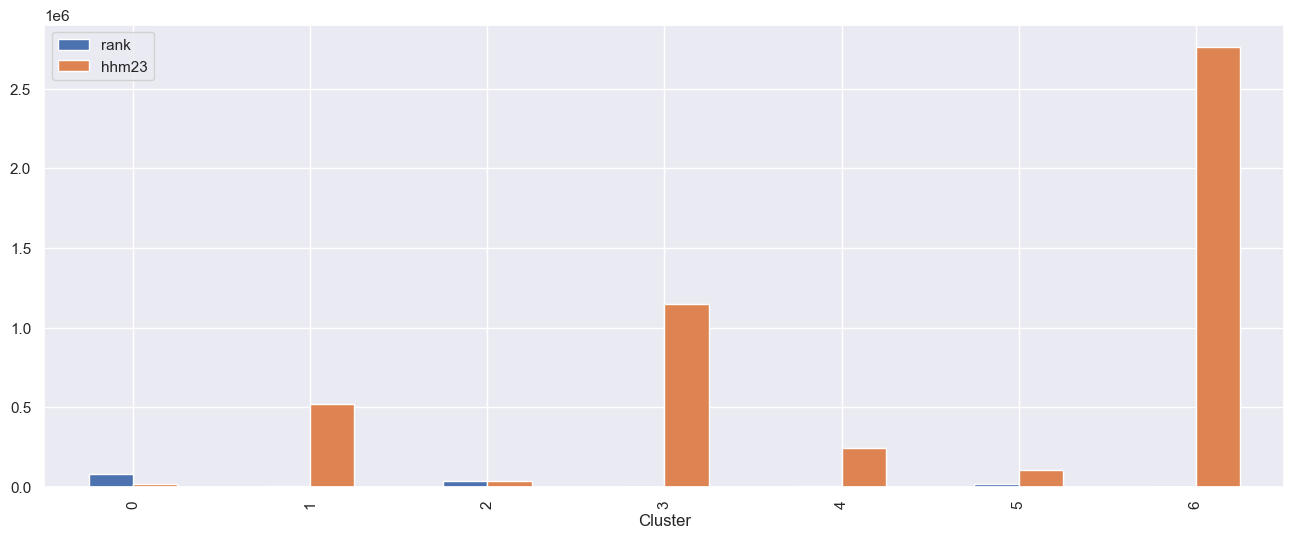

In [218]:
# Set "optimal" Number of Clusters
num_clust = 7

Bivariate_KMeans_optimal('hhm23', '\thhm23')

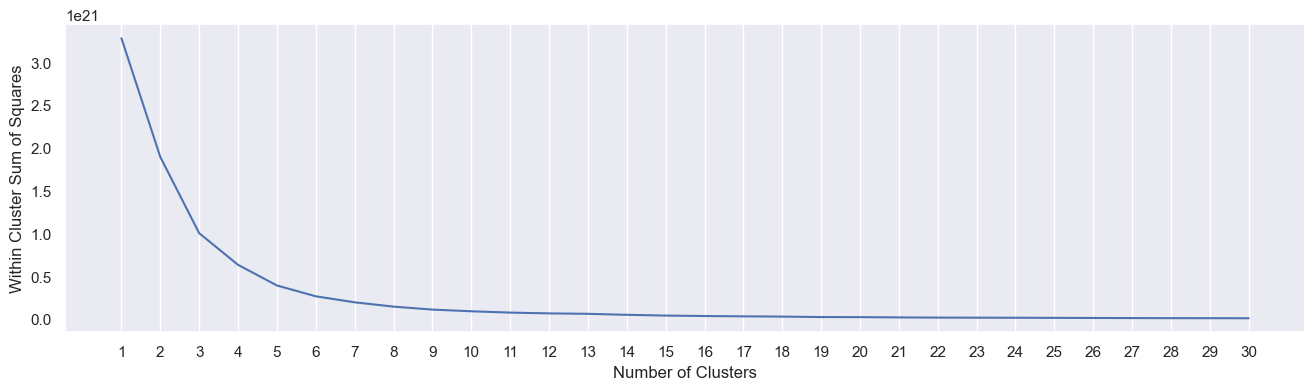

In [220]:
Bivariate_KMeans_WithinSS('hnc9623')

Features 	hnc9623 	rank

Cluster 0:	53792.29	21302957.04	
Cluster 1:	919.12	2096192254.89	
Cluster 2:	4177.25	774502897.24	
Cluster 3:	166.08	5649038070.75	
Cluster 4:	12410.52	223276308.48	
Cluster 5:	3.75	14471150895.22	

Within Cluster Sum of Squares : 2.6514161182110247e+20



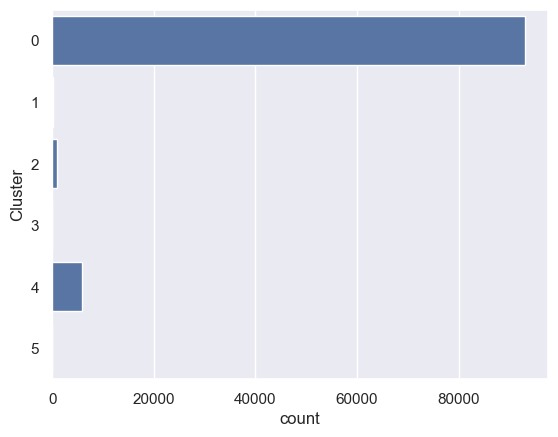

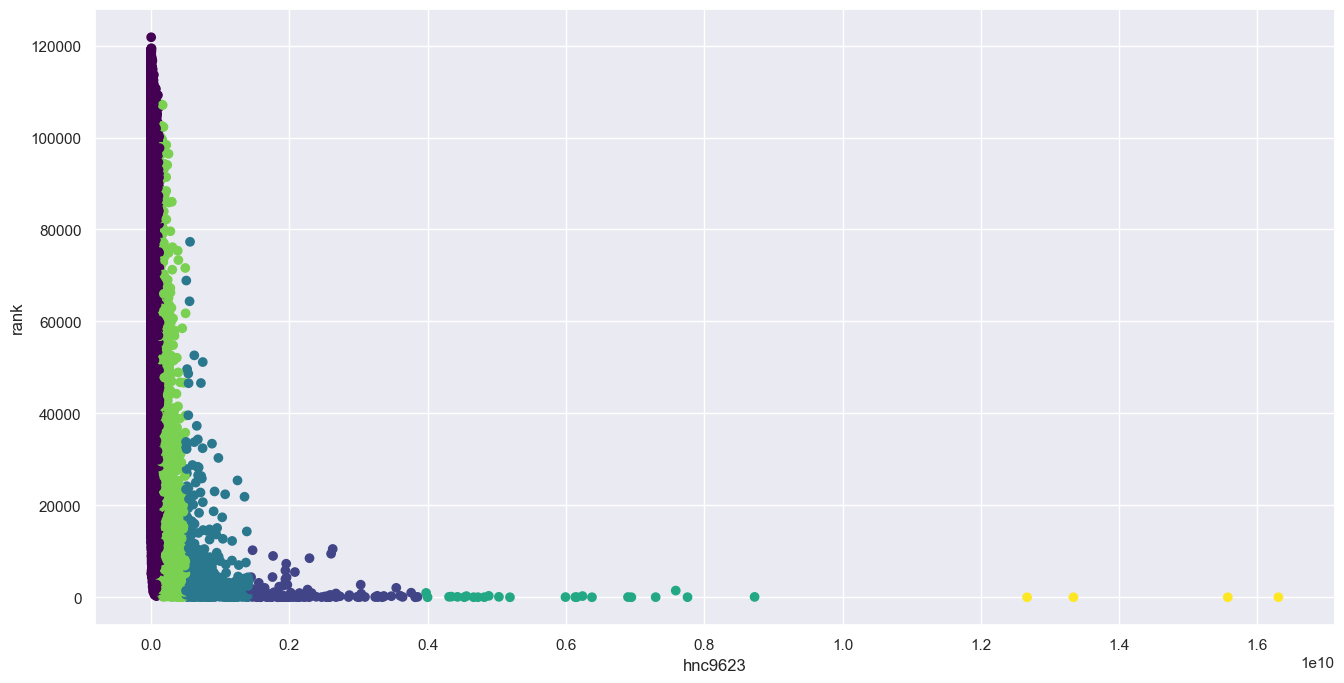

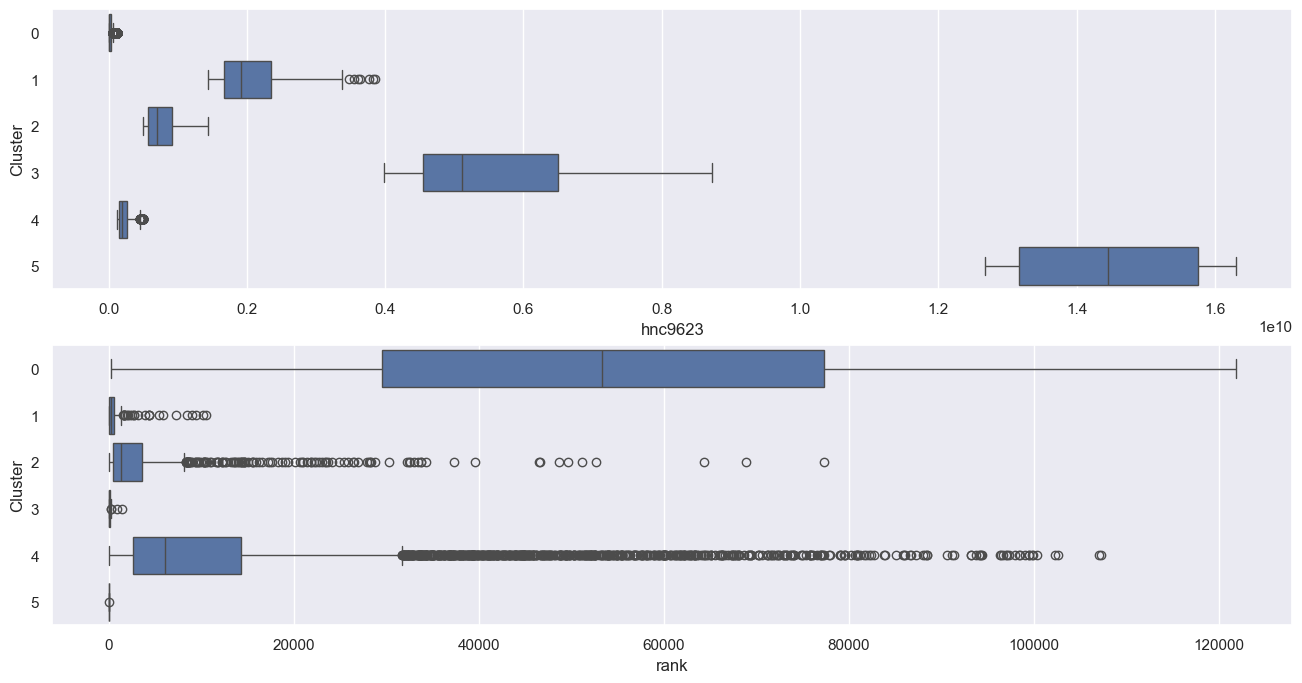

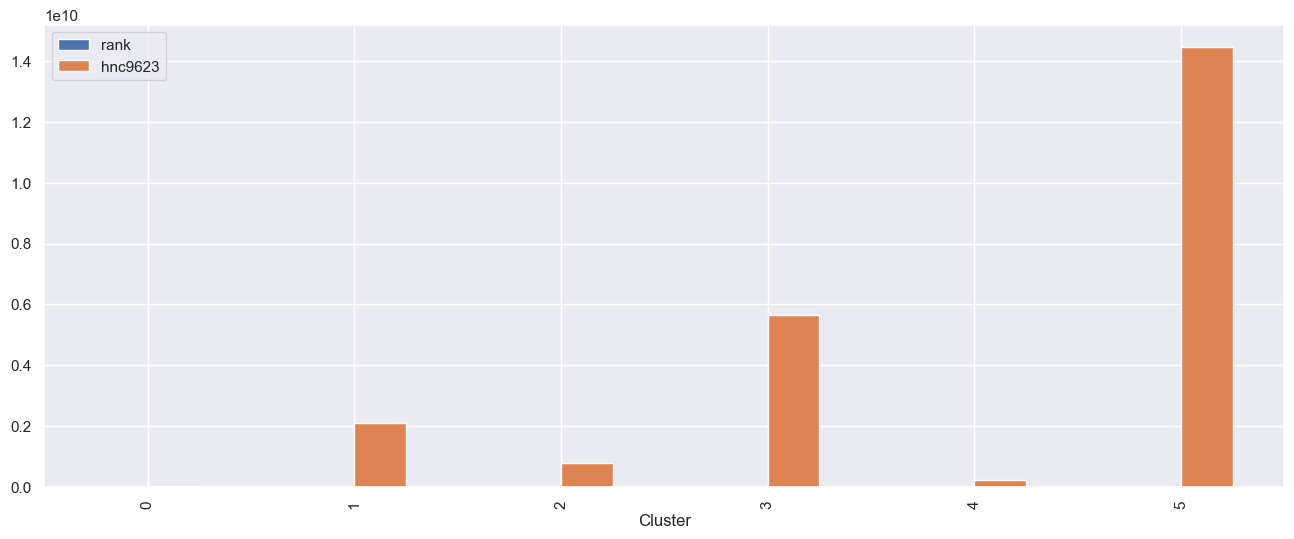

In [222]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeans_optimal('hnc9623', '\thnc9623')

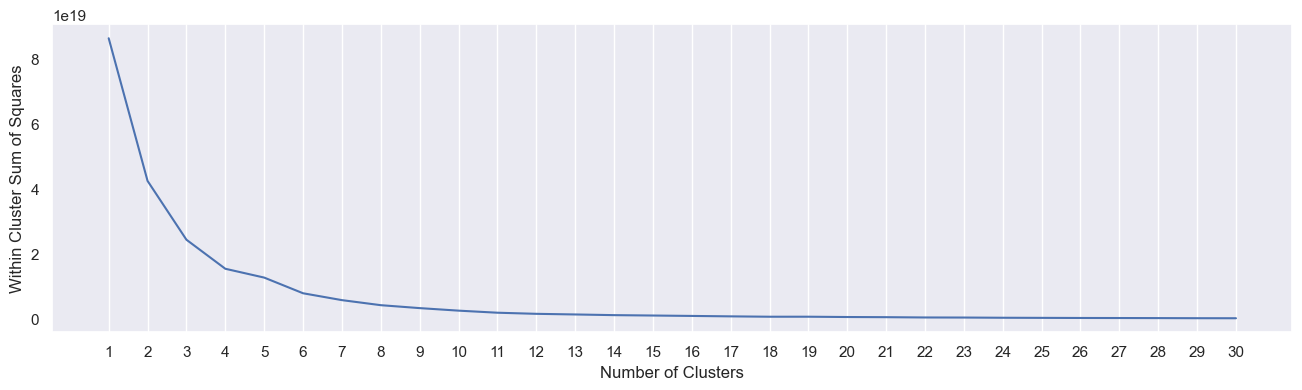

In [224]:
Bivariate_KMeans_WithinSS('hncsf')

Features 	hncsf 	rank

Cluster 0:	55308.74	3335567.55	
Cluster 1:	5.33	1835857038.86	
Cluster 2:	139.48	462397011.67	
Cluster 3:	1989.72	79995578.12	
Cluster 4:	537.22	205940158.39	
Cluster 5:	39.88	926469505.54	
Cluster 6:	9108.51	25176443.71	

Within Cluster Sum of Squares : 6.186221368909238e+18



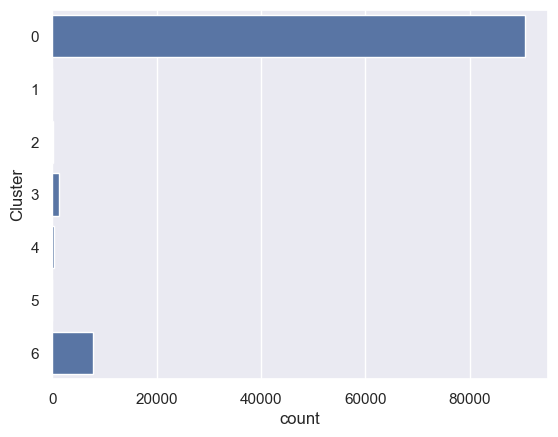

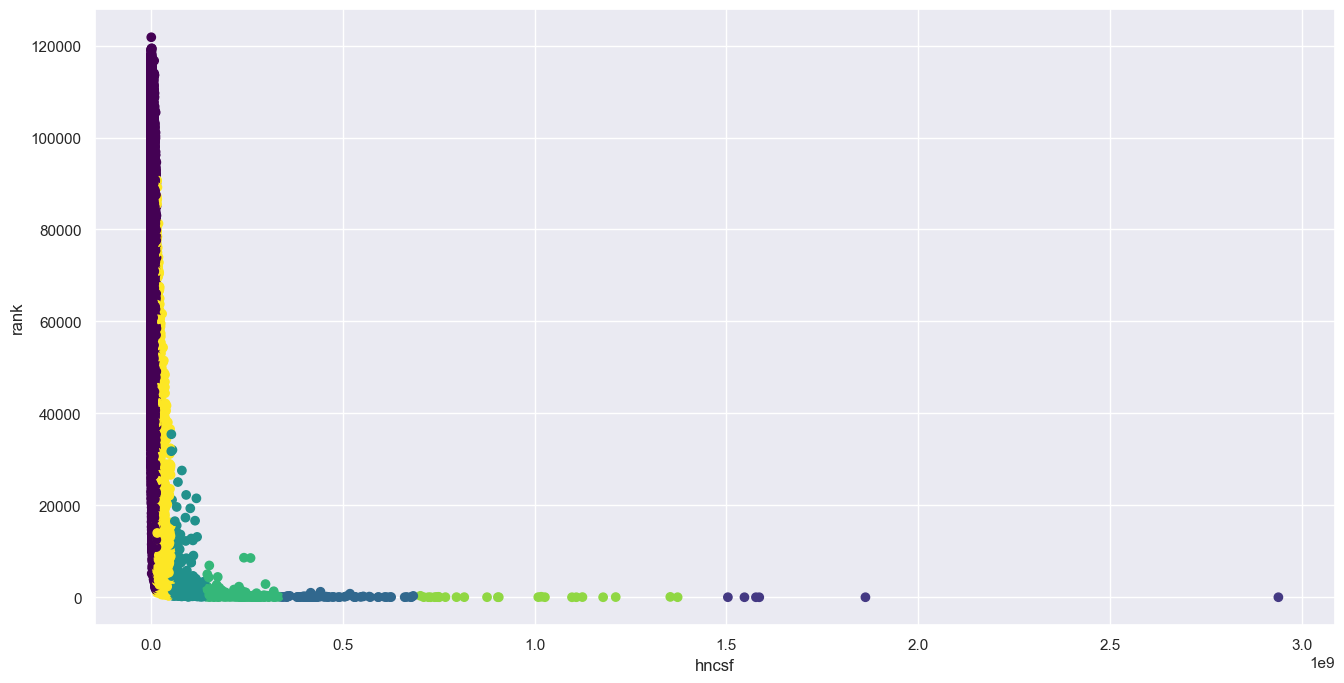

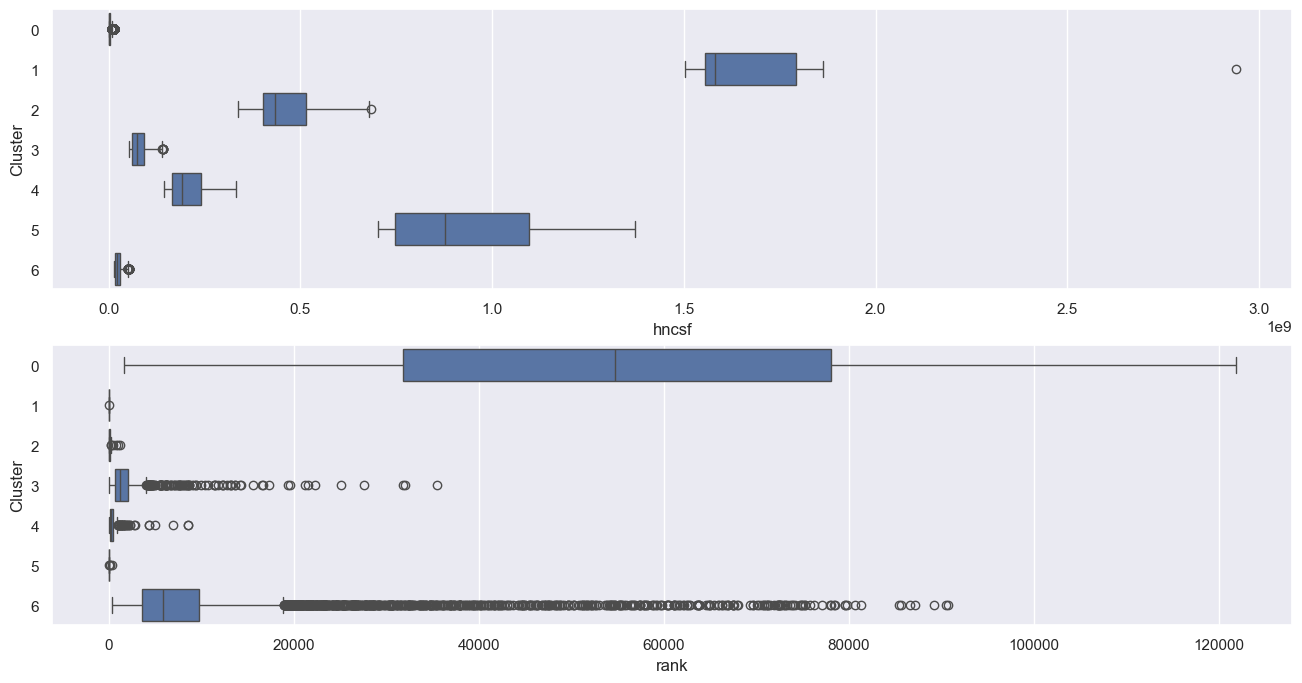

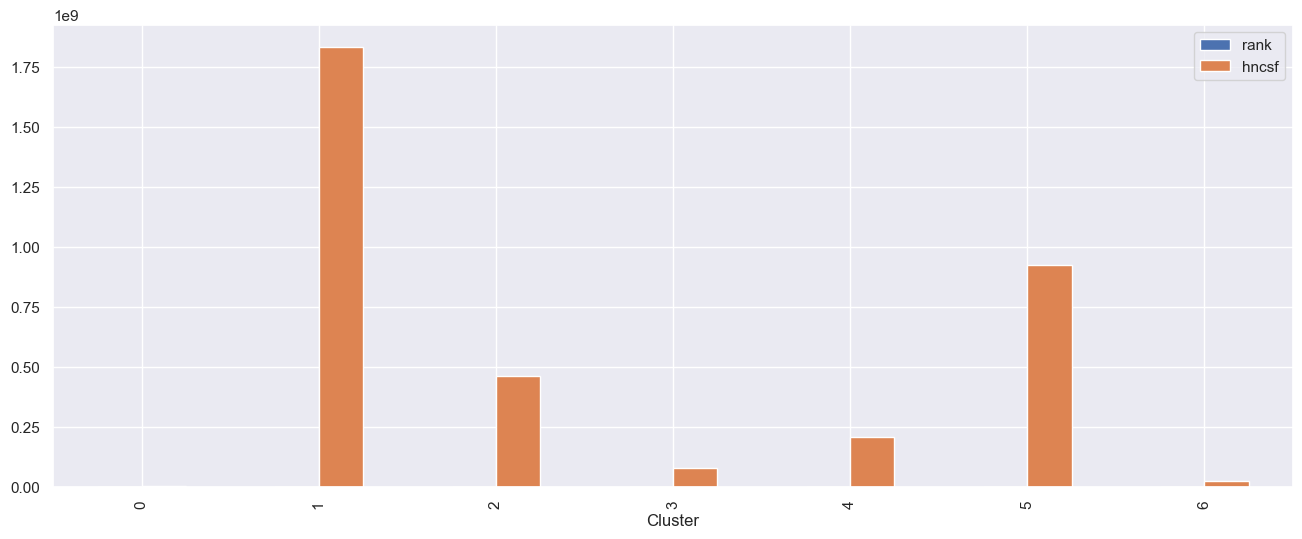

In [226]:
# Set "optimal" Number of Clusters
num_clust = 7

Bivariate_KMeans_optimal('hncsf', '\thncsf')

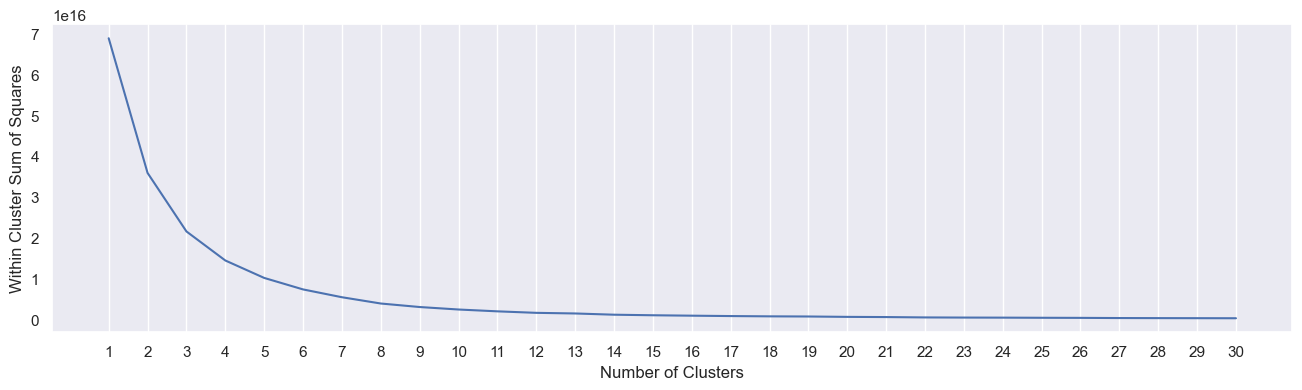

In [228]:
Bivariate_KMeans_WithinSS('hnpsfl')

Features 	hnpsfl 	rank

Cluster 0:	11563.01	1671180.83	
Cluster 1:	58424.73	131737.54	
Cluster 2:	695.92	15190923.55	
Cluster 3:	5680.15	3708013.58	
Cluster 4:	162.7	35729088.7	
Cluster 5:	25253.1	628268.9	
Cluster 6:	2733.59	7622348.26	

Within Cluster Sum of Squares : 5738745946304505.0



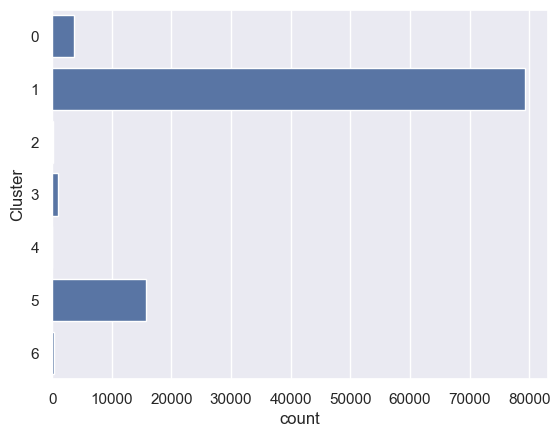

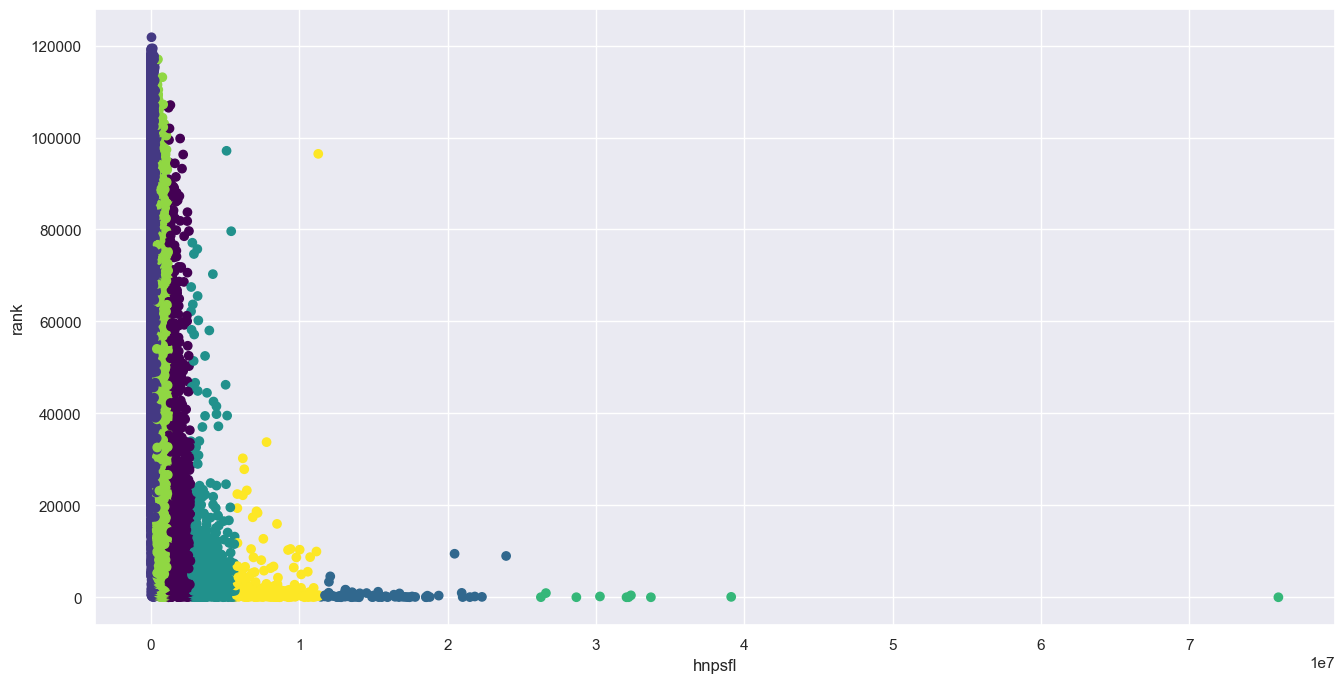

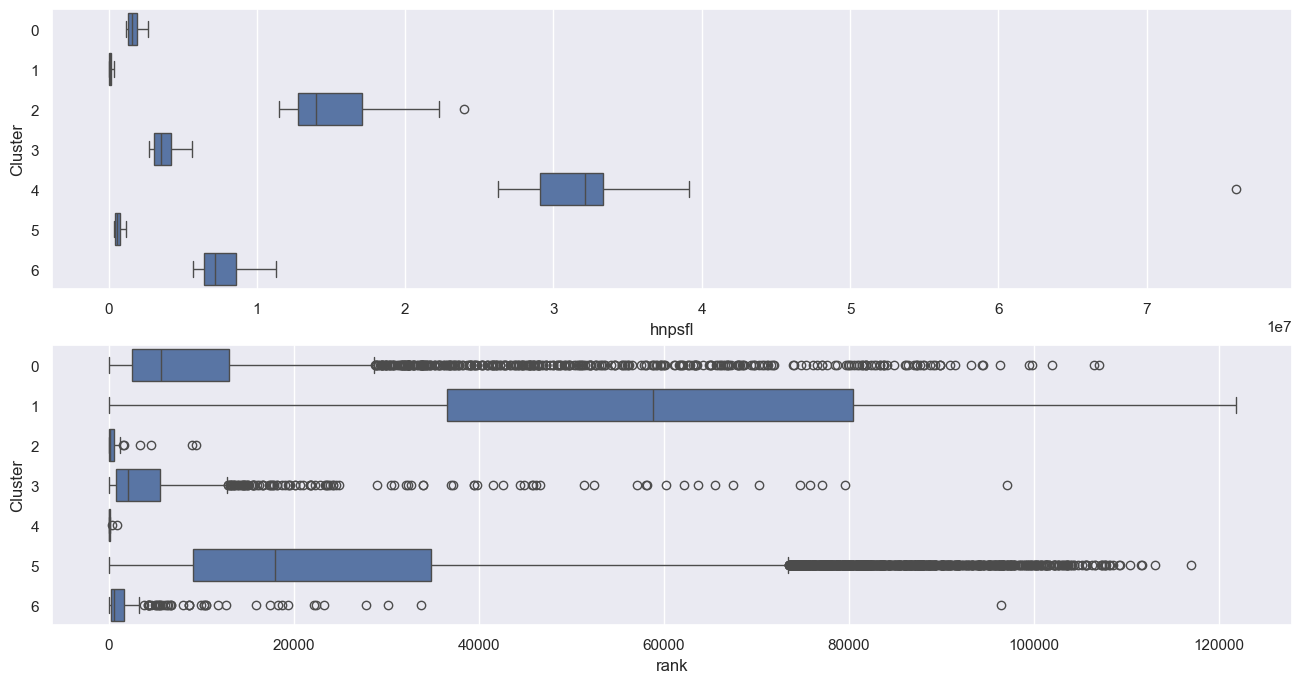

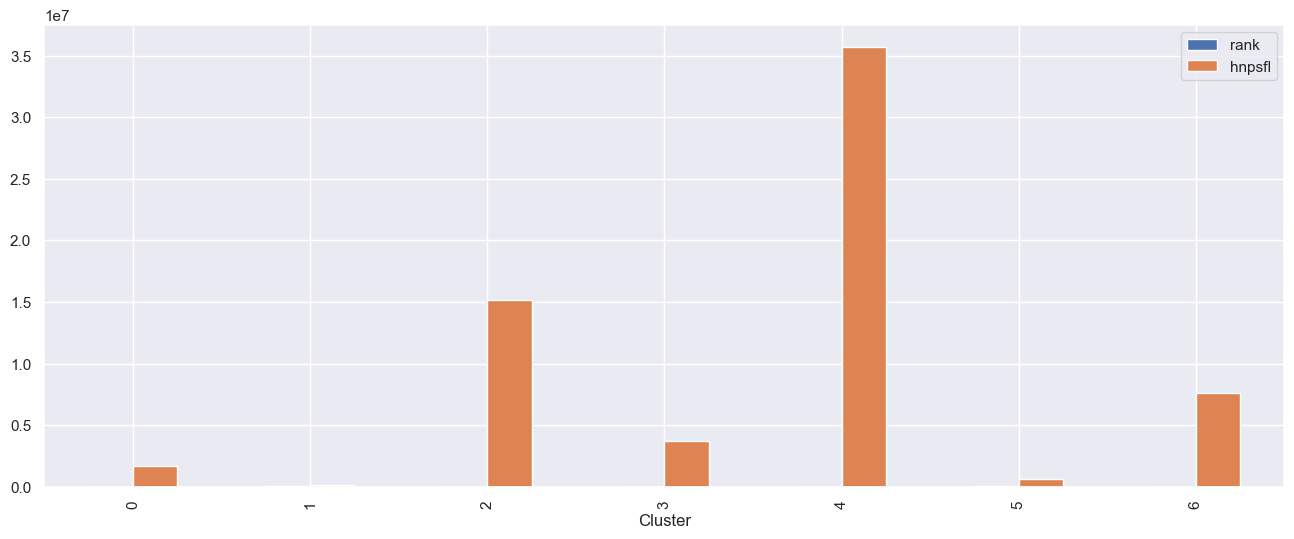

In [230]:
# Set "optimal" Number of Clusters
num_clust = 7

Bivariate_KMeans_optimal('hnpsfl', '\thnpsfl')

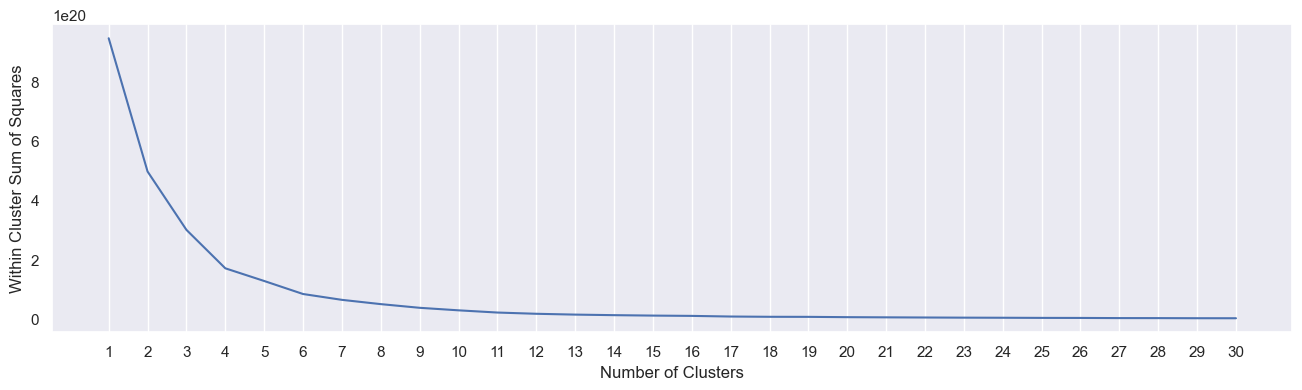

In [232]:
Bivariate_KMeans_WithinSS('hncsfl')

Features 	hncsfl 	rank

Cluster 0:	4414.71	240906470.37	
Cluster 1:	52107.28	13438574.71	
Cluster 2:	146.67	2533765627.37	
Cluster 3:	824.04	1058547657.86	
Cluster 4:	1.5	9393461387.97	
Cluster 5:	13.33	5220810527.97	

Within Cluster Sum of Squares : 1.043533133953643e+20



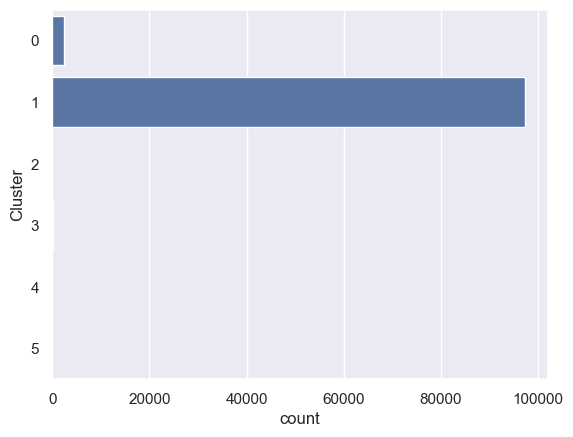

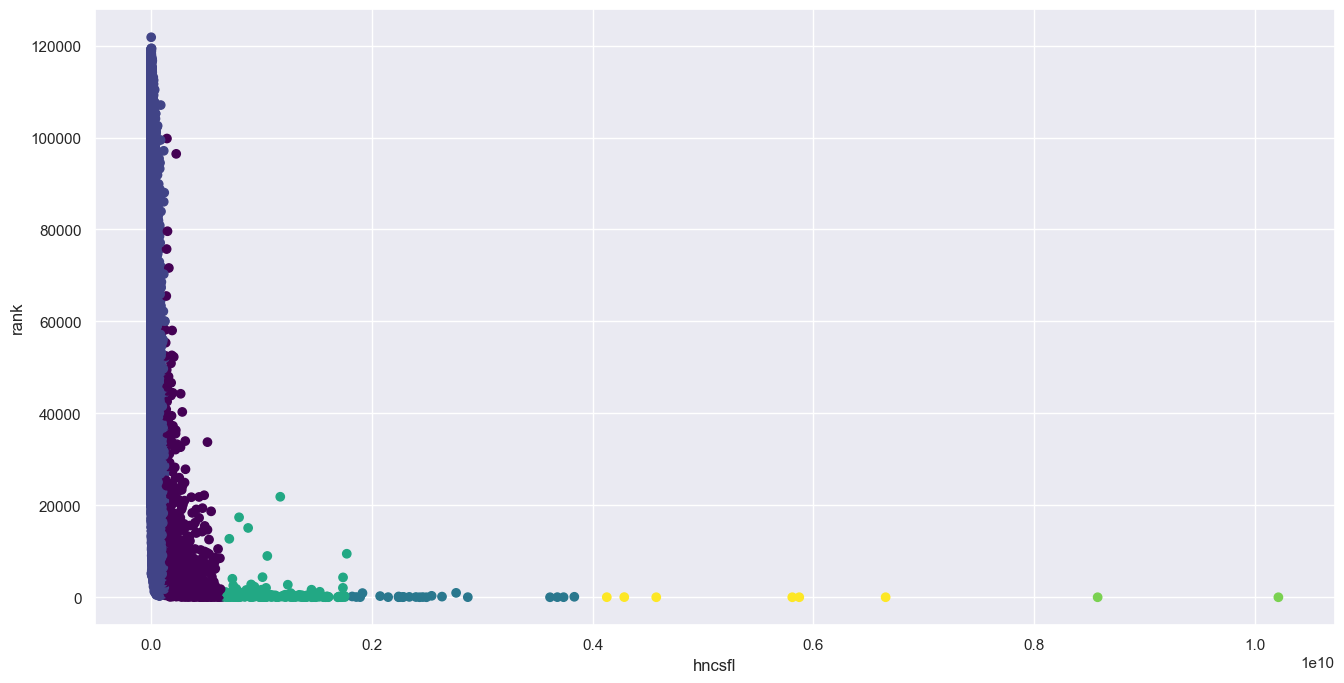

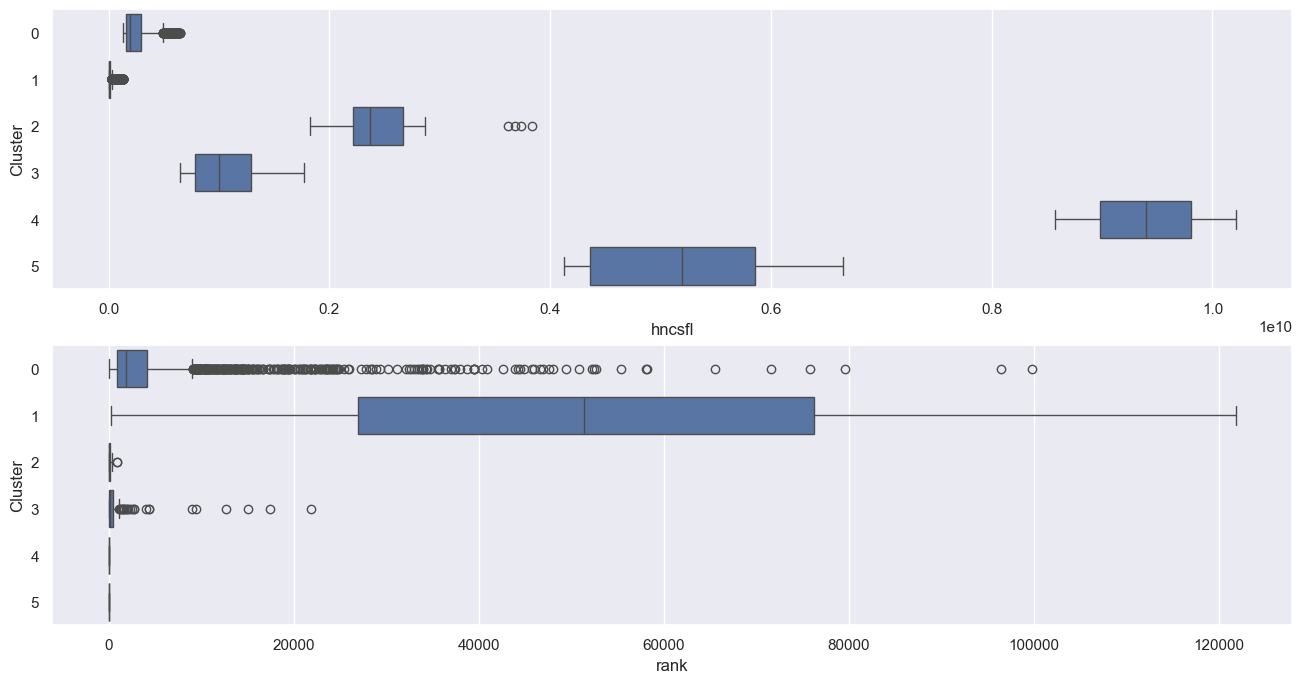

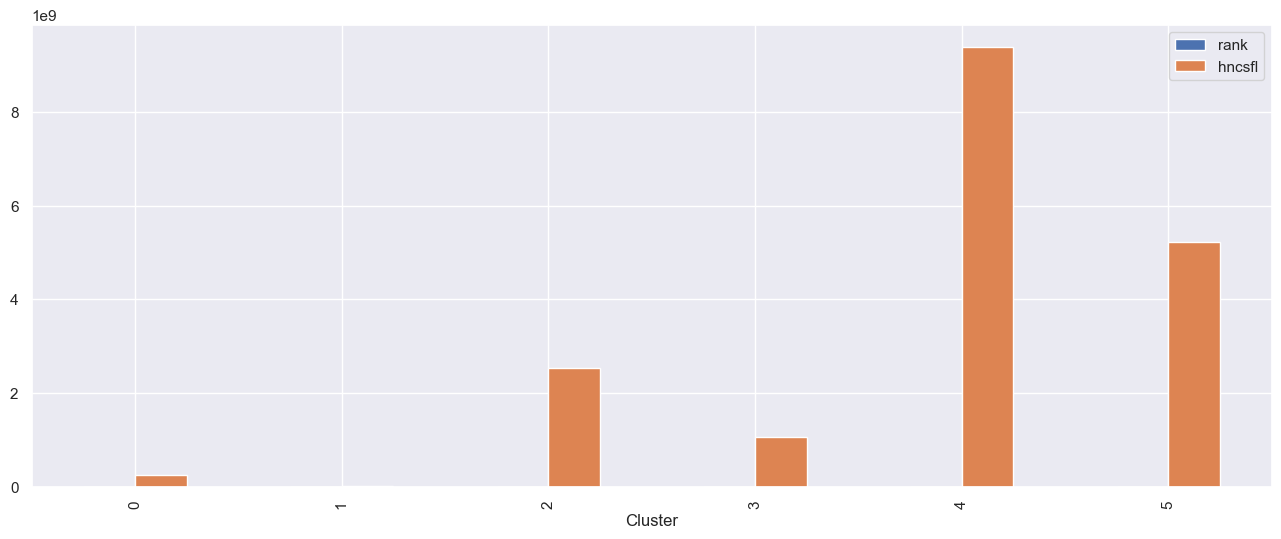

In [234]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeans_optimal('hncsfl', '\thncsfl')

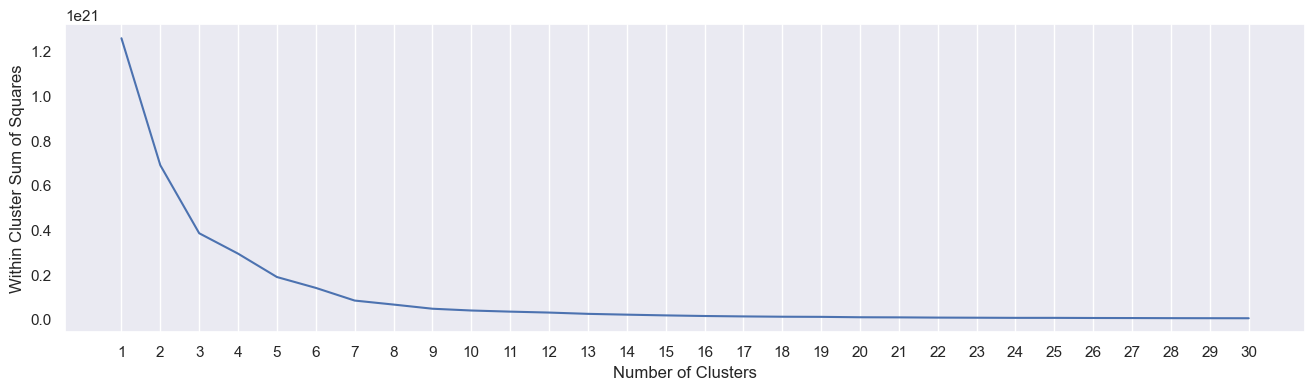

In [236]:
Bivariate_KMeans_WithinSS('hnpciting')

Features 	hnpciting 	rank

Cluster 0:	55114.26	12307985.07	
Cluster 1:	1017.46	1645351497.03	
Cluster 2:	2549.57	751807152.4	
Cluster 3:	18501.88	97061744.21	
Cluster 4:	132.32	4077937754.61	
Cluster 5:	6763.66	306310653.81	
Cluster 6:	6.0	10493519316.99	

Within Cluster Sum of Squares : 8.347528306747731e+19



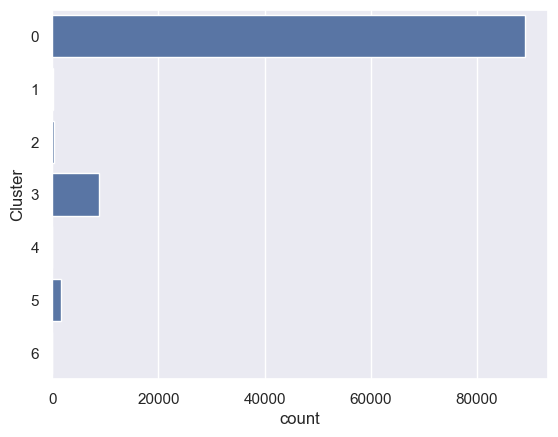

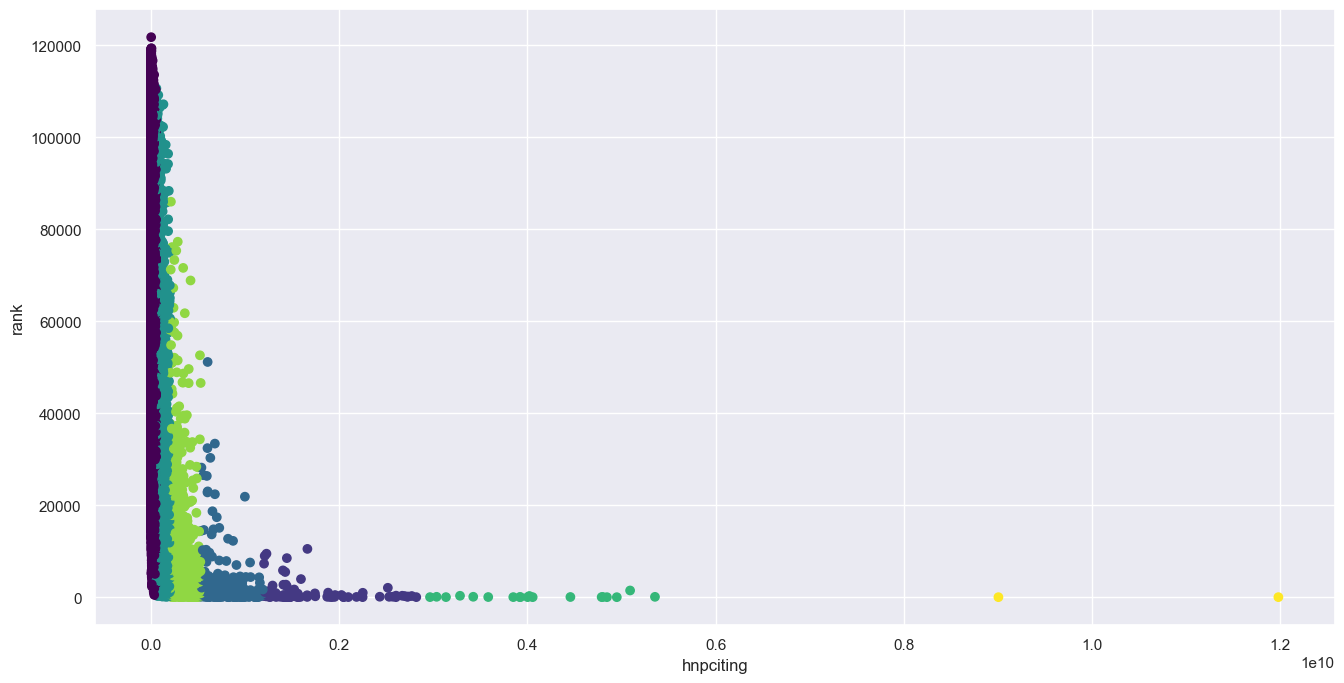

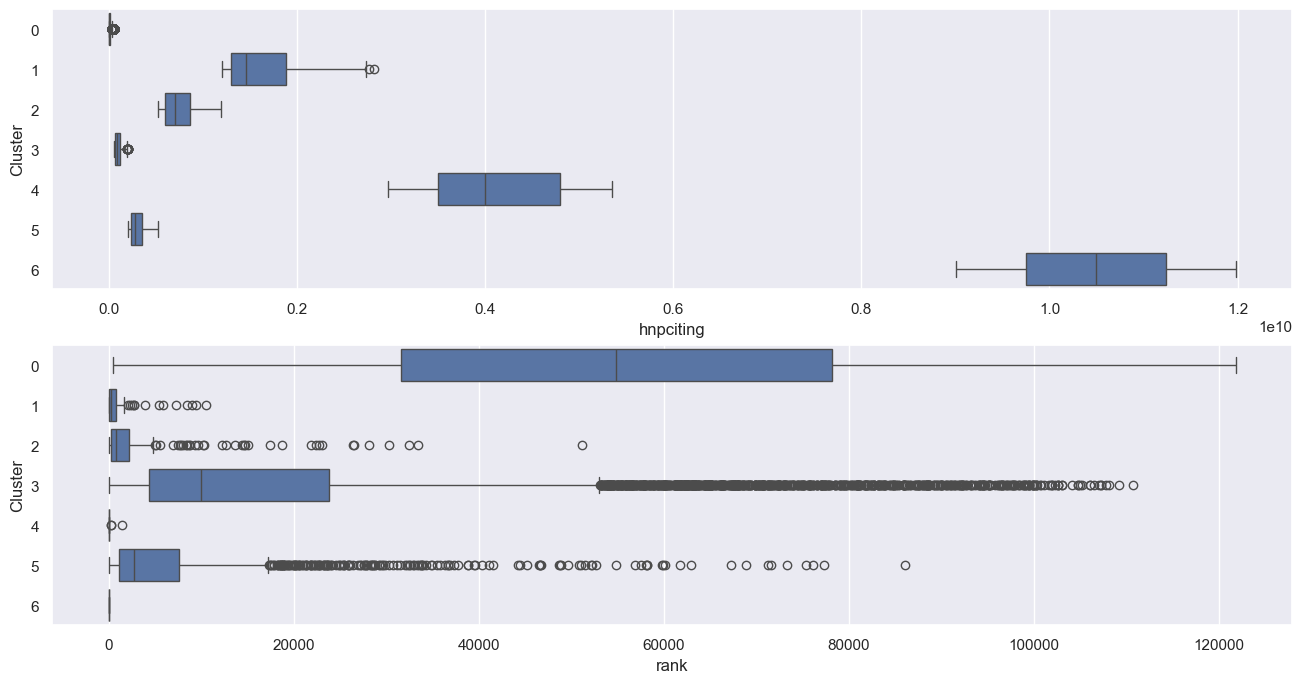

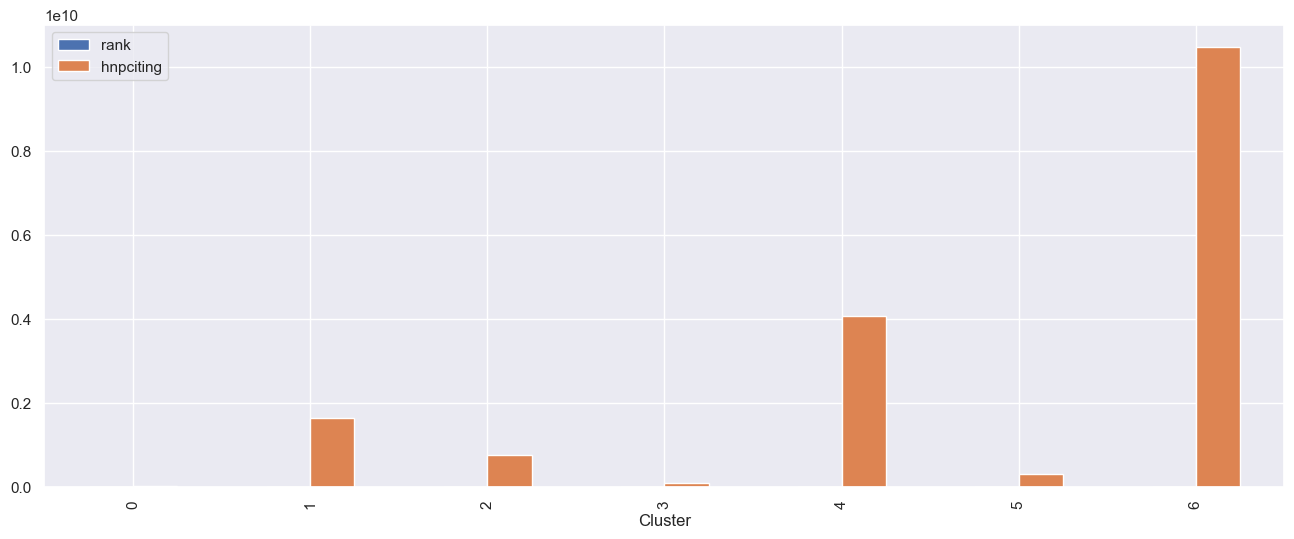

In [238]:
# Set "optimal" Number of Clusters
num_clust = 7

Bivariate_KMeans_optimal('hnpciting', '\thnpciting')

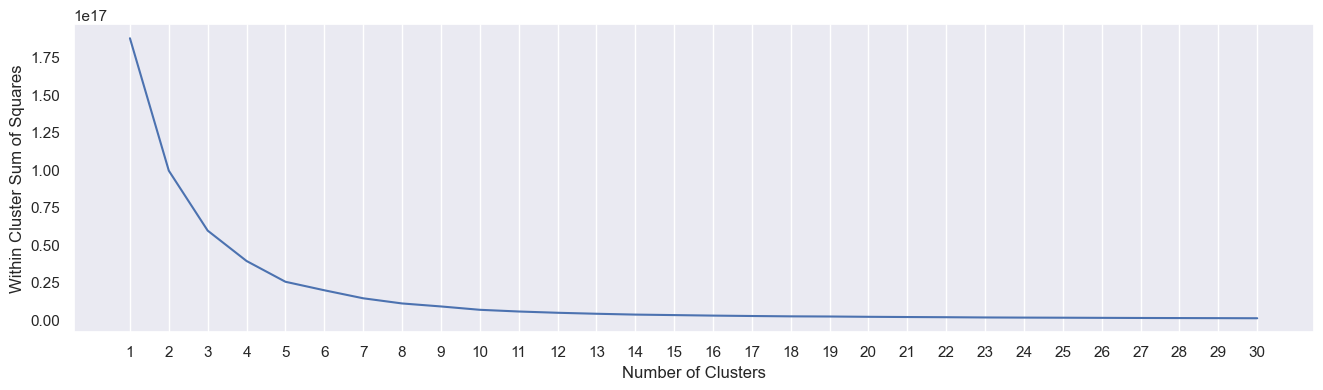

In [240]:
Bivariate_KMeans_WithinSS('hnp6023 cited9623')

Features 	hnp6023 cited9623 	rank

Cluster 0:	56464.51	236973.37	
Cluster 1:	9933.8	3997593.13	
Cluster 2:	1151.38	23074562.12	
Cluster 3:	226.88	67643431.09	
Cluster 4:	23305.88	1354272.35	
Cluster 5:	3762.05	9814466.63	

Within Cluster Sum of Squares : 1.757213962143936e+16



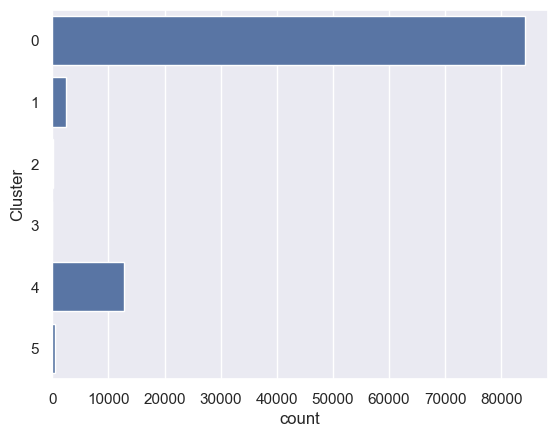

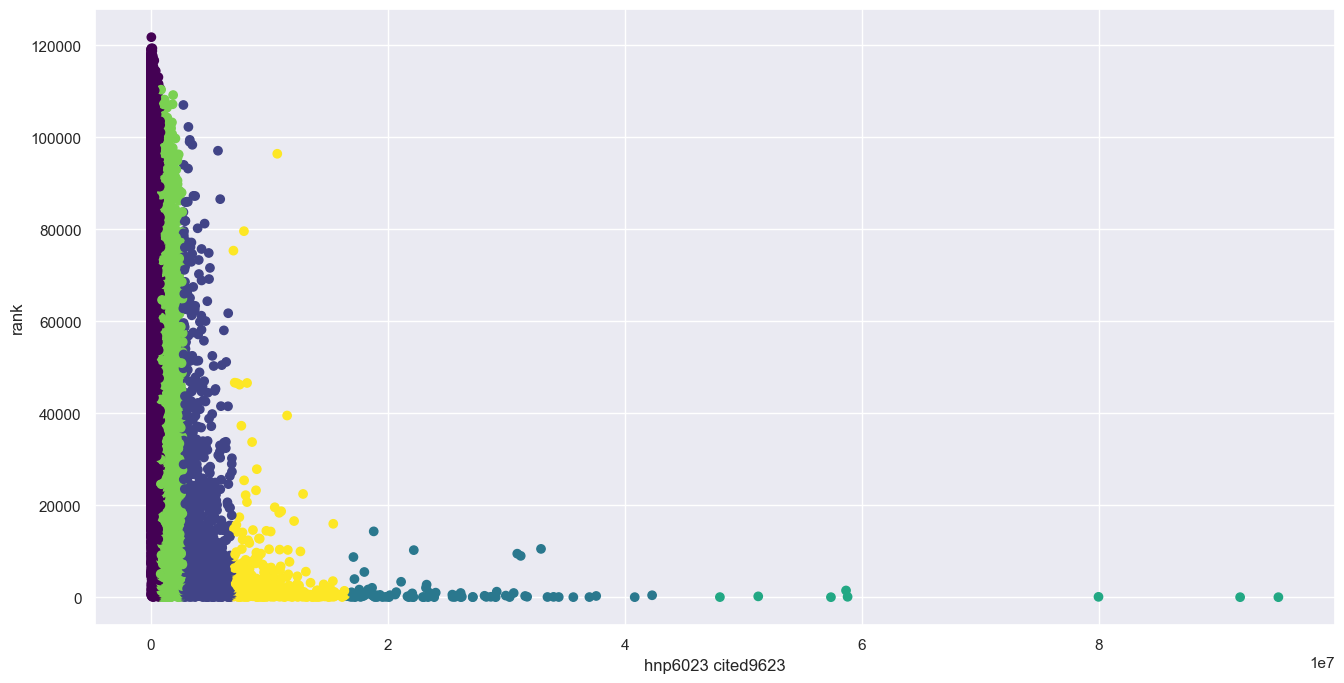

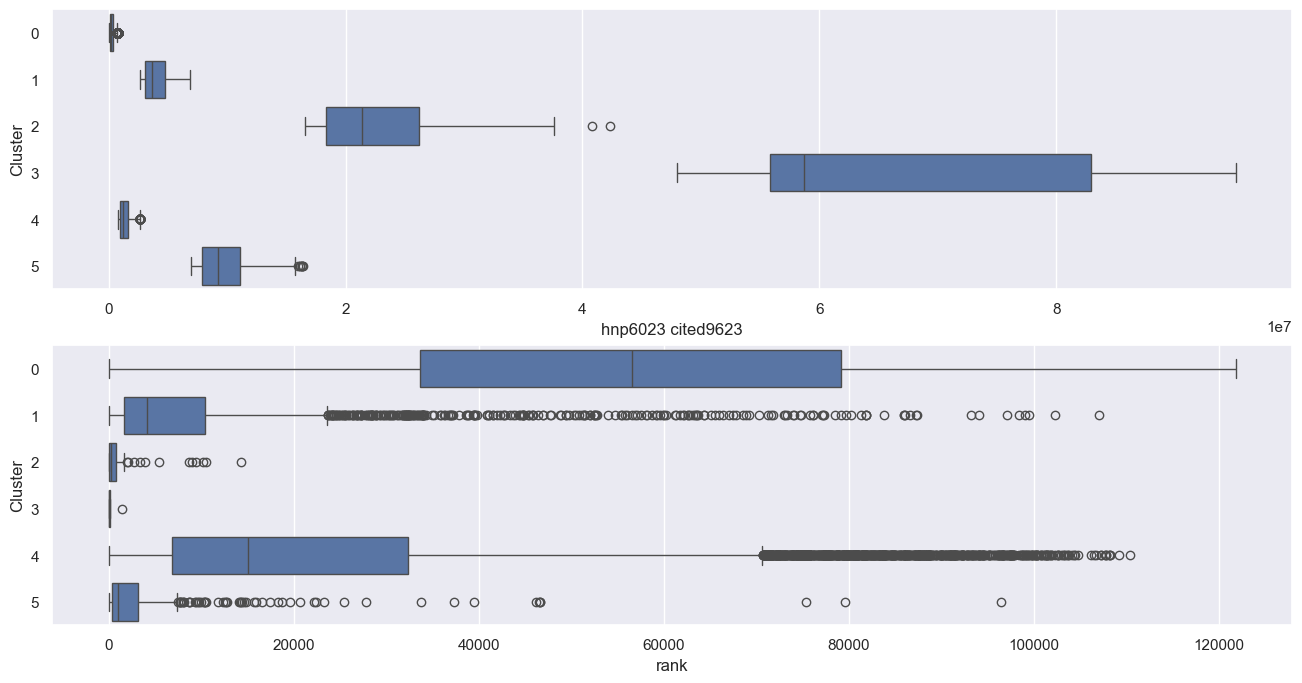

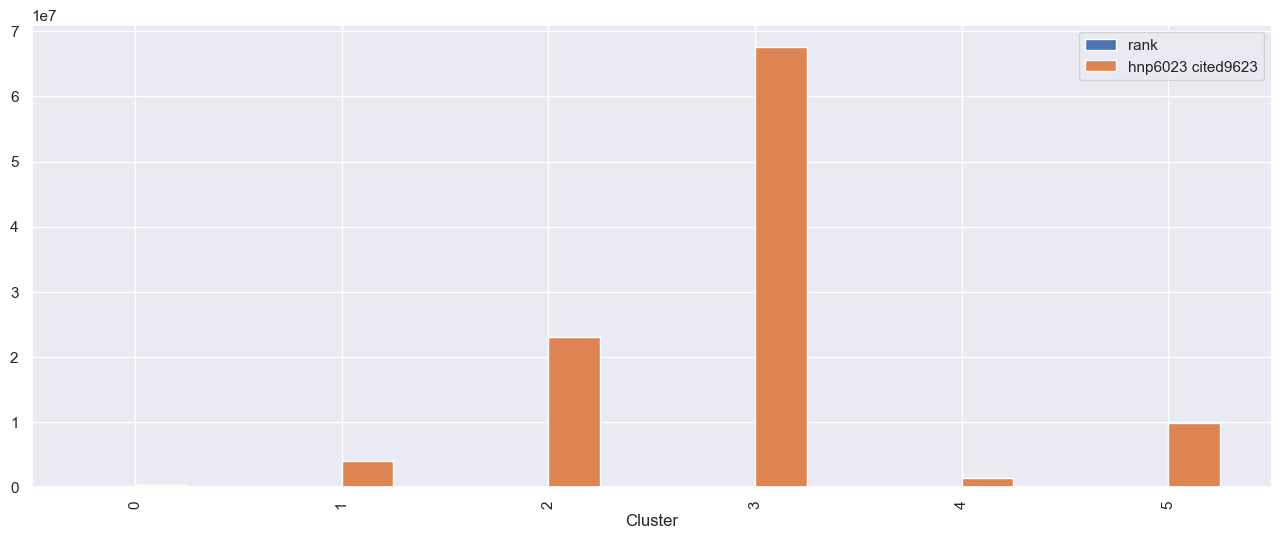

In [242]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeans_optimal('hnp6023 cited9623', '\thnp6023 cited9623')

## Bi-Variate KMeans++ Clustering (using Within Cluster Sum of Squares)

In [245]:
def Bivariate_KMeansPlus_WithinSS(a):
    # Import KMeans from sklearn.cluster
    from sklearn.cluster import KMeans
    
    # Extract the Features from our Data
    X = pd.DataFrame(sci3[['rank', a]])

    # Set the Initialization to KMeans++
    init_algo = 'k-means++'

    # Vary the Number of Clusters
    min_clust = 1
    max_clust = 30

    # Compute Within Cluster Sum of Squares
    within_ss = []
    for num_clust in range(min_clust, max_clust+1):
        kmeans = KMeans(n_clusters = num_clust,        # number of clusters
                        init = init_algo,              # initialization algorithm
                        n_init = 5)                    # number of initializations
        kmeans.fit(X)
        within_ss.append(kmeans.inertia_)

    # Plot Within SS vs Number of Clusters
    f, axes = plt.subplots(1, 1, figsize=(16,4))
    plt.plot(range(min_clust, max_clust+1), within_ss)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within Cluster Sum of Squares')
    plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
    plt.grid(which='major', axis='y')
    plt.show()

    
def Bivariate_KMeansPlus_optimal(a, b):
    # Import KMeans from sklearn.cluster
    from sklearn.cluster import KMeans

    # Extract the Features from our Data
    X = pd.DataFrame(sci3[['rank', a]])
    
    # Set the Initialization to KMeans++
    init_algo = 'k-means++'
    
    # Create Clustering Model using KMeans
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 20)

    # Fit the Clustering Model on the Data
    kmeans.fit(X)

    # Print the Cluster Centers
    print("Features", b, "\trank")
    print()

    for i, center in enumerate(kmeans.cluster_centers_):
        print("Cluster", i, end=":\t")
        for coord in center:
            print(round(coord, 2), end="\t")
        print()
    print()

    # Print the Within Cluster Sum of Squares
    print("Within Cluster Sum of Squares :", kmeans.inertia_)
    print()
        
    # Predict the Cluster Labels
    labels = kmeans.predict(X)

    # Append Labels to the Data
    X_labeled = X.copy()
    X_labeled["Cluster"] = pd.Categorical(labels)

    # Summary of the Cluster Labels
    sb.countplot(X_labeled["Cluster"])
    
    # Visualize the Clusters in the Data
    f, axes = plt.subplots(1, 1, figsize=(16,8))
    plt.xlabel(a)
    plt.ylabel('rank')
    plt.scatter(x = a, y = "rank", c = "Cluster", cmap = 'viridis', data = X_labeled)
    
    # Boxplots for the Features against the Clusters
    f, axes = plt.subplots(2, 1, figsize=(16,8))
    sb.boxplot(x = a, y = 'Cluster', data = X_labeled, ax = axes[0])
    sb.boxplot(x = 'rank', y = 'Cluster', data = X_labeled, ax = axes[1])
    
    # Average Behaviour of each Cluster
    cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
    cluster_data.plot.bar(figsize = (16,6))

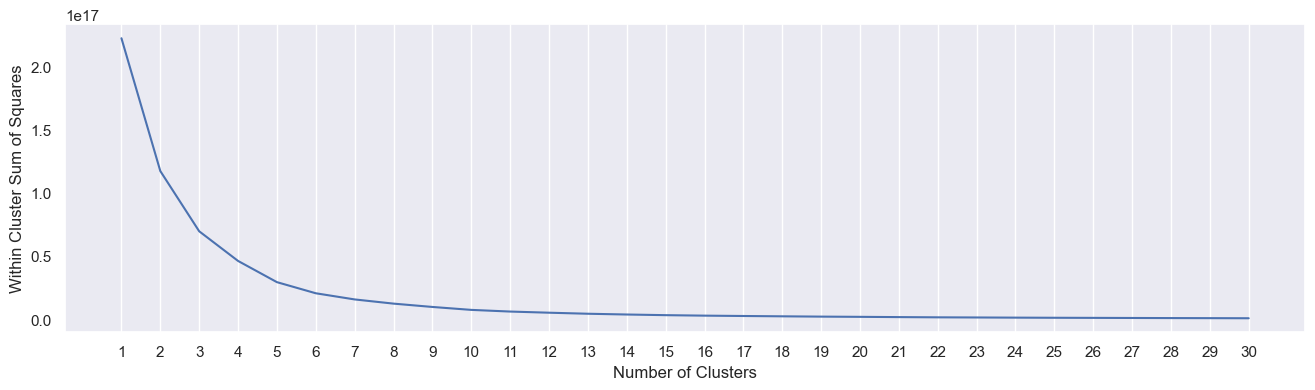

In [247]:
Bivariate_KMeansPlus_WithinSS('hnp6023')

Features 	hnp6023 	rank

Cluster 0:	56616.25	259784.5	
Cluster 1:	3908.54	10459812.9	
Cluster 2:	10098.11	4297393.16	
Cluster 3:	1113.1	24613111.37	
Cluster 4:	23872.79	1463950.92	
Cluster 5:	226.88	72825004.84	

Within Cluster Sum of Squares : 2.0574106999589856e+16



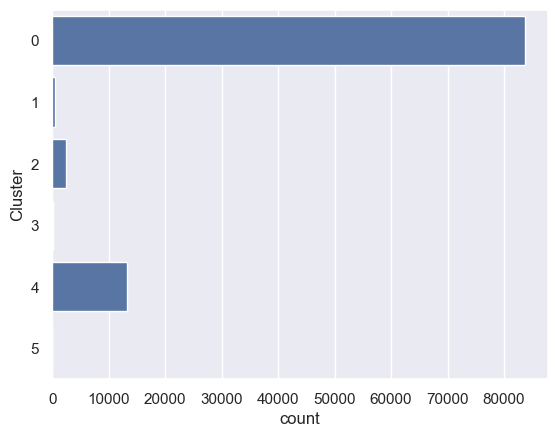

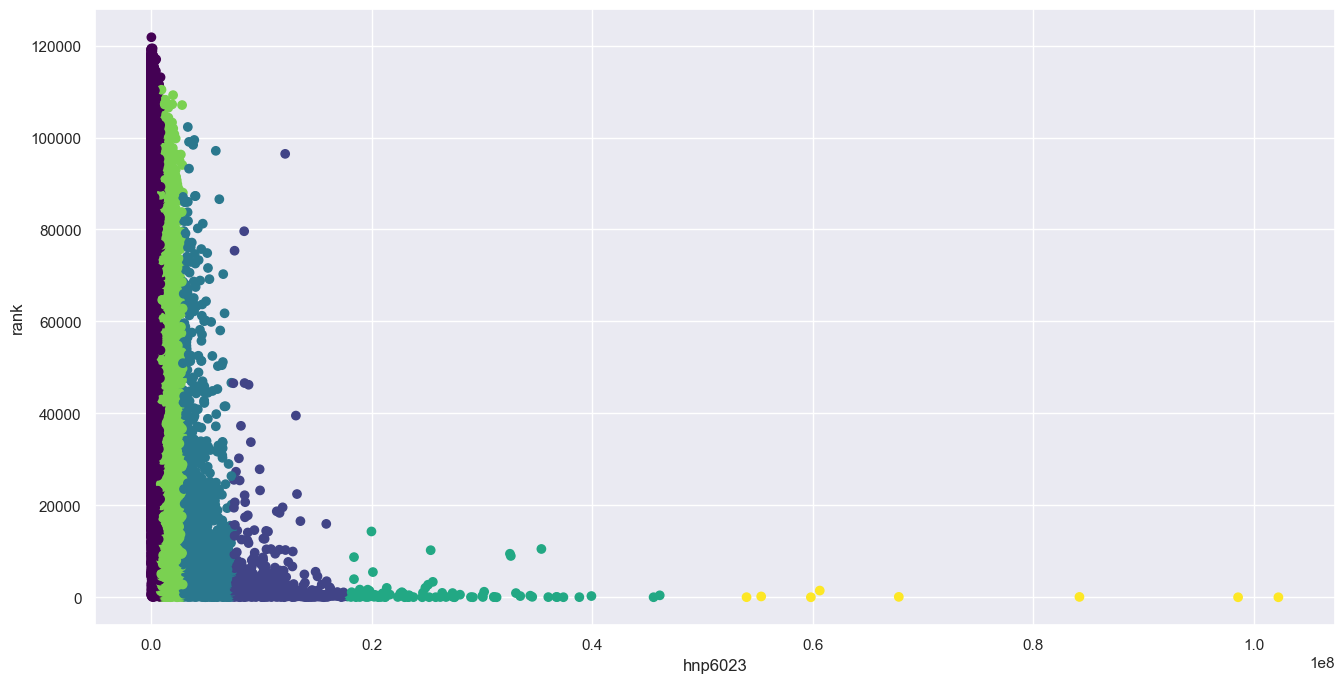

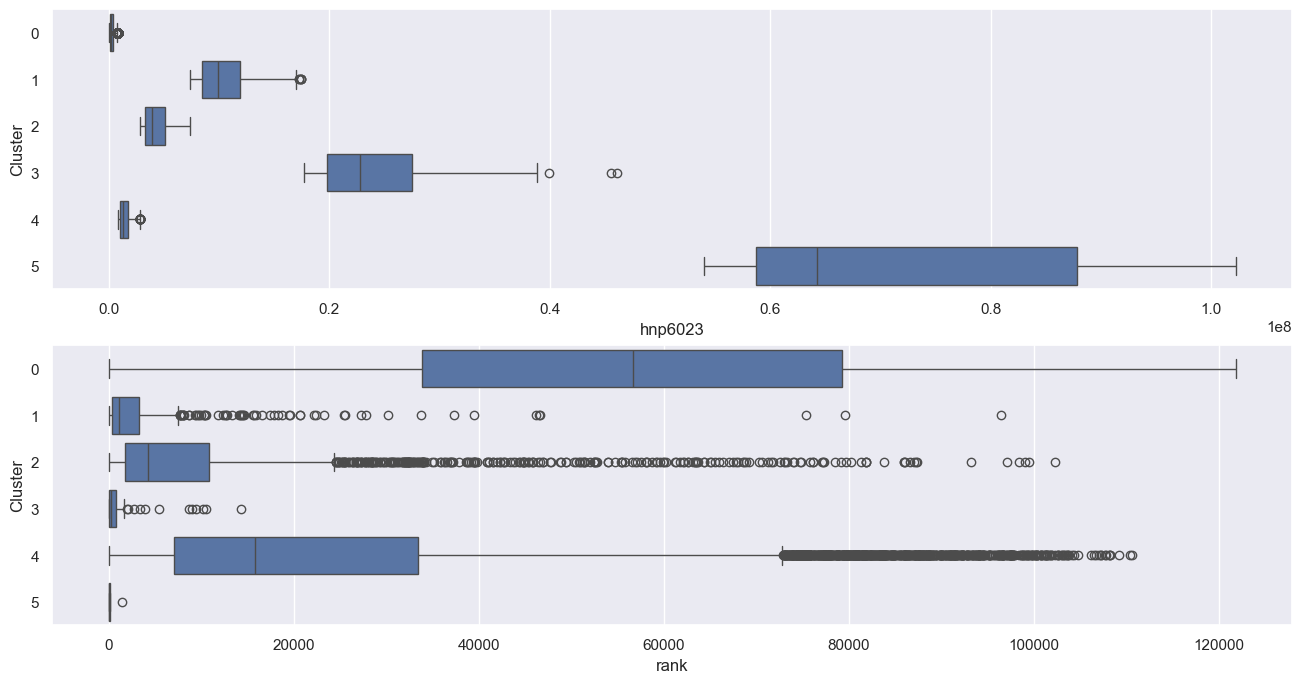

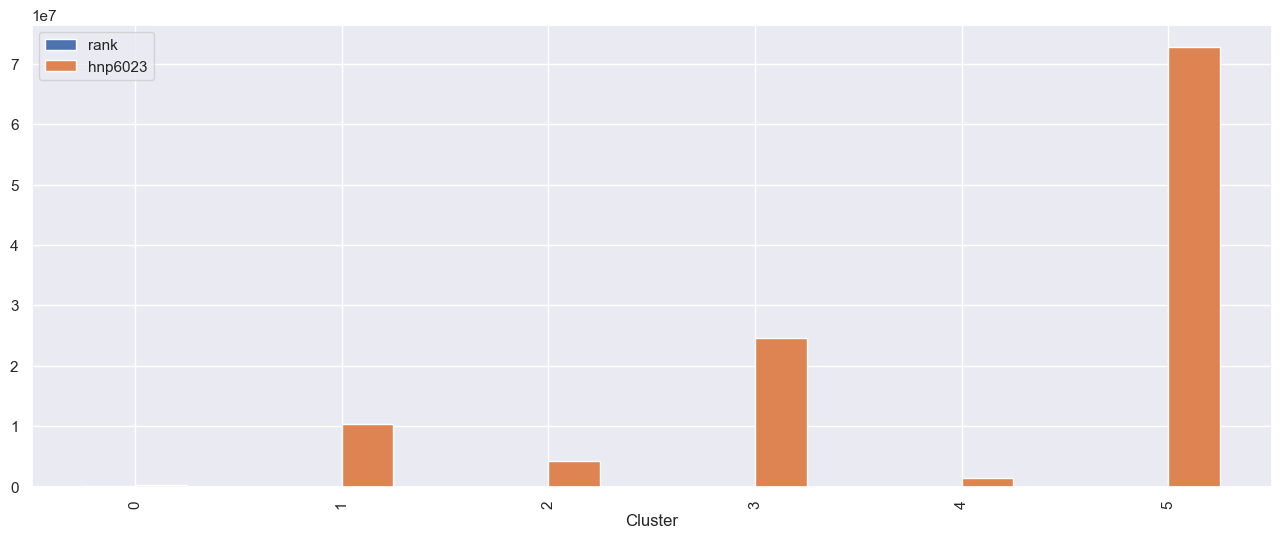

In [249]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeansPlus_optimal('hnp6023', '\thnp6023')

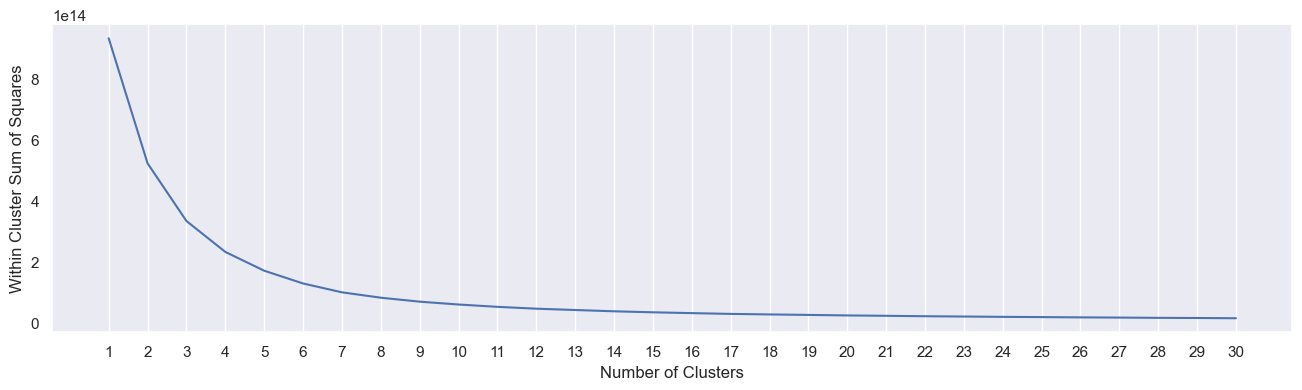

In [251]:
Bivariate_KMeansPlus_WithinSS('hhm23')

Features 	hhm23 	rank

Cluster 0:	78934.59	18082.68	
Cluster 1:	1903.9	607810.22	
Cluster 2:	16184.85	117458.87	
Cluster 3:	33934.24	39929.34	
Cluster 4:	7.22	3642109.66	
Cluster 5:	6259.03	278784.57	
Cluster 6:	473.66	1404950.22	

Within Cluster Sum of Squares : 98031744950102.22



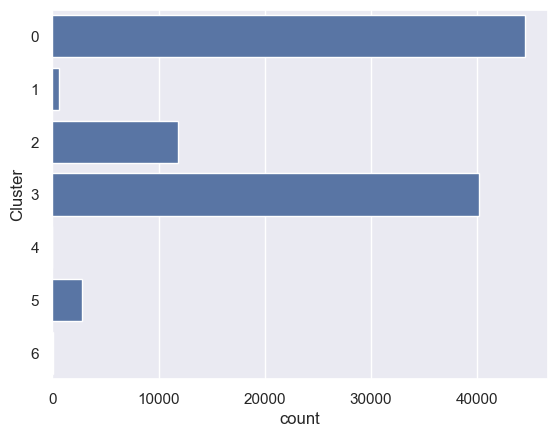

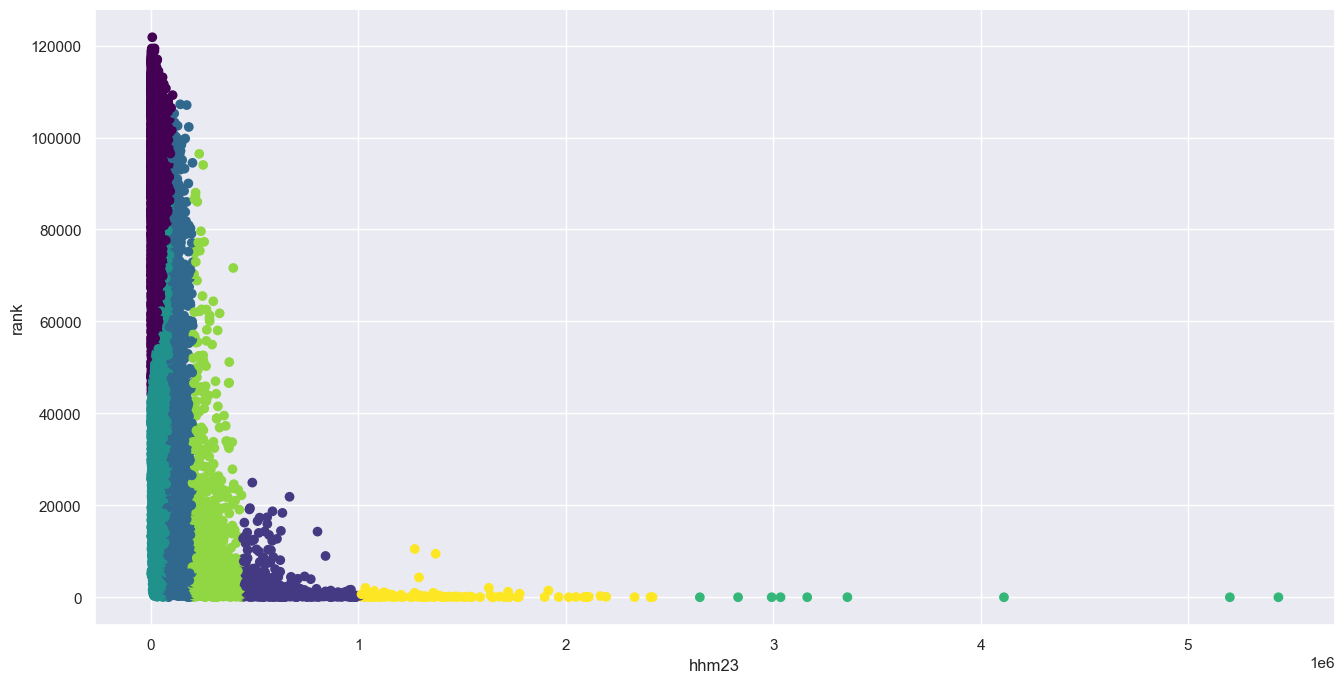

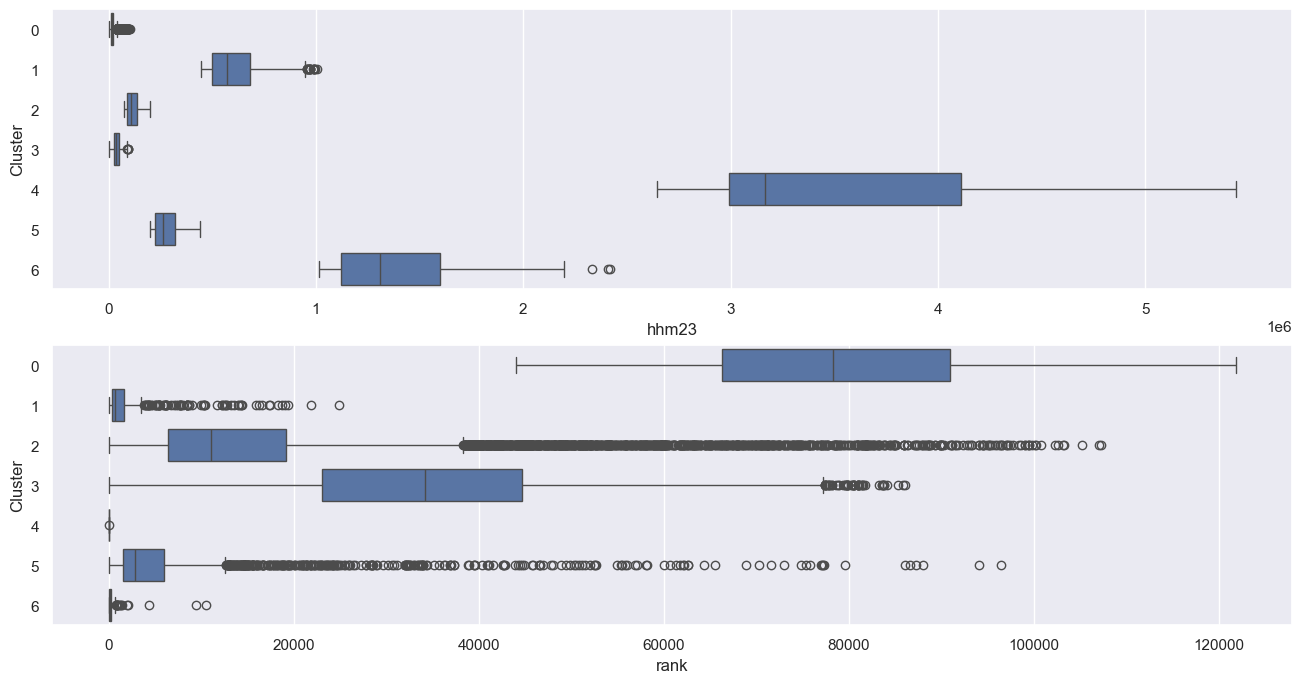

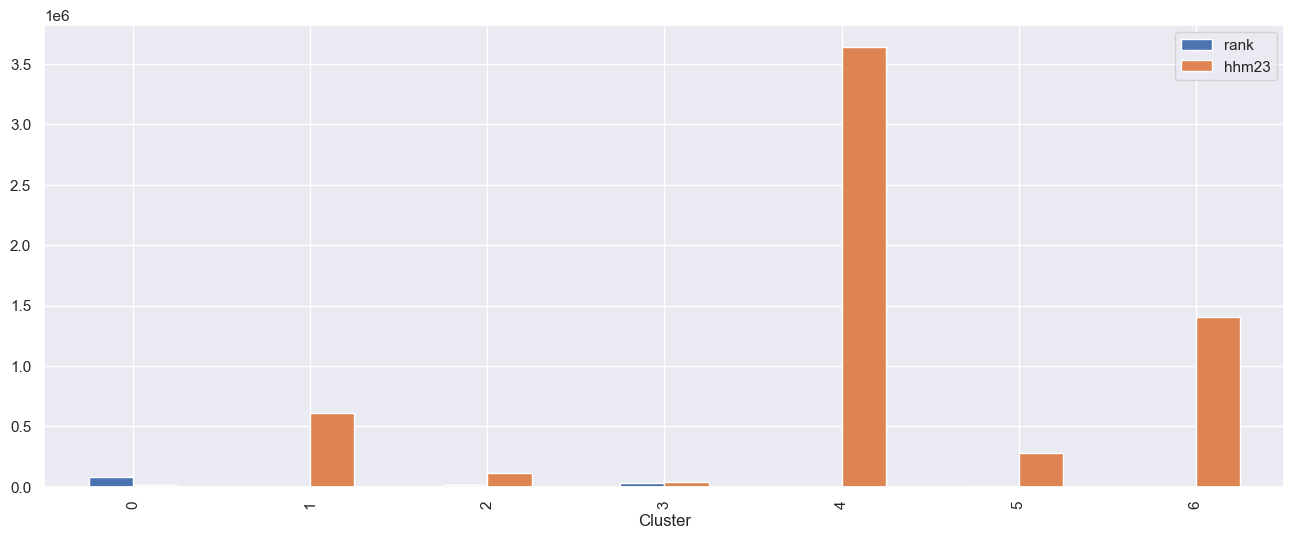

In [253]:
# Set "optimal" Number of Clusters
num_clust = 7

Bivariate_KMeansPlus_optimal('hhm23', '\thhm23')

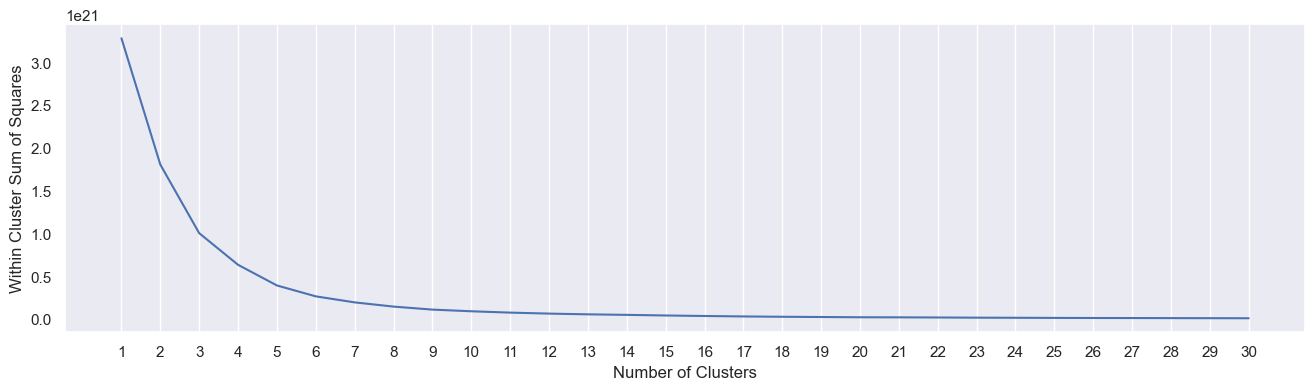

In [255]:
Bivariate_KMeansPlus_WithinSS('hnc9623')

Features 	hnc9623 	rank

Cluster 0:	53990.17	20736059.46	
Cluster 1:	1139.72	1920926235.9	
Cluster 2:	3.75	14471150895.22	
Cluster 3:	13222.02	208161259.65	
Cluster 4:	4525.17	705806085.87	
Cluster 5:	187.41	5444847361.37	

Within Cluster Sum of Squares : 2.642907484514913e+20



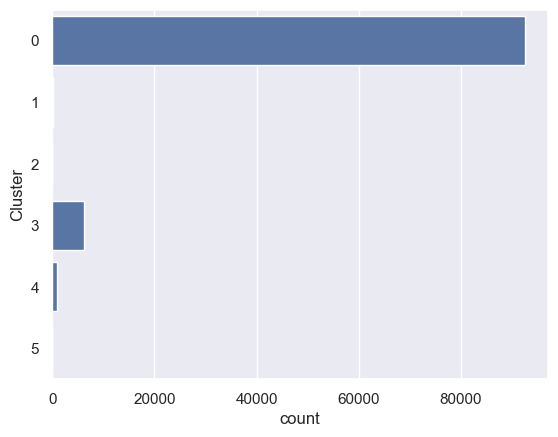

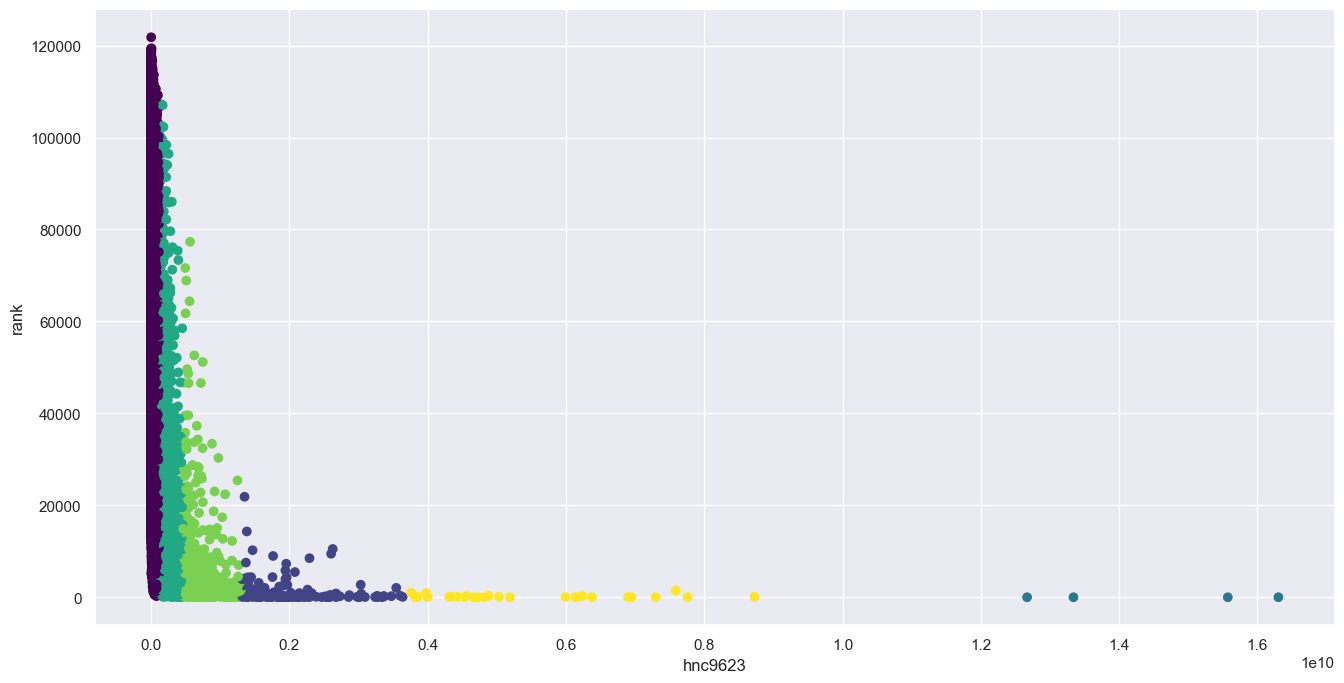

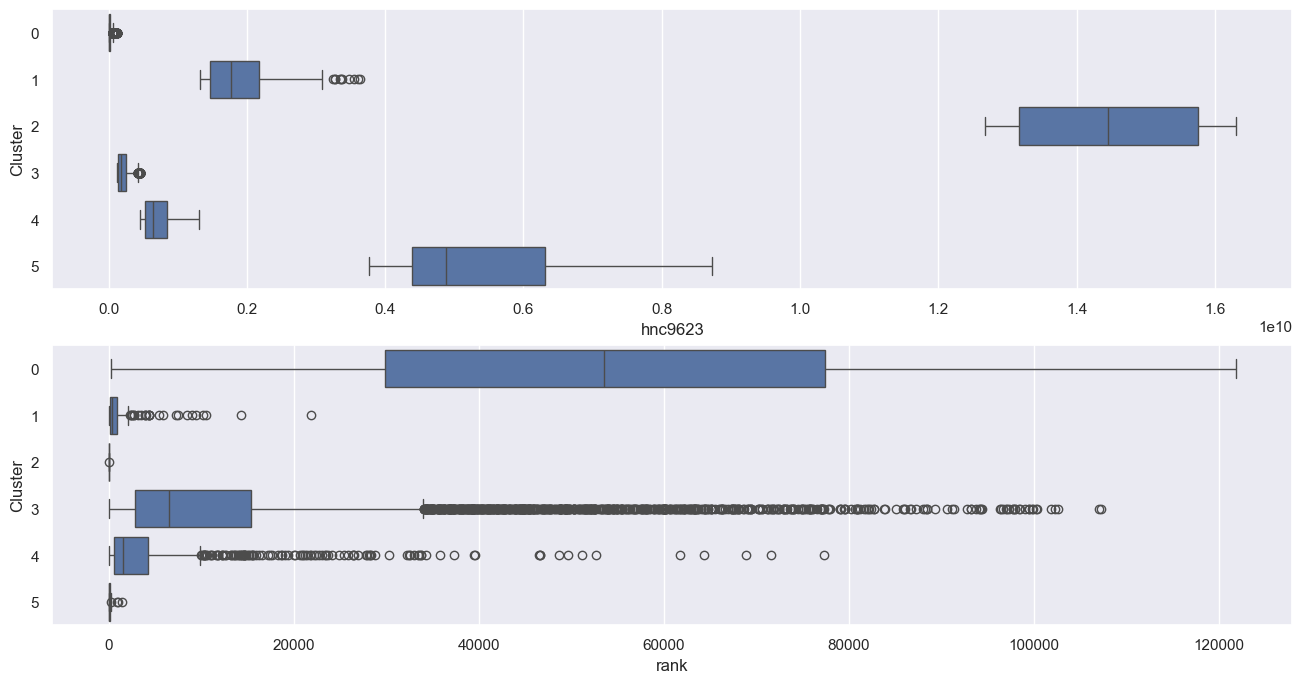

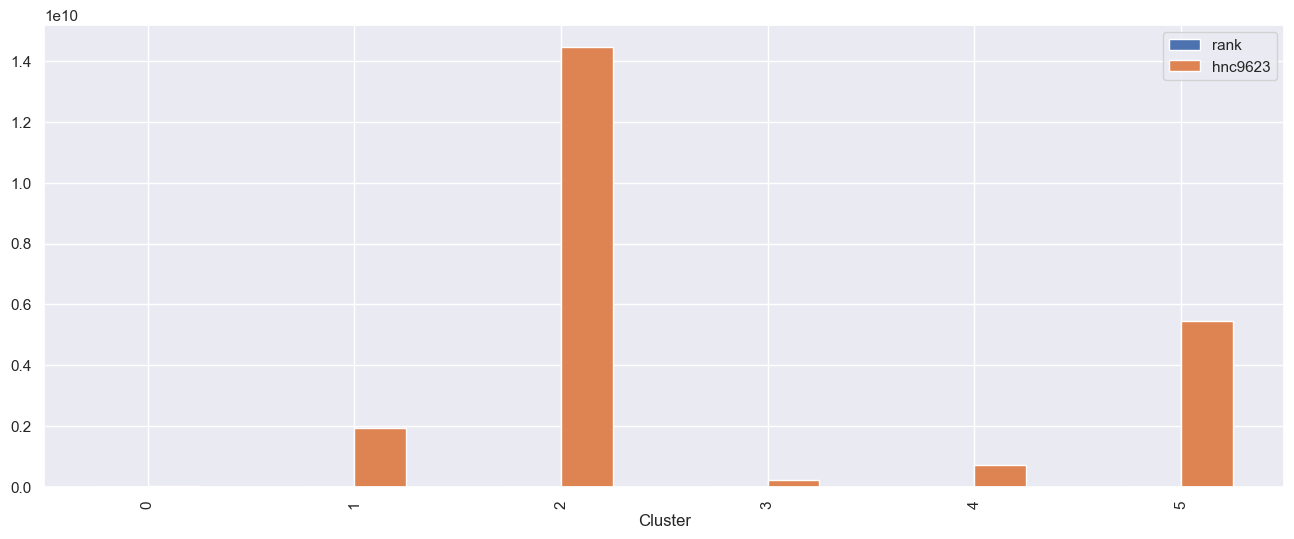

In [257]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeansPlus_optimal('hnc9623', '\thnc9623')

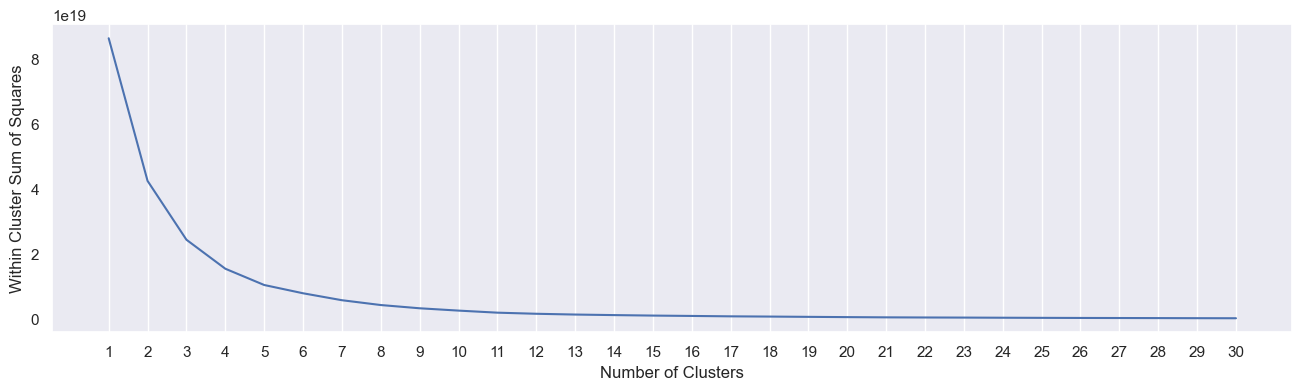

In [259]:
Bivariate_KMeansPlus_WithinSS('hncsf')

Features 	hncsf 	rank

Cluster 0:	6531.77	34145240.73	
Cluster 1:	348.32	320545390.64	
Cluster 2:	54066.03	3716888.18	
Cluster 3:	15.12	1717711289.42	
Cluster 4:	1275.27	116474363.57	
Cluster 5:	48.39	794440559.46	

Within Cluster Sum of Squares : 7.892680915114742e+18



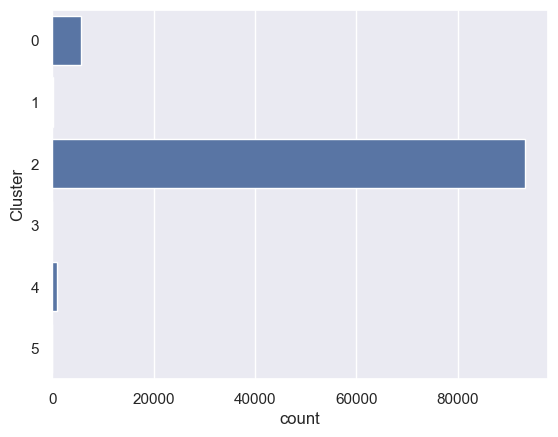

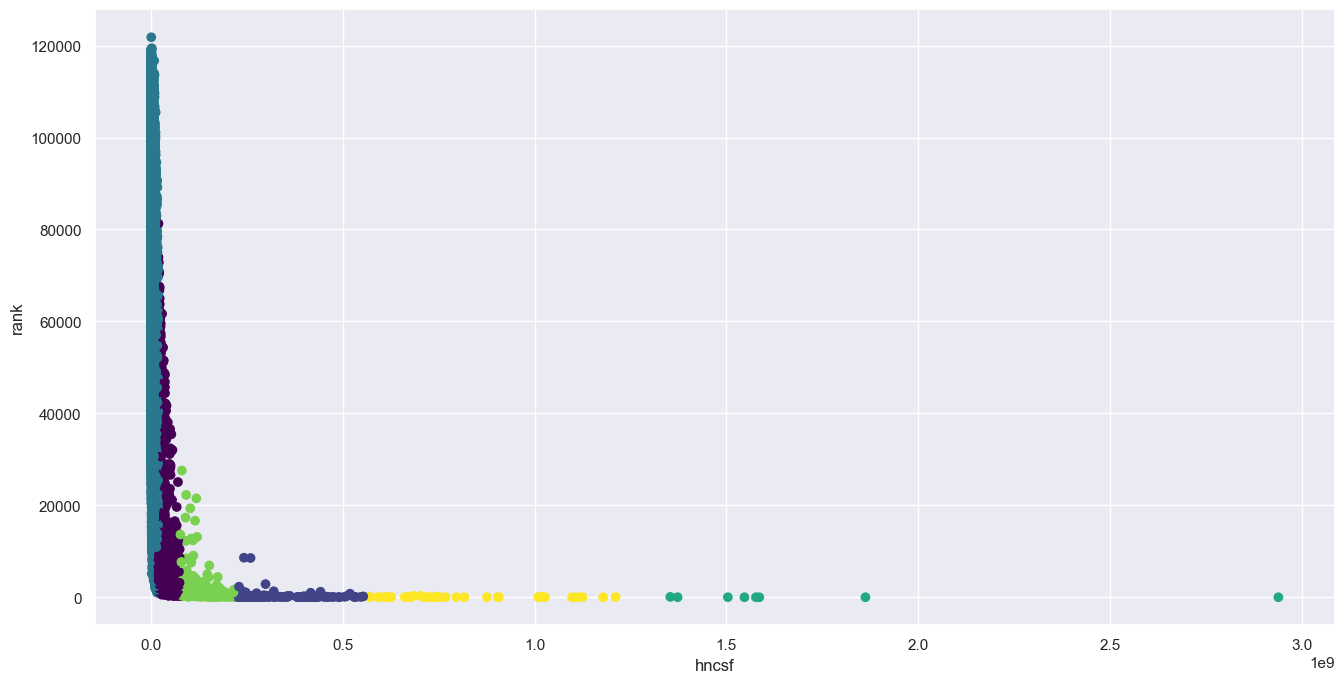

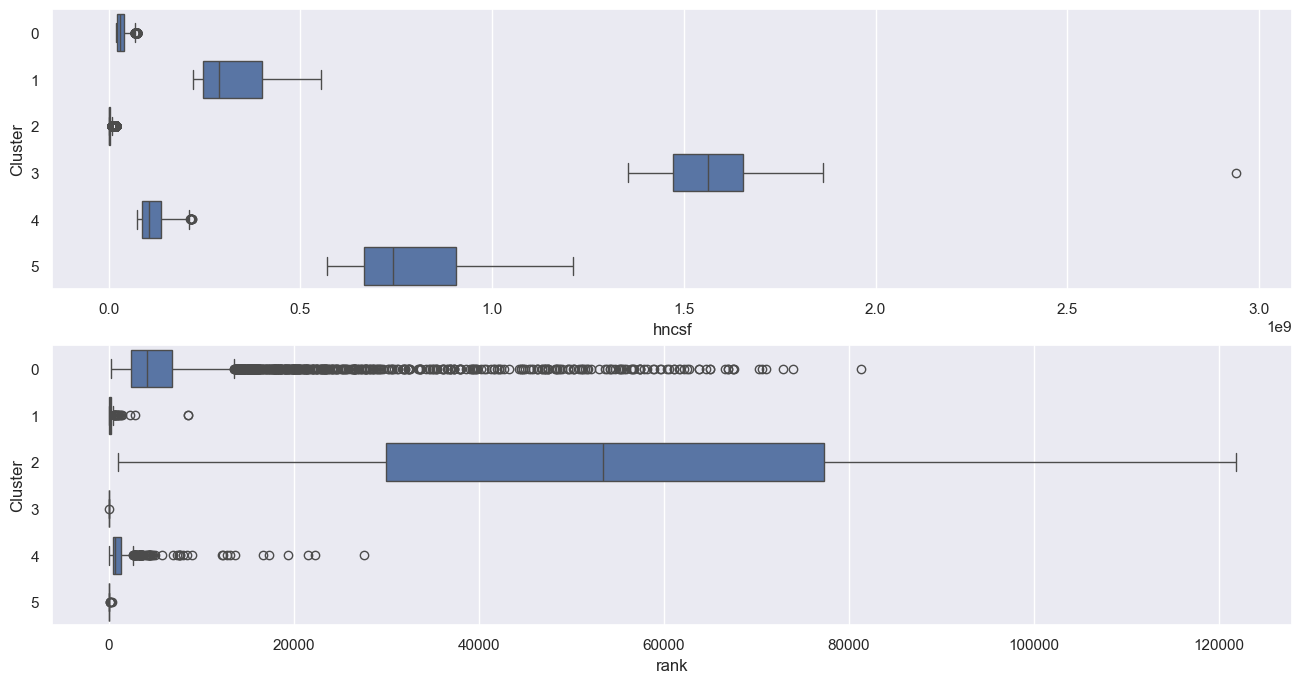

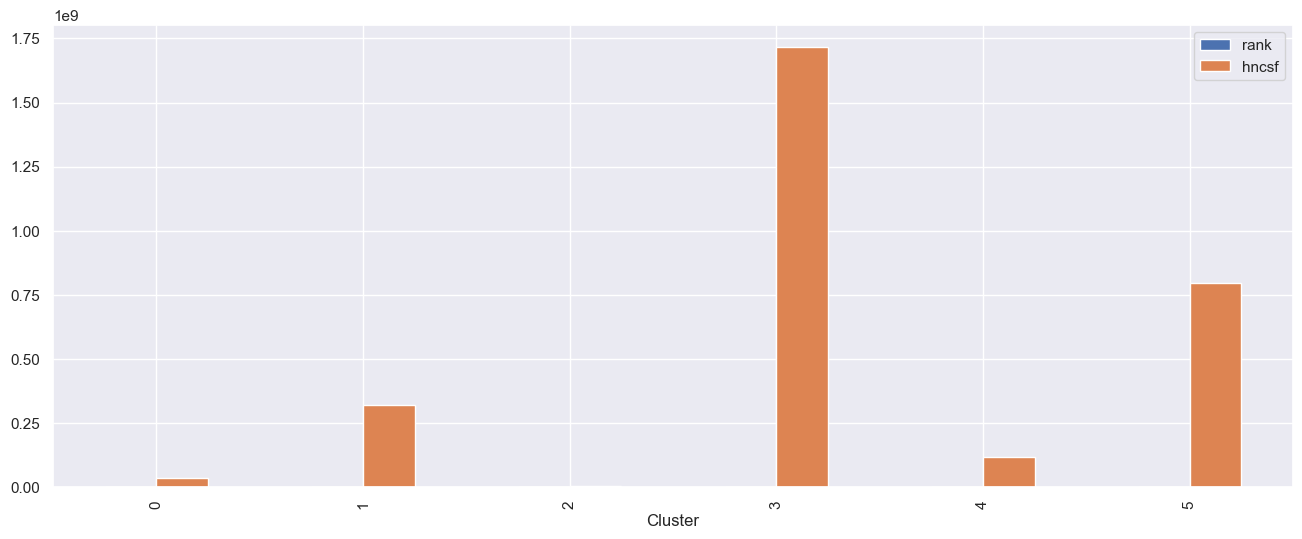

In [261]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeansPlus_optimal('hncsf', '\thncsf')

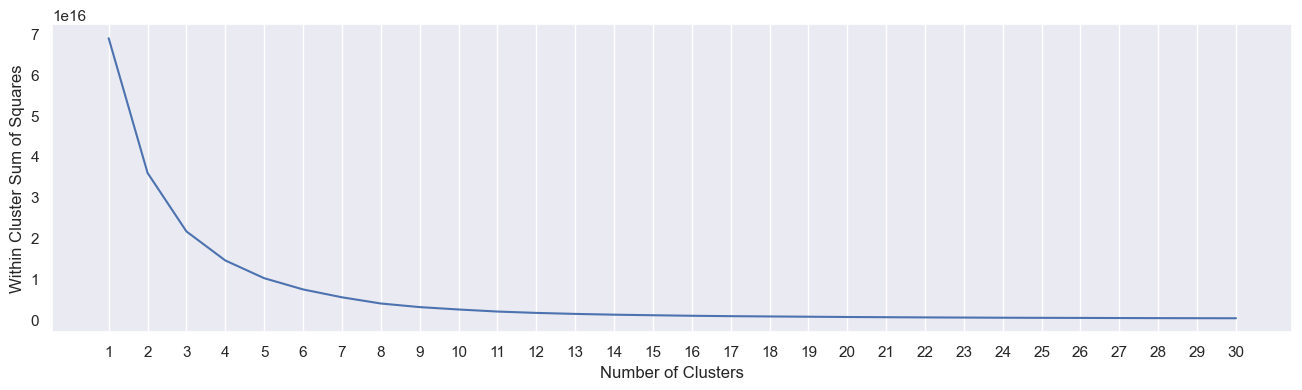

In [263]:
Bivariate_KMeansPlus_WithinSS('hnpsfl')

Features 	hnpsfl 	rank

Cluster 0:	56693.44	150841.13	
Cluster 1:	3584.99	6276576.15	
Cluster 2:	7833.22	2530851.82	
Cluster 3:	20689.54	842593.9	
Cluster 4:	162.7	35729088.7	
Cluster 5:	2019.19	14176722.29	

Within Cluster Sum of Squares : 7339949943321755.0



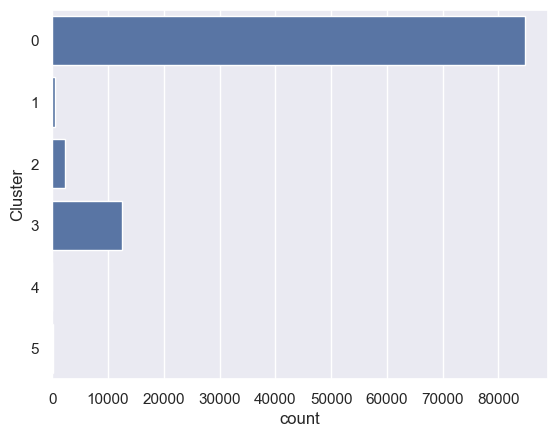

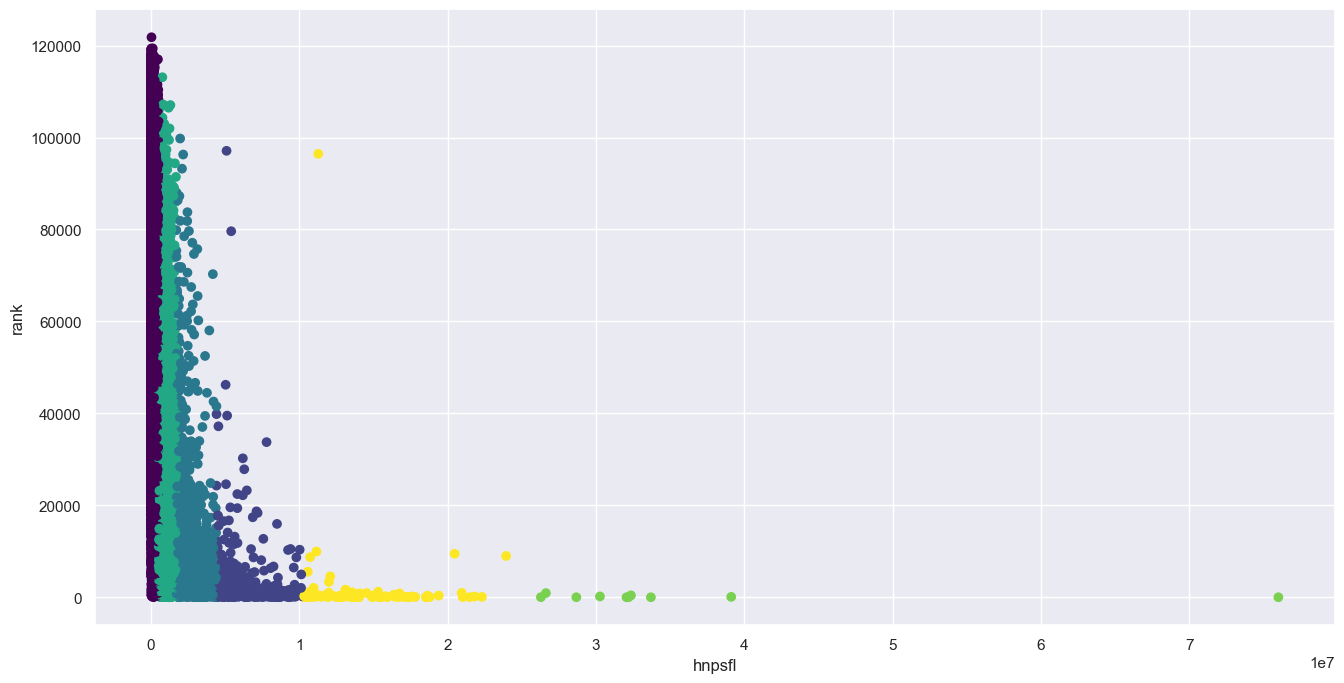

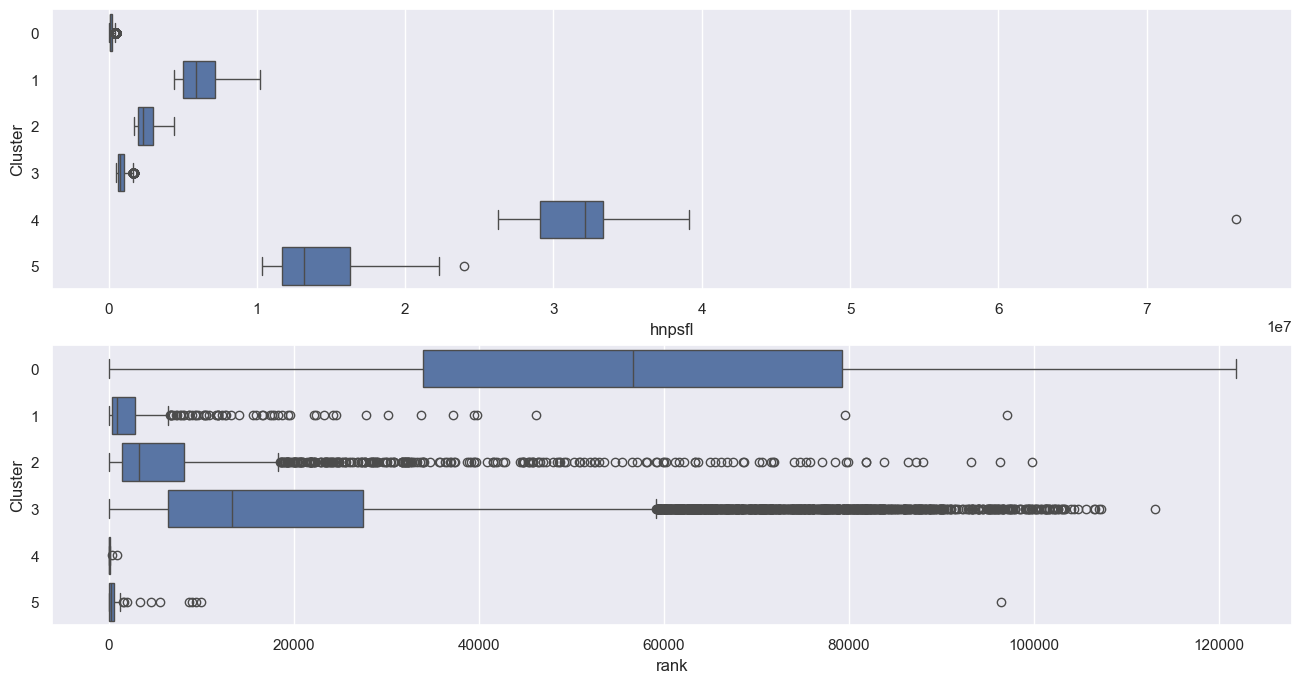

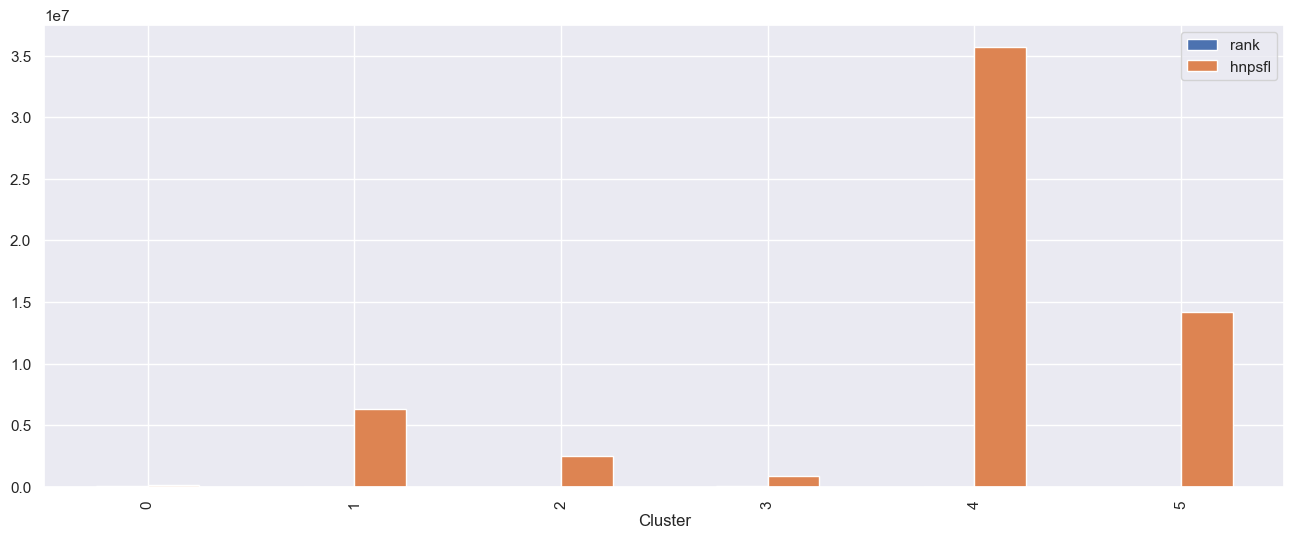

In [265]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeansPlus_optimal('hnpsfl', '\thnpsfl')

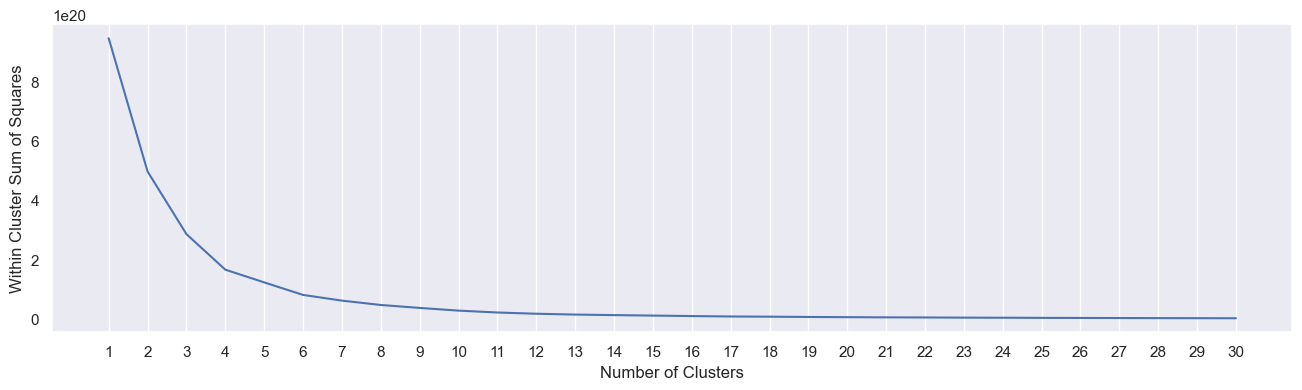

In [267]:
Bivariate_KMeansPlus_WithinSS('hncsfl')

Features 	hncsfl 	rank

Cluster 0:	53719.72	10634620.48	
Cluster 1:	921.44	922339734.46	
Cluster 2:	24.33	4392852428.2	
Cluster 3:	8498.24	113807595.55	
Cluster 4:	409.79	1776503486.12	
Cluster 5:	4.0	8480336083.57	
Cluster 6:	2729.06	377716852.45	

Within Cluster Sum of Squares : 6.1968720934568894e+19



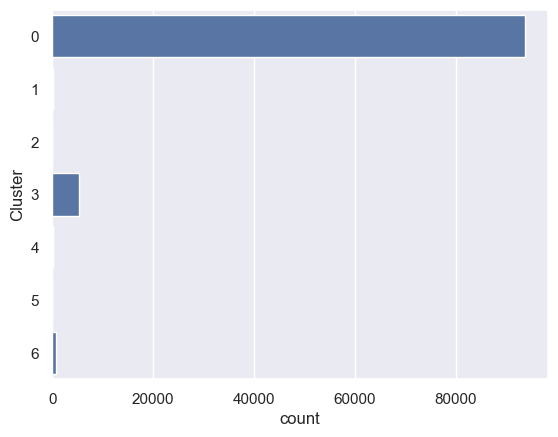

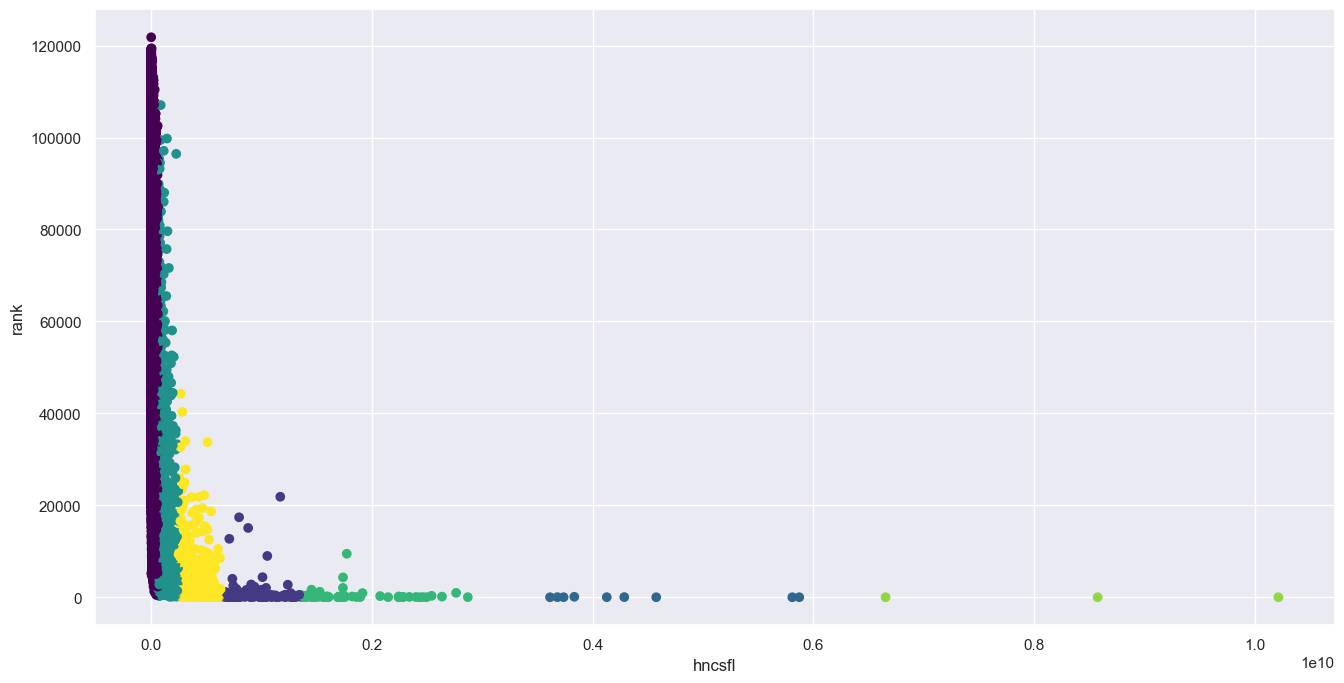

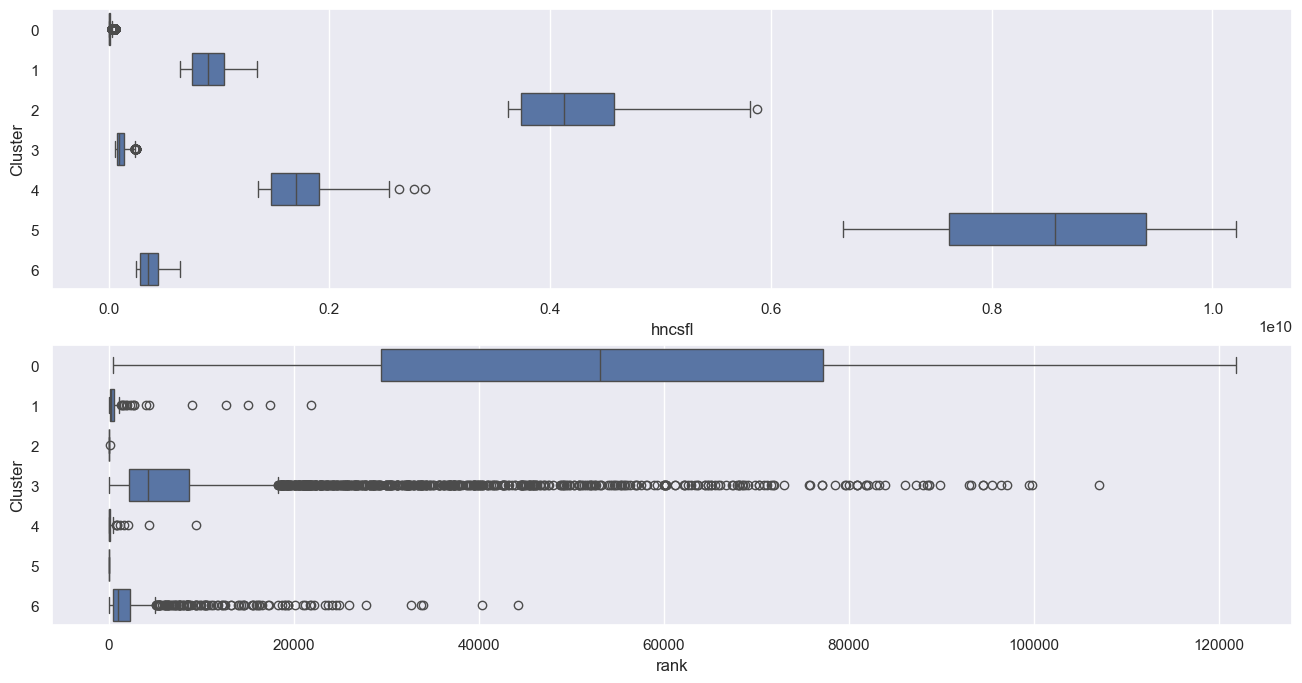

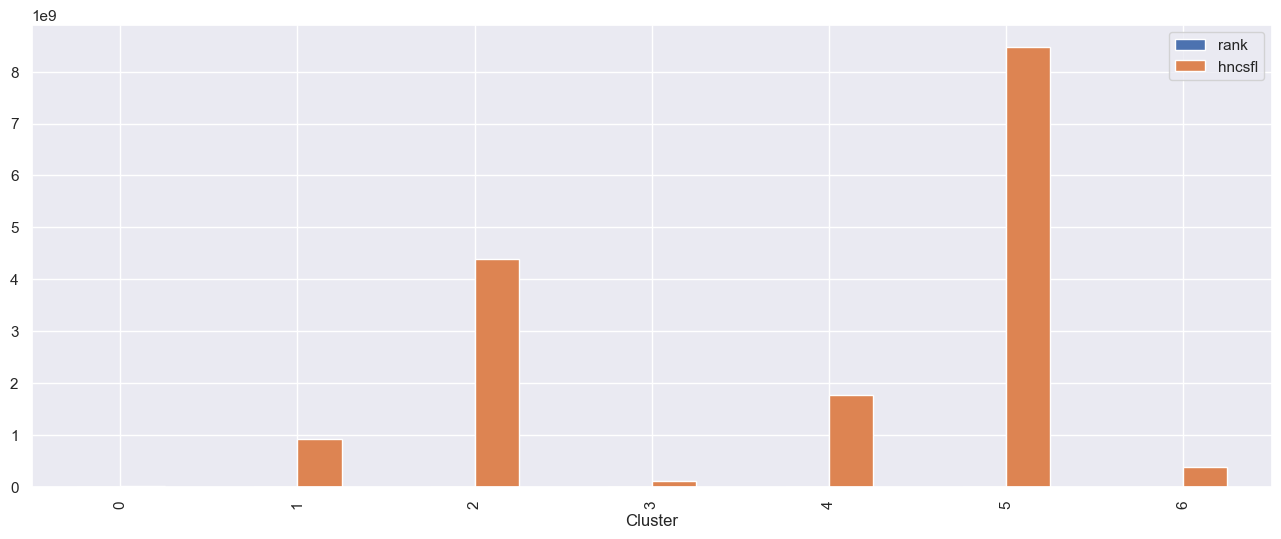

In [269]:
# Set "optimal" Number of Clusters
num_clust = 7

Bivariate_KMeansPlus_optimal('hncsfl', '\thncsfl')

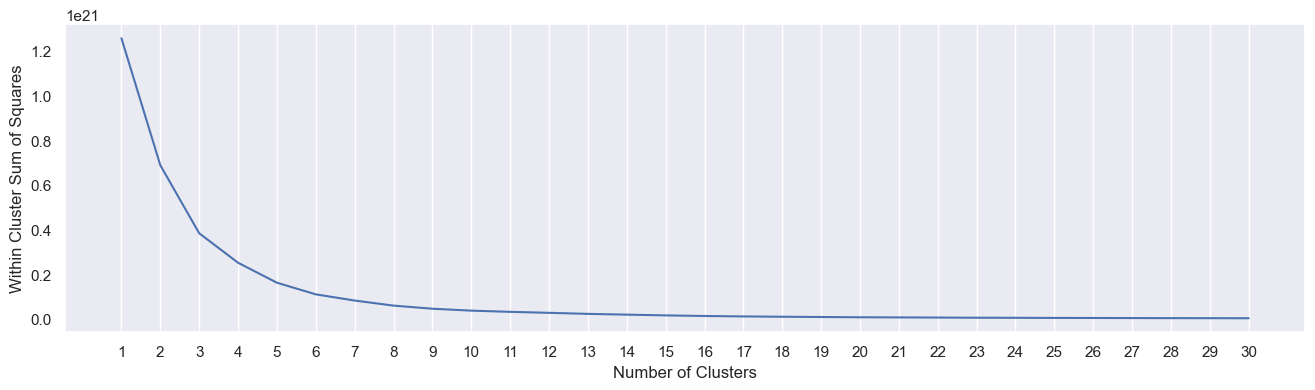

In [271]:
Bivariate_KMeansPlus_WithinSS('hnpciting')

Features 	hnpciting 	rank

Cluster 0:	54241.99	13667611.46	
Cluster 1:	1298.14	1150160393.77	
Cluster 2:	5276.13	412925837.51	
Cluster 3:	6.0	10493519316.99	
Cluster 4:	200.23	3520689470.12	
Cluster 5:	15486.57	123817139.96	

Within Cluster Sum of Squares : 1.1025115814891753e+20



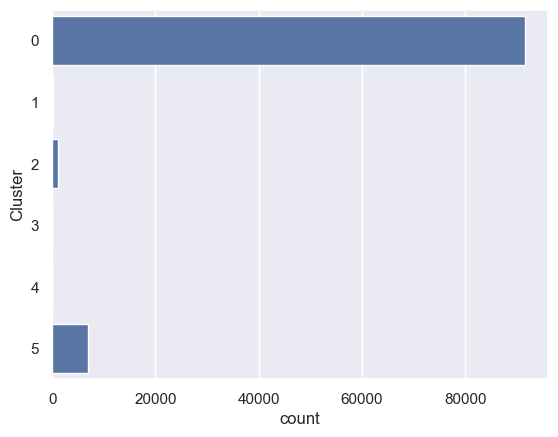

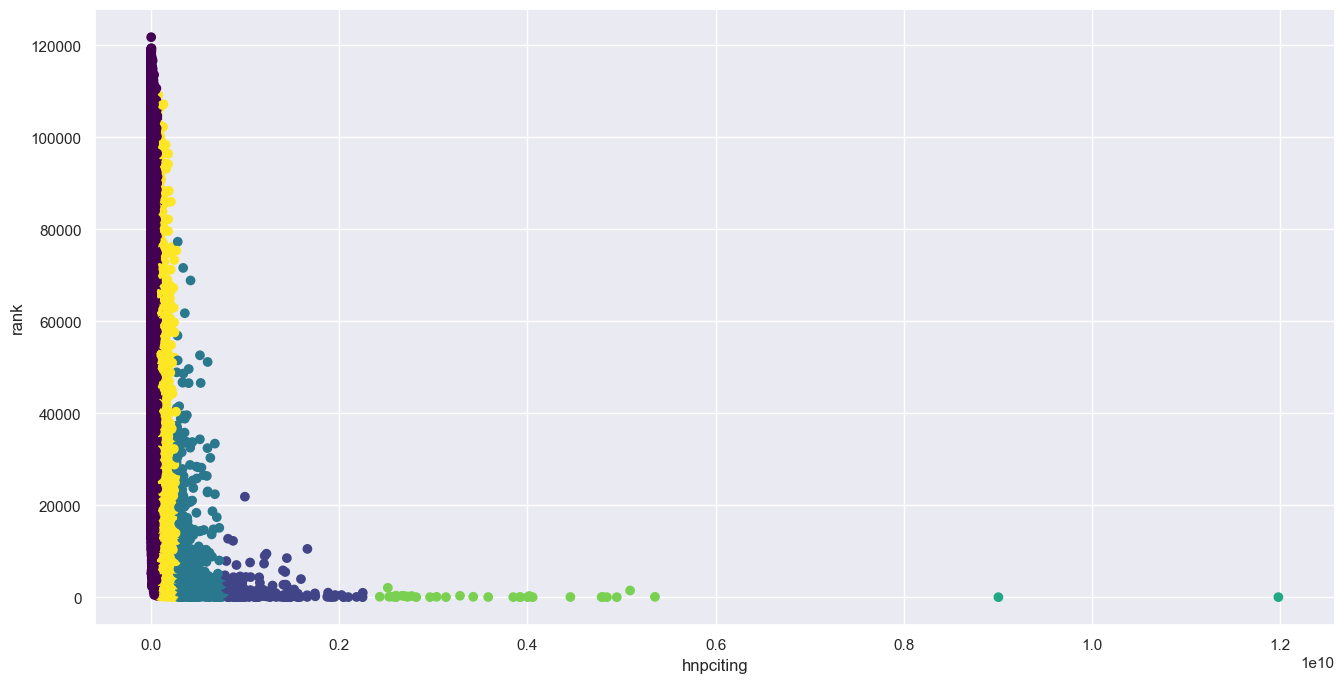

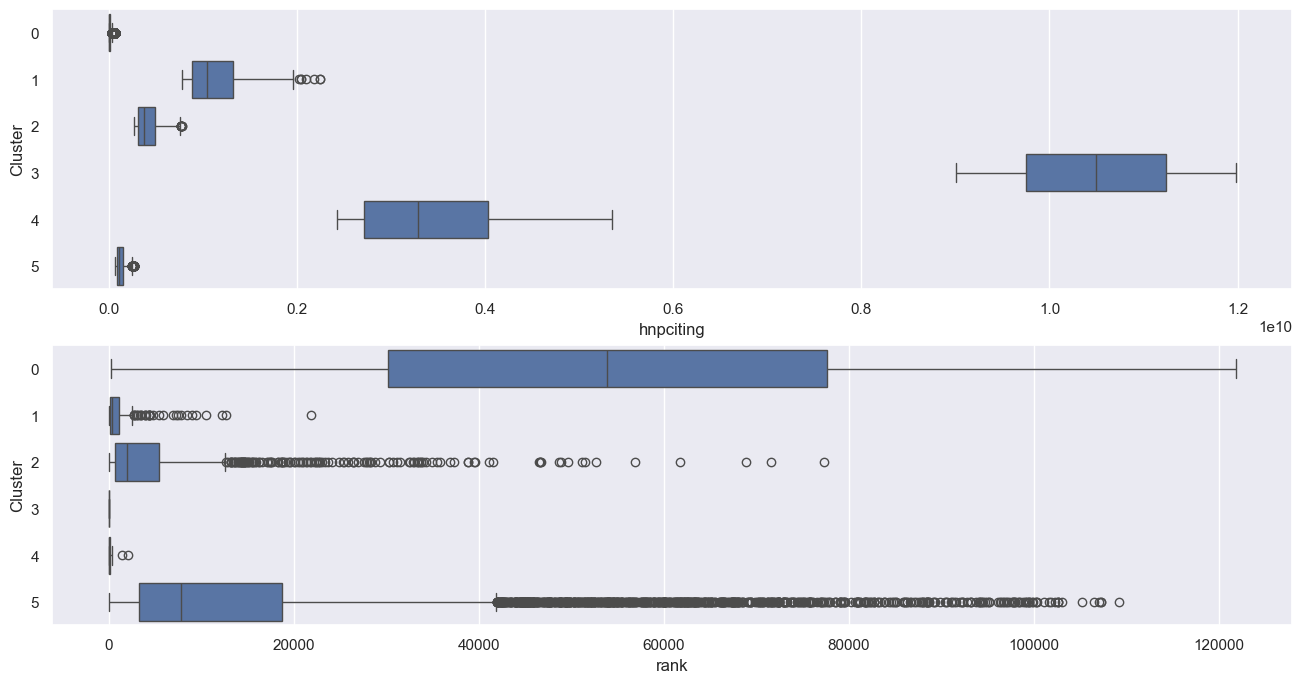

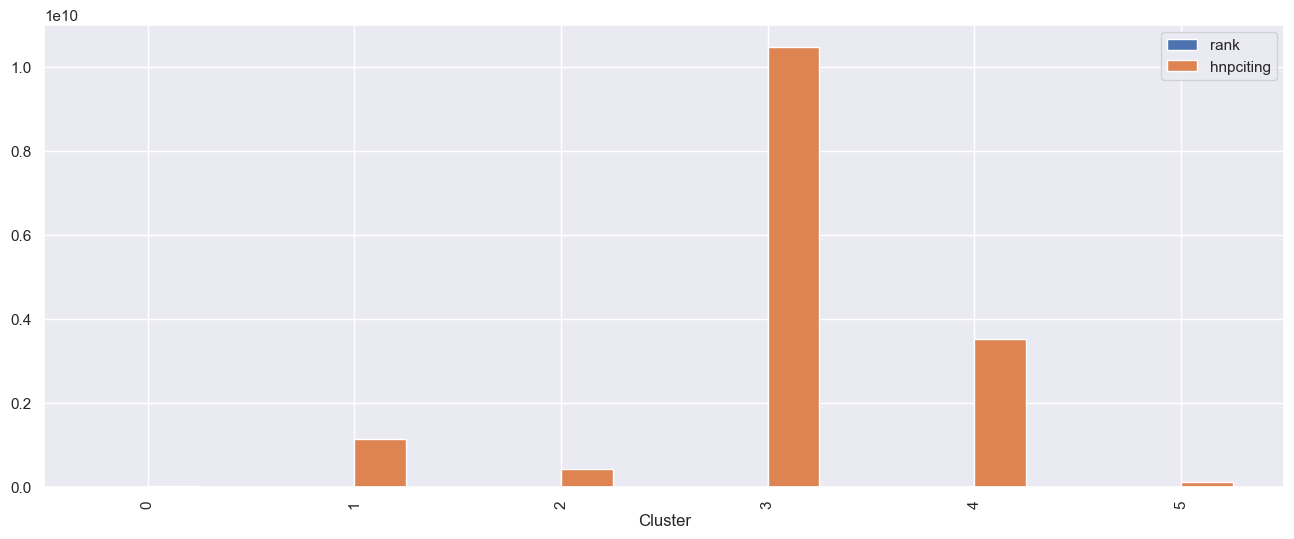

In [273]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeansPlus_optimal('hnpciting', '\thnpciting')

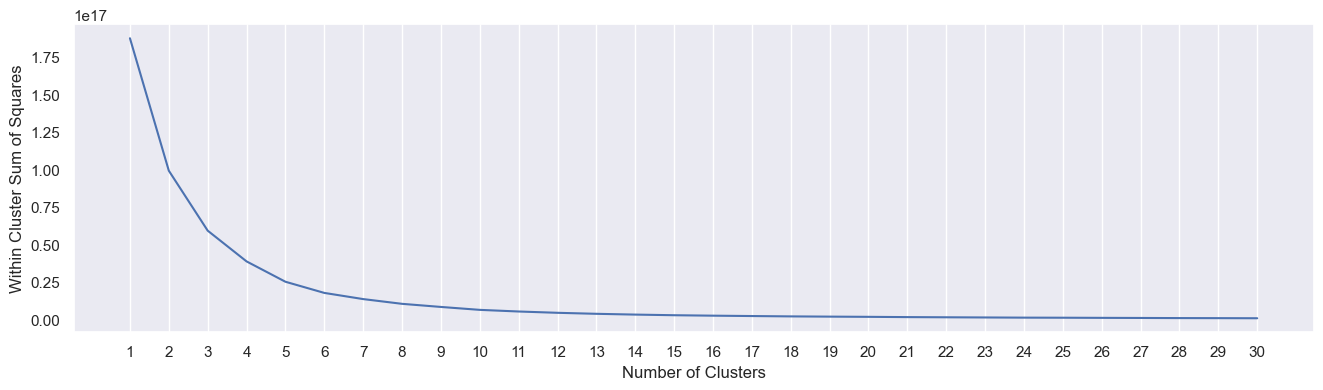

In [275]:
Bivariate_KMeansPlus_WithinSS('hnp6023 cited9623')

Features 	hnp6023 cited9623 	rank

Cluster 0:	58060.58	205979.82	
Cluster 1:	6020.73	6411272.55	
Cluster 2:	2363.09	13497008.07	
Cluster 3:	256.43	70447870.36	
Cluster 4:	13101.11	2806597.06	
Cluster 5:	27305.32	1035389.32	
Cluster 6:	1171.2	28096494.4	

Within Cluster Sum of Squares : 1.3344712434895842e+16



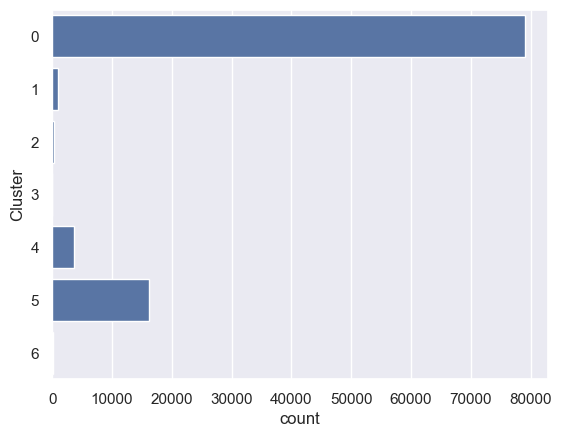

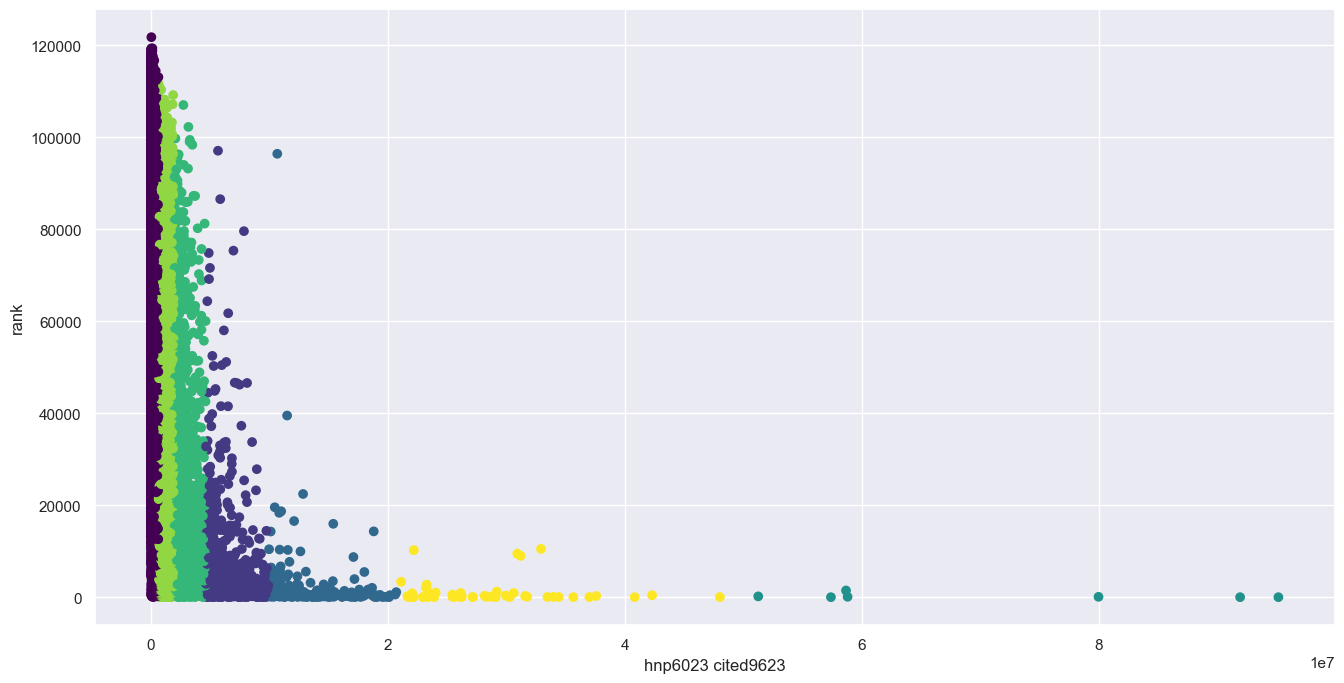

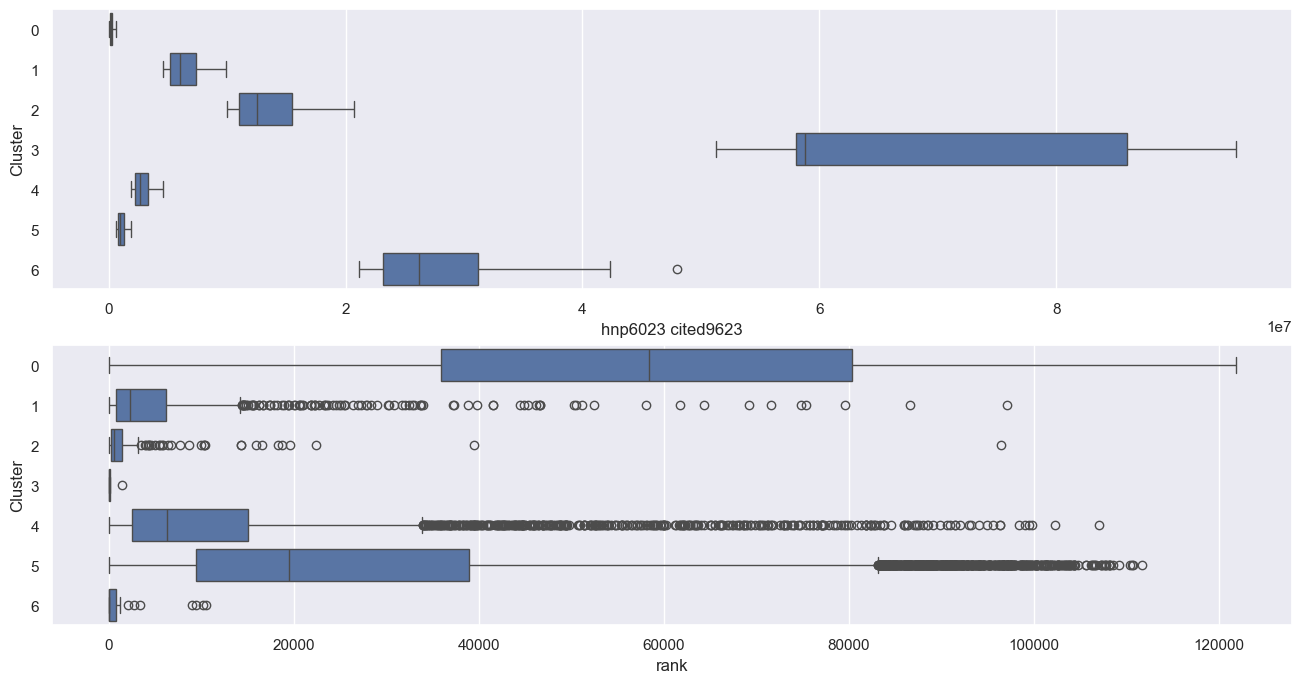

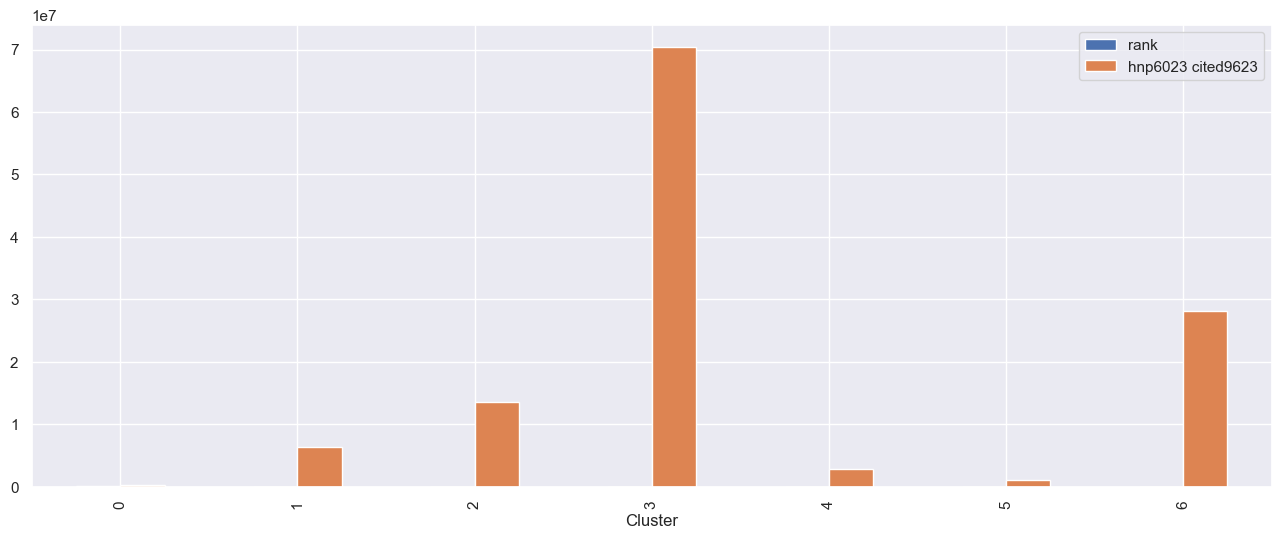

In [277]:
# Set "optimal" Number of Clusters
num_clust = 7

Bivariate_KMeansPlus_optimal('hnp6023 cited9623', '\thnp6023 cited9623')

From our attempts above, we can see that no matter we use KMeans or KMeans++, the simple bi-variate clustering cannot be directly used on our current dataset to achieve our goal as scatter-plot visualisations were not very clear in terms of cluster 'boundary' and give us a quite uneven distribution of 'dots' among clusters, even though we use the within cluster sum of squares to help us to determine the optimal number of clusters. This suggests that any individual feature or variable might not have direct and obvious impact only on itself in the rank of a scientist, and they may affect the ranking in a more collective way instead.

## Multi-Variate (KMeans++) Clustering

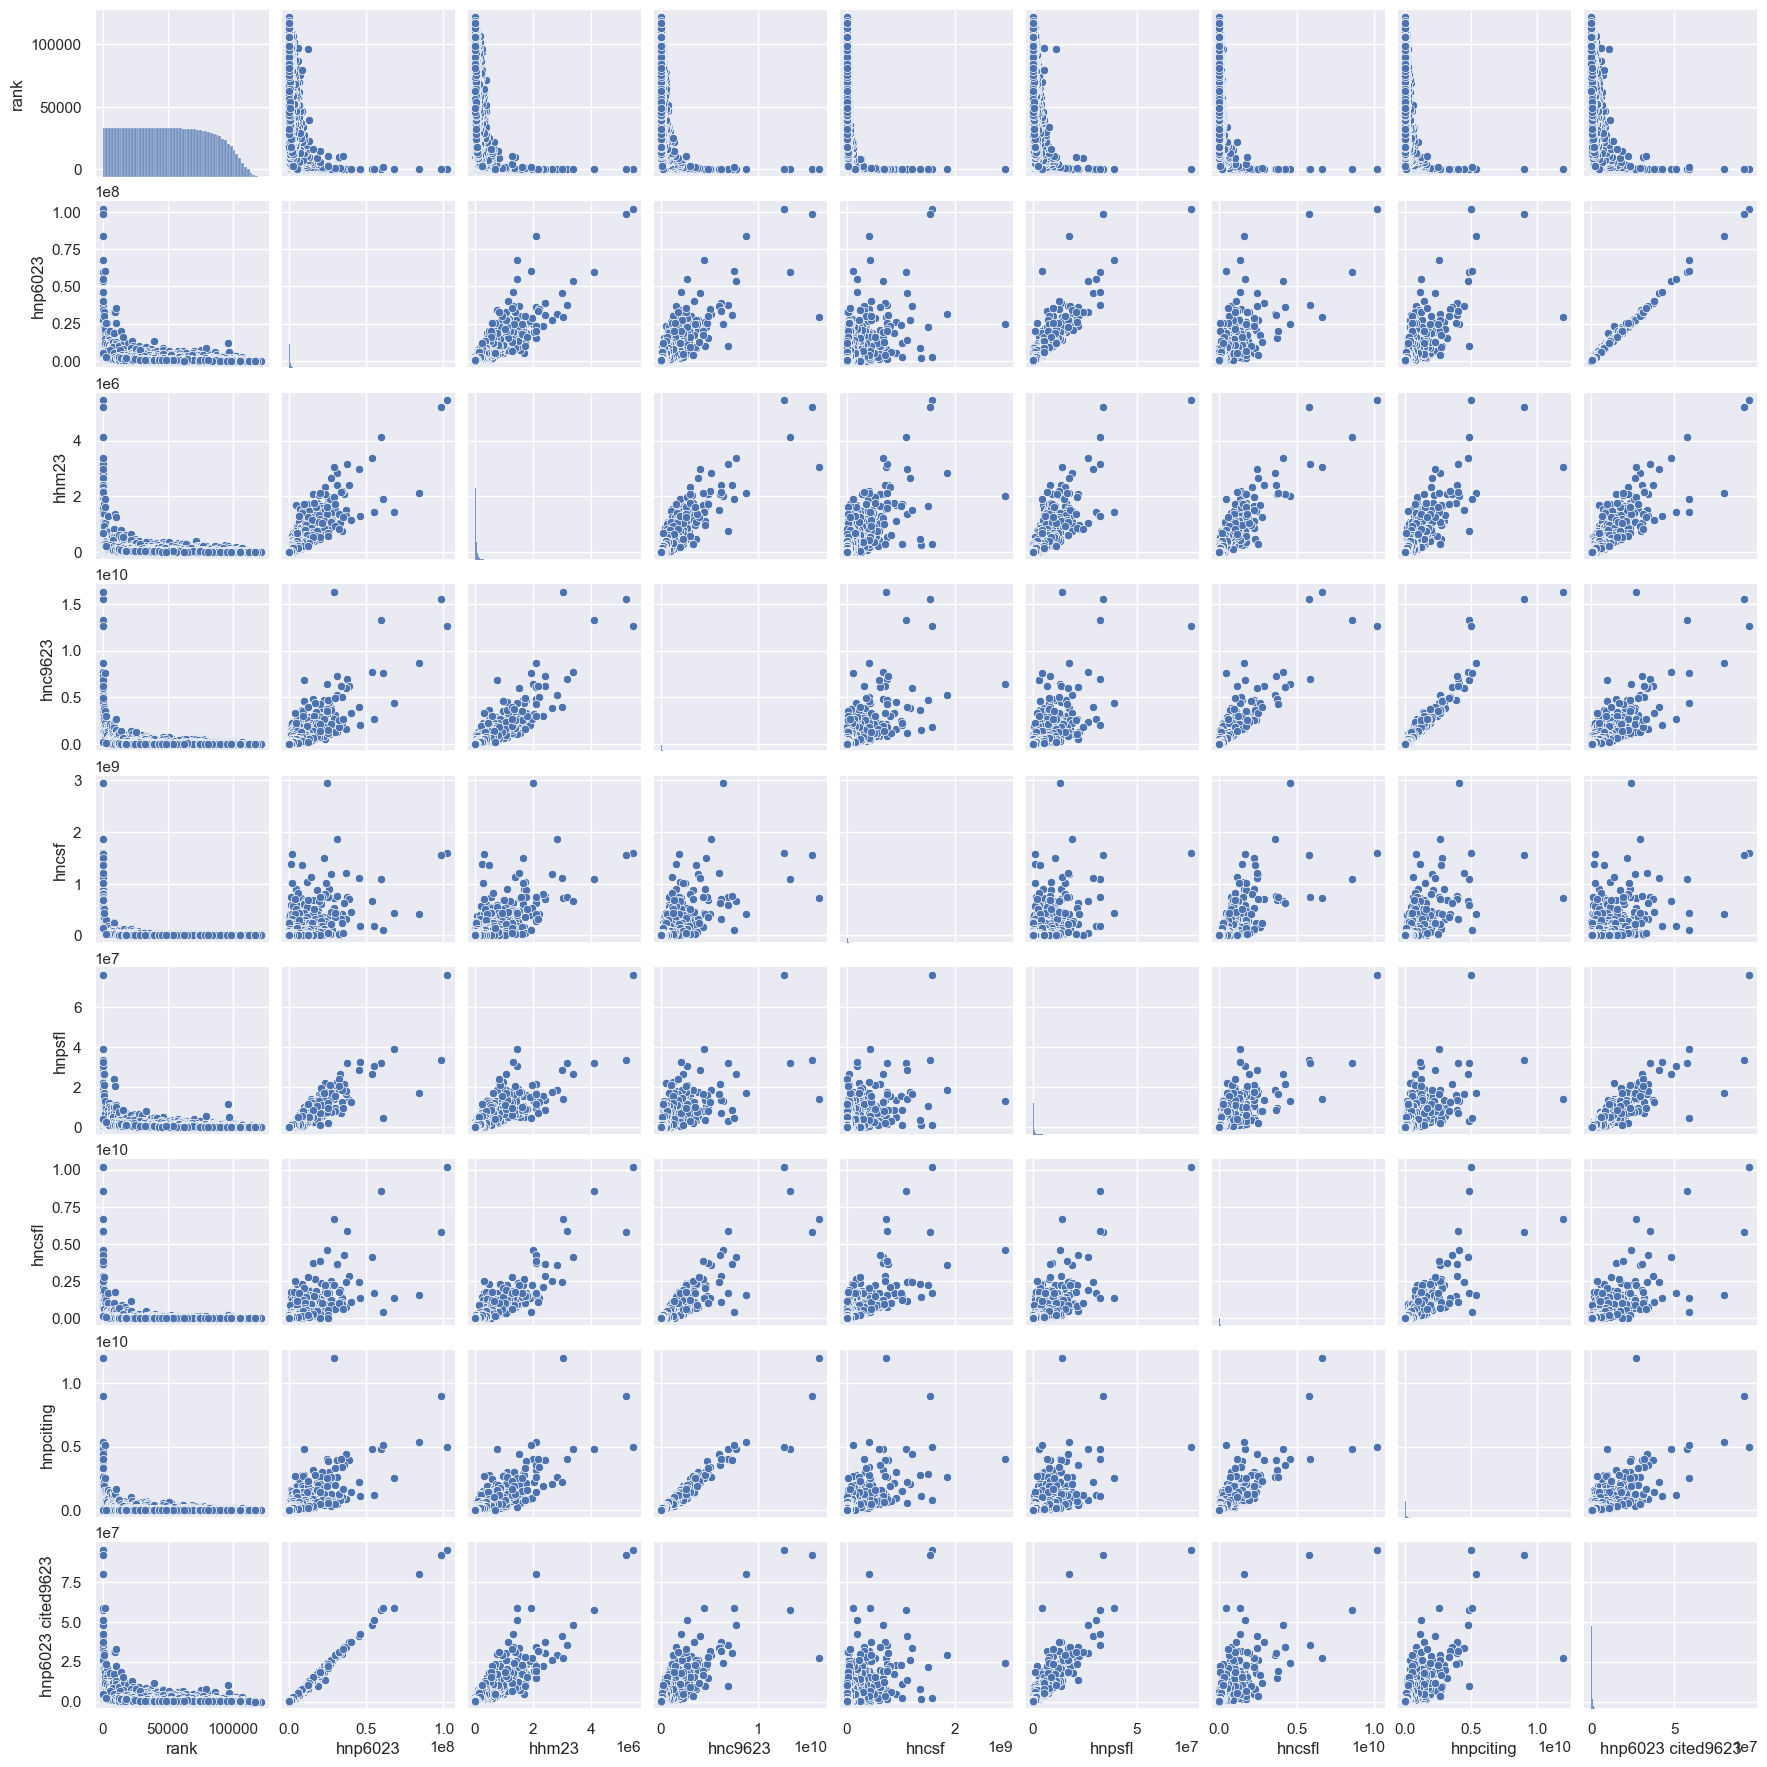

In [283]:
# Extract the Features from our Data
X = pd.DataFrame(sci3[['rank', 'hnp6023', 'hhm23', 'hnc9623', 'hncsf', 'hnpsfl', 'hncsfl', 'hnpciting', 'hnp6023 cited9623']])

# Plot the Raw Data on 2D grids
sb.pairplot(X, height=2)

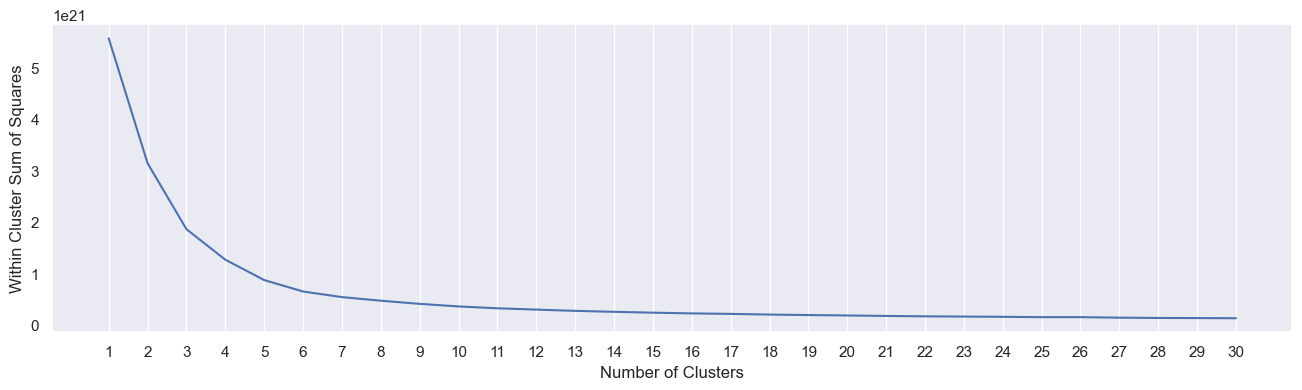

In [257]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 30
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [259]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 6
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=6, n_init=20)

Features 	rank 	hnp6023 	hhm23 	hnc9623 	hncsf 	hnpsfl 	hncsfl 	hnpciting 	hnp6023 cited9623

Cluster 0:	11889.4	2578364.33	191137.46	221809321.84	30875511.88	1361679.59	103509429.64	145430865.62	2348800.36	
Cluster 1:	3372.85	6928379.16	466318.8	762774915.05	99292957.73	3616068.05	364409117.7	480931722.73	6372105.96	
Cluster 2:	53854.21	373514.65	36116.16	21286333.3	4230040.22	215925.1	10802352.99	14695713.22	333989.6	
Cluster 3:	3.75	72457148.24	4446802.71	14471150895.22	1239662390.28	38949182.79	7812357664.27	7695386031.52	67902897.61	
Cluster 4:	159.46	30962009.7	1875312.6	5362788837.09	793925777.1	13669911.16	2563160645.56	3415829105.67	28893998.73	
Cluster 5:	960.01	14866960.57	971650.64	2018006513.8	249220321.25	7892880.73	1072380845.53	1240188876.78	13812042.63	

Within Cluster Sum of Squares : 6.485187719101248e+20



<Axes: xlabel='count', ylabel='Cluster'>

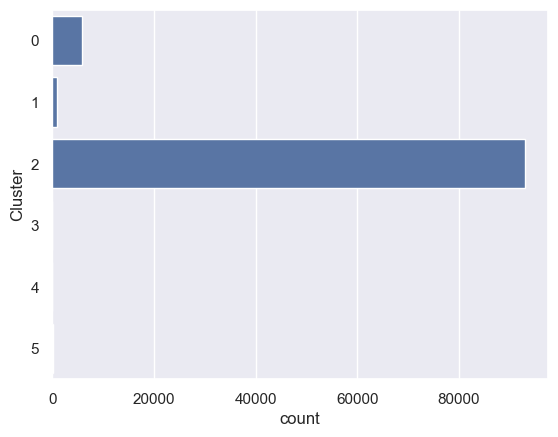

In [261]:
# Print the Cluster Centers
print("Features",'\trank', '\thnp6023', '\thhm23', '\thnc9623', '\thncsf', '\thnpsfl', '\thncsfl', '\thnpciting', '\thnp6023 cited9623')
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

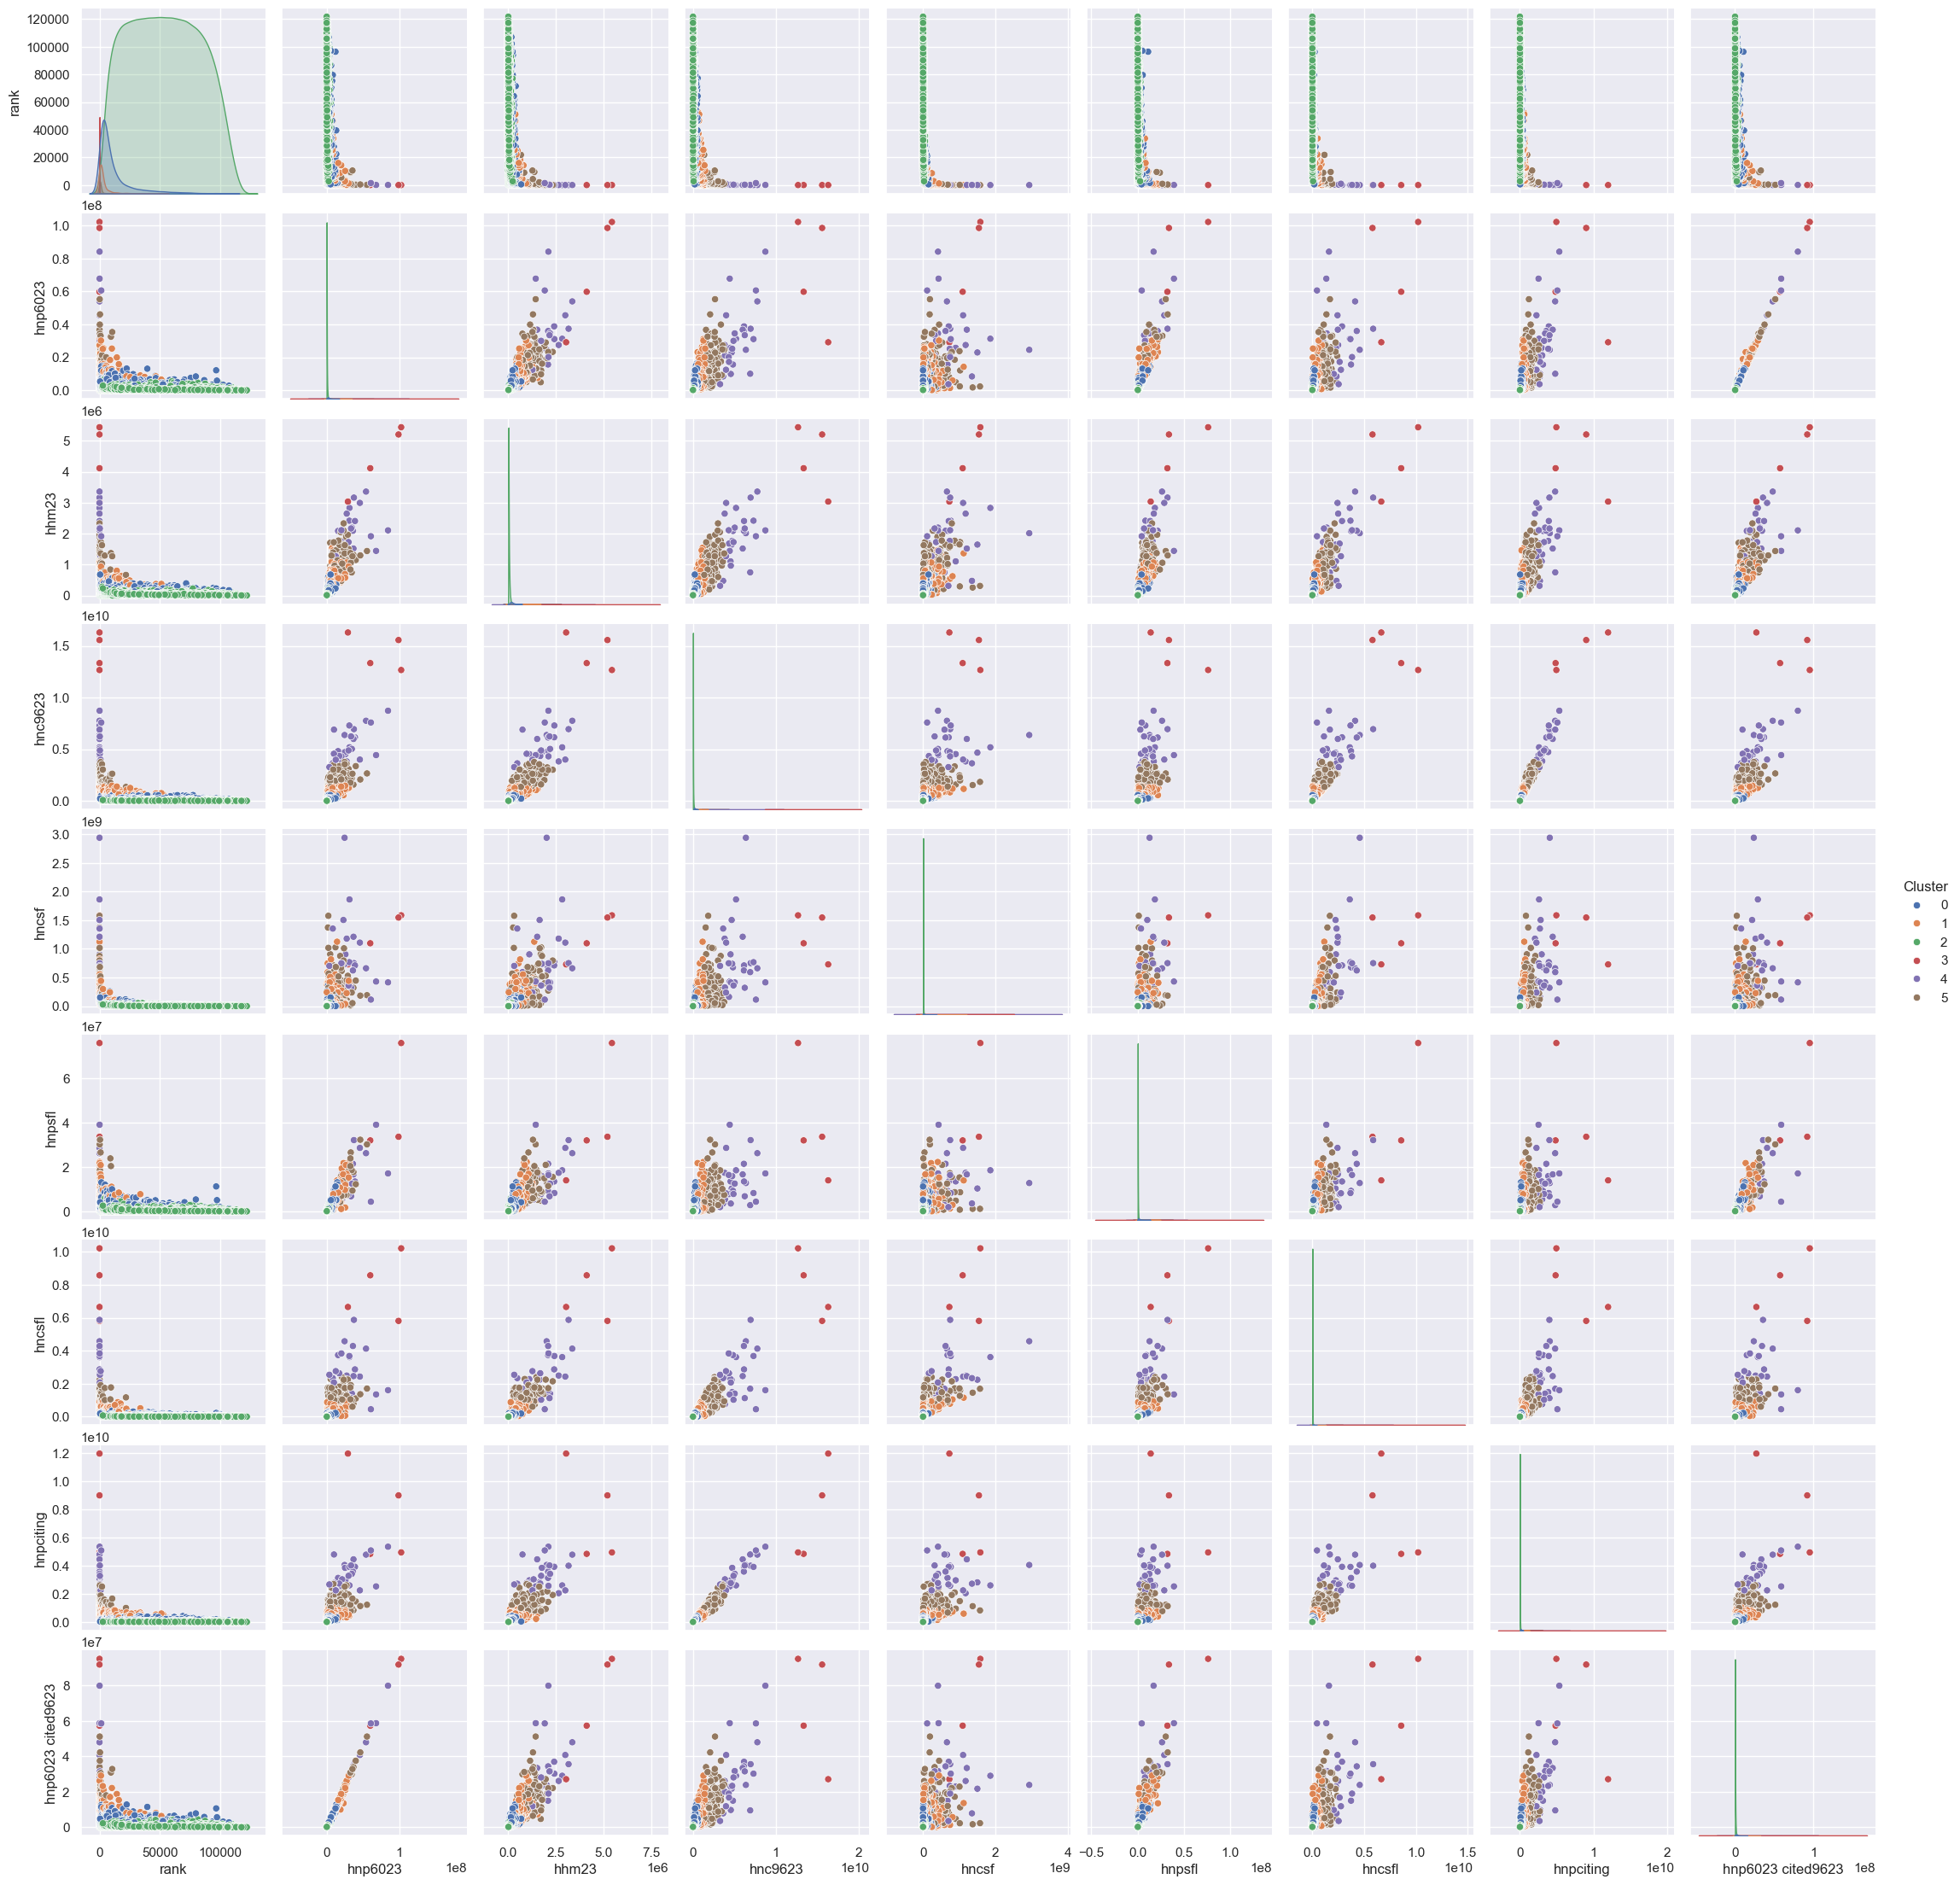

In [263]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Cluster")

<Axes: xlabel='Cluster'>

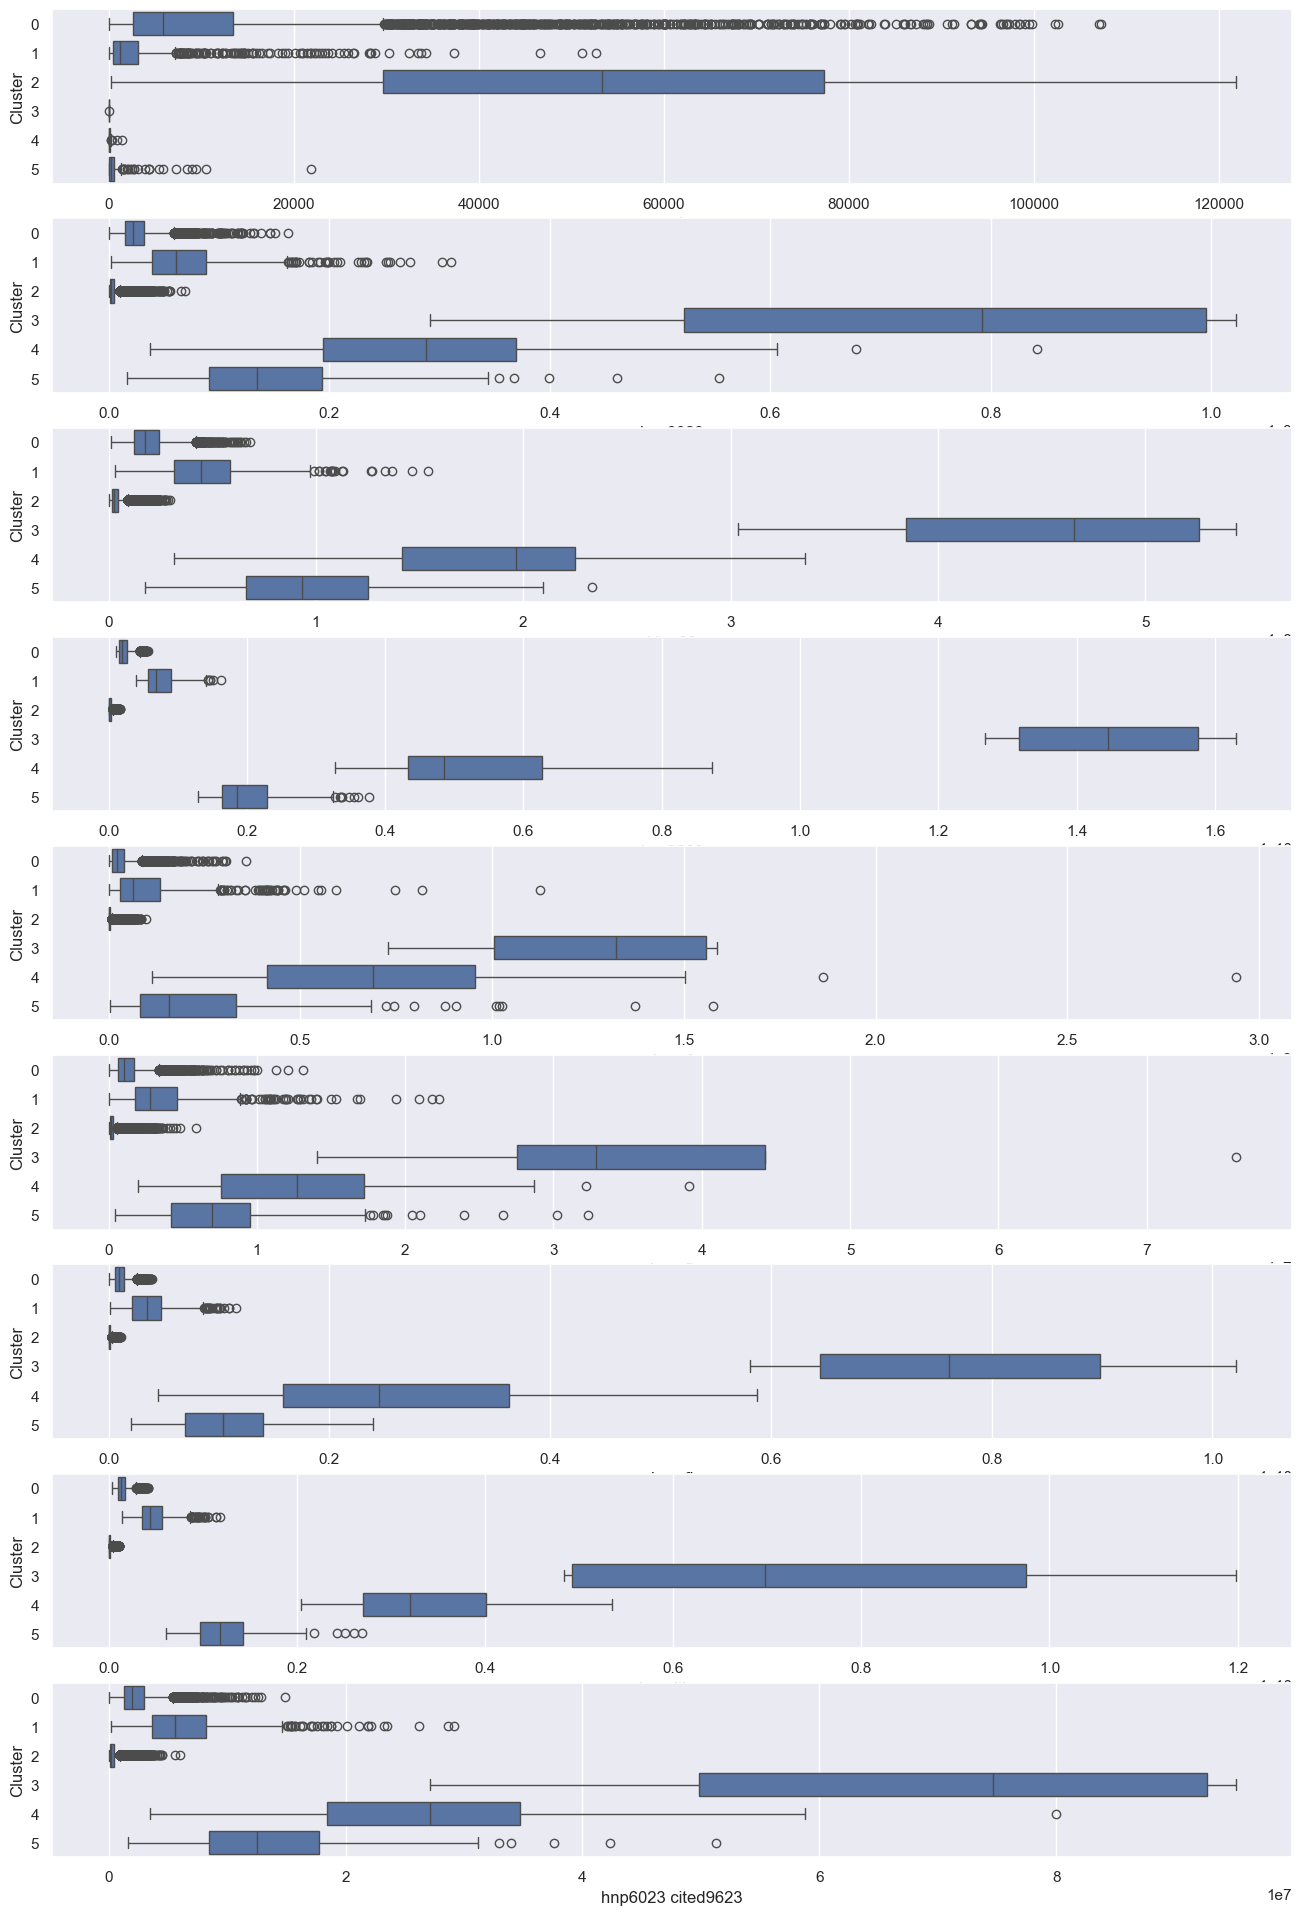

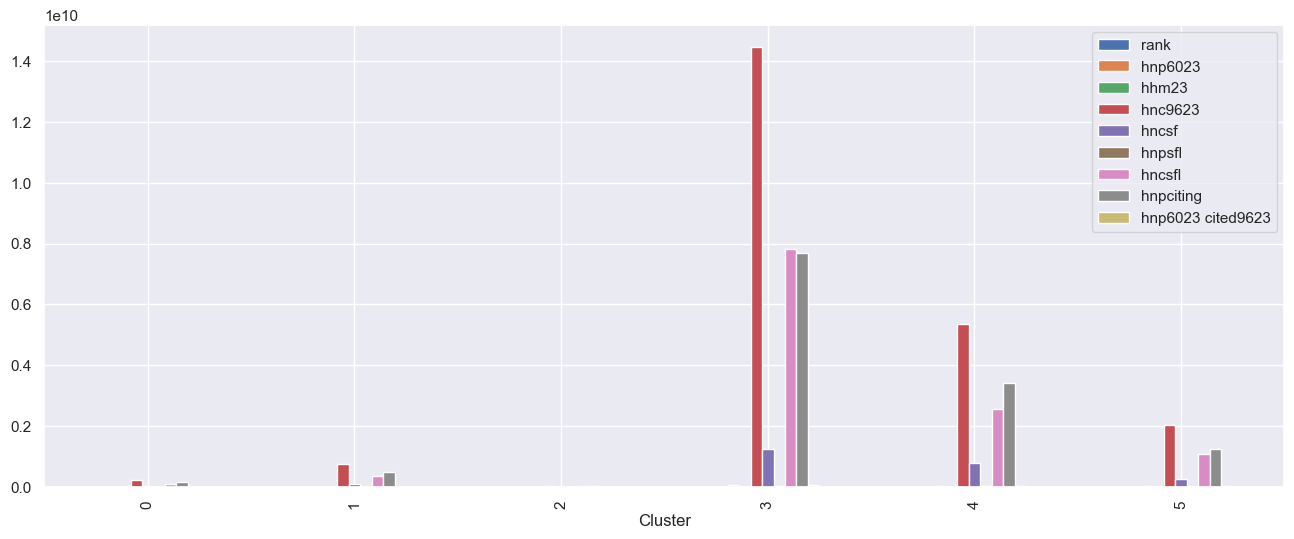

In [267]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(9, 1, figsize=(16,24))
sb.boxplot(x = 'rank', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'hnp6023', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'hhm23', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'hnc9623', y = 'Cluster', data = X_labeled, ax = axes[3])
sb.boxplot(x = 'hncsf', y = 'Cluster', data = X_labeled, ax = axes[4])
sb.boxplot(x = 'hnpsfl', y = 'Cluster', data = X_labeled, ax = axes[5])
sb.boxplot(x = 'hncsfl', y = 'Cluster', data = X_labeled, ax = axes[6])
sb.boxplot(x = 'hnpciting', y = 'Cluster', data = X_labeled, ax = axes[7])
sb.boxplot(x = 'hnp6023 cited9623', y = 'Cluster', data = X_labeled, ax = axes[8])

# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

It can be seen that the problems of 'overlapping' phenomenon of boxplots and vague boundary & uneven distribution in scatter-plot visualisations still exist, so we switch to classification in hope of obtaining better results.

## Multi-Variate Classification

In [245]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

#Initialising linear regression model
linreg = LinearRegression()

#Splitting data into predictors(X) and response(Y) variables
X = sci3.iloc[:,1:] #Selecting all variables as predictor variables
Y = sci3.iloc[:,0] #Selecting `rank` as response variable

#Training the model using data
linreg.fit(X, Y)
print("Coefficient = ", linreg.coef_)

# prints in a DataFrame with columns and its corresponding coefficients
pd.DataFrame({"Feature":X.columns.tolist(),"Coefficients":linreg.coef_})

Coefficient =  [-1.55993795e-02 -3.45162109e-01  5.22273326e-05 -6.11929171e-05
 -2.03922287e-03  1.38786958e-04 -6.94000723e-05  2.34226732e-02]


Feature  Coefficients
0            hnp6023     -0.015599
1              hhm23     -0.345162
2            hnc9623      0.000052
3              hncsf     -0.000061
4             hnpsfl     -0.002039
5             hncsfl      0.000139
6          hnpciting     -0.000069
7  hnp6023 cited9623      0.023423

In [251]:
# Explained Variance
Y_pred = linreg.predict(X)
print("Explained Variance (R^2) \t: ", linreg.score(X, Y))

Explained Variance (R^2) 	:  0.27517350541367336


The low explained variance (which is smaller than 0.5) implies that the proportion to which this model accounts for the variation or dispersion of a given dataset is relatively small. In addition, the correlation coefficient for every feature is almost zero except for 'hhm23' (whose coefficient is still lower than 0.5 in absolute term nevertheless). Therefore, we need to look for other methods to make our model.